In [2]:
import pandas as pd
import numpy as np

In [3]:
Prices_raw= pd.read_csv('../data/Prices.csv', encoding='utf-8',thousands=',')
Export_Import_raw = pd.read_csv('../data/Cross_Border.csv',encoding='utf-8',thousands=',')
Consumption_raw = pd.read_csv('../data/Cosumption.csv',encoding='utf-8',thousands=',')
Generation_raw = pd.read_csv('../data/Generation.csv',encoding='utf-8',thousands=',')

In [4]:
Prices_raw['Start'] = Prices_raw['Unnamed: 0']
Consumption_raw['Start'] = Consumption_raw['Unnamed: 0']
Generation_raw['Start'] = Generation_raw['Unnamed: 0']
Export_Import_raw['Start'] = Export_Import_raw['Unnamed: 0']

In [5]:
Prices_raw['Start'] = pd.to_datetime(Prices_raw['Start'])
Prices_raw = Prices_raw.set_index('Start')
Export_Import_raw['Start'] = pd.to_datetime(Export_Import_raw['Start'])
Export_Import_raw = Export_Import_raw.set_index('Start')
Consumption_raw['Start'] = pd.to_datetime(Consumption_raw['Start'])
Consumption_raw = Consumption_raw.set_index('Start')
Generation_raw['Start'] = pd.to_datetime(Generation_raw['Start'])
Generation_raw = Generation_raw.set_index('Start')

In [6]:
Generation_raw.rename(inplace= True, columns={
    'Biomass [MWh] Original resolutions':'Biomass',
       'Hydropower [MWh] Original resolutions':'Hydropower',
       'Wind offshore [MWh] Original resolutions':'Wind_offshore',
       'Wind onshore [MWh] Original resolutions':'Wind_onshore',
       'Photovoltaics [MWh] Original resolutions':'Photovoltaics',
       'Other renewable [MWh] Original resolutions':'Other_renewable',
       'Nuclear [MWh] Original resolutions':'Nuclear',
       'Lignite [MWh] Original resolutions':'Lignite',
       'Hard coal [MWh] Original resolutions':'Hard_coal',
       'Fossil gas [MWh] Original resolutions':'Fossil_gas',
       'Hydro pumped storage [MWh] Original resolutions':'Hydro_pumped_storage',
       'Other conventional [MWh] Original resolutions':'Other_conventional',
         'Sum [MWh]':'Generation_sum'
})



In [7]:
Consumption_raw.rename(inplace=True, columns={
    'Total (grid load) [MWh] Original resolutions':'Total_sum',
       'Residual load [MWh] Original resolutions':'Residual',
       'Hydro pumped storage [MWh] Original resolutions':'Hydro'
})


In [8]:
Prices_raw.rename(inplace=True, columns={
    'Germany/Luxembourg [€/MWh] Calculated resolutions':'Germany_Luxembourg',
       'Belgium [€/MWh] Calculated resolutions':'Belgium',
       'France [€/MWh] Calculated resolutions':'France',
       'Austria [€/MWh] Calculated resolutions':'Austria',
       'Poland [€/MWh] Calculated resolutions':'Poland',
       'Czech Republic [€/MWh] Calculated resolutions':'Czech_Republic',
       'Switzerland [€/MWh] Calculated resolutions':'Switzerland',
})

In [9]:
countries = ['Belgium', 'France', 'Poland', 'Austria', 'Czech Republic', 'Switzerland']
all_contries = countries + ['Netherlands', 'Denmark', 'Luxembourg', 'Sweden', 'Norway']

Export_Import_raw['Export_sum'] = 0
Export_Import_raw['Import_sum'] = 0

for country in countries:
    export_col = f'{country} (export) [MWh] Original resolutions'
    import_col = f'{country} (import) [MWh] Original resolutions'
    sum_col = f'{country.replace(" ", "_")}_sum'
    Export_Import_raw[sum_col] = Export_Import_raw[export_col] + Export_Import_raw[import_col]



for contries in all_contries:
    export_cols = f'{contries} (export) [MWh] Original resolutions'
    import_cols = f'{contries} (import) [MWh] Original resolutions'

    Export_Import_raw['Export_sum'] += Export_Import_raw[export_cols]
    Export_Import_raw['Import_sum'] += Export_Import_raw[import_cols]

# Calculate the remainder sum
export_import_sums = [f'{country.replace(" ", "_")}_sum' for country in countries]
Export_Import_raw['Remainder_sum'] = Export_Import_raw['Sum [MWh]'] - Export_Import_raw[export_import_sums].sum(axis=1)


In [10]:
Export_Import_raw.rename(inplace=True, columns={
    'Sum [MWh]':'Export_Import_sum'
})

Drop the other columns: 


In [11]:
Generation = Generation_raw.drop(columns=['Unnamed: 0','End date'])
Consumption = Consumption_raw.drop(columns= ['Unnamed: 0','End date'])
Prices = Prices_raw.drop(columns=
        ['Unnamed: 0','End date','Denmark 1 [€/MWh] Calculated resolutions',
       'Denmark 2 [€/MWh] Calculated resolutions',
       'Netherlands [€/MWh] Calculated resolutions',
       'Norway 2 [€/MWh] Calculated resolutions',
       'Sweden 4 [€/MWh] Calculated resolutions', 
       'Northern Italy [€/MWh] Calculated resolutions',
       'Slovenia [€/MWh] Calculated resolutions',
       'Hungary [€/MWh] Calculated resolutions'
       ])
Export_Import = Export_Import_raw.drop(columns=
        ['Unnamed: 0','End date', 'Netherlands (export) [MWh] Original resolutions',
       'Netherlands (import) [MWh] Original resolutions',
       'Switzerland (export) [MWh] Original resolutions',
       'Switzerland (import) [MWh] Original resolutions',
       'Denmark (export) [MWh] Original resolutions',
       'Denmark (import) [MWh] Original resolutions',
       'Czech Republic (export) [MWh] Original resolutions',
       'Czech Republic (import) [MWh] Original resolutions',
       'Luxembourg (export) [MWh] Original resolutions',
       'Luxembourg (import) [MWh] Original resolutions',
       'Sweden (export) [MWh] Original resolutions',
       'Sweden (import) [MWh] Original resolutions',
       'Austria (export) [MWh] Original resolutions',
       'Austria (import) [MWh] Original resolutions',
       'France (export) [MWh] Original resolutions',
       'France (import) [MWh] Original resolutions',
       'Poland (export) [MWh] Original resolutions',
       'Poland (import) [MWh] Original resolutions',
       'Norway (export) [MWh] Original resolutions',
       'Norway (import) [MWh] Original resolutions',
       'Belgium (export) [MWh] Original resolutions',
       'Belgium (import) [MWh] Original resolutions'
       ])

In [12]:
Import_Export = Export_Import*-1

Import_Export.rename(columns={'Export_Import_sum':'Import_Export_sum'}, inplace=True)
Generation = pd.concat([Generation,Import_Export], axis=1)

In [13]:
Generation['Total_sum'] = Generation['Generation_sum']+Generation['Import_Export_sum']

| Generation           |       | Consumption          |       | Prices             |         | Export_Import (+/-)**    |       |
|----------------------|-------|----------------------|-------|--------------------|---------|-----------------|-------|
|                      |       |                      |       |                    |         |                 |       |
| Column               | Unit  | Column               | Unit  | Column             | Unit    | Column         | Unit  |
| Biomass              | [MWh] | Total_sum                | [MWh] | Germany_Luxembourg | [€/MWh] | Export_Import_sum             | [MWh] |
| Hydropower           | [MWh] | Residual             | [MWh] | Belgium            | [€/MWh] | Belgium_sum     | [MWh] |
| Wind_offshore        | [MWh] | Hydro_pumped_storage | [MWh] | France             | [€/MWh] | France_sum      | [MWh] |
| Wind_onshore         | [MWh] |                      |       | Poland             | [€/MWh] | Poland_sum      | [MWh] |
| Photovoltaics        | [MWh] |                      |       | Austria            | [€/MWh] | Austrian_sum    | [MWh] |
| Other_renewable      | [MWh] |                      |       | Switzerland        | [€/MWh] | Switzerland_sum | [MWh] |
| Nuclear              | [MWh] |                      |       | Czech_Republic     | [€/MWh] |Czech_Republic_sum| [MWh] |
| Lignite              | [MWh] |                      |       |                    |         | Export_sum                | [MWh]      |
| Hard_coal            | [MWh] |                      |       |                    |         | Import_sum                |  [MWh]     |
| Fossil_gas           | [MWh] |                      |       |                    |         |                 |       |
| Hydro_pumped_storage | [MWh] |                      |       |                    |         |                 |       |
| Other_conventional   | [MWh] |                      |       |                    |         |                 |       |
| Generation_sum                  | [MWh] |                      |       |                    |         |                 |       |
| Import_Export_sum*   | [MWh] |                      |       |                    |         |                 |       |
| Belgium_sum   | [MWh] |                      |       |                    |         |                 |       |
| Export_sum   | [MWh] |                      |       |                    |         |                 |       |
| Import_sum   | [MWh] |                      |       |                    |         |                 |       |
| France_sum   | [MWh] |                      |       |                    |         |                 |       |
| Poland_sum   | [MWh] |                      |       |                    |         |                 |       |
| Austrian_sum   | [MWh] |                      |       |                    |         |                 |       |
| Switzerland_sum   | [MWh] |                      |       |                    |         |                 |       |
| Chzech_Republic_sum   | [MWh] |                      |       |                    |         |                 |       |
| Total_sum   | [MWh] |                      |       |                    |         |                 |       |
|    |  |                      |       |                    |         |                 |       |
| *Import_Export_sum   | = | Export_Import_sum x (-1)                     |       |                    |         | **Exports are positive, Imports negative       |       |
| All country sums are inverted   |  |                      |       |                    |         |                 |       |

## Trend-Seasonal Decomposition

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose 
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import month_plot


def decomposition_df(df, column, frequency='MS',aggregation_method='sum', type='additive'):
    '''
    Process a dataframe to decompose its time series data and add trend, seasonal, residual, and trend+seasonal columns.
    
    Parameters:
    - df: pandas DataFrame containing the data to be processed
    - column: the column to be processed in the dataframe
    - frequency: the frequency of the decomposition, default monthly 
        - D - daily
        - h- hourly
        - W- weekly 

        look here: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
    -aggregation_method: the method of the decomposition, default sum
        -mean
        -min
        -max


    -type: the used model in the decomposition, default = additive
        - multiplicative 
    
    
    Returns:
    - df_Frequency: the processed DataFrame with additional columns
    '''
    aggregation_func = getattr(pd.DataFrame, aggregation_method)
    df_Frequency=df[[column]].resample(frequency).apply(aggregation_func)
    decompositon= seasonal_decompose(df_Frequency[column], model=type)


    df_Frequency['Trend'] = decompositon.trend
    df_Frequency['Seasonal'] = decompositon.seasonal
    df_Frequency['Residual'] = decompositon.resid
    df_Frequency['Trend+Seasonal'] = df_Frequency['Seasonal'] + df_Frequency['Trend']

    return df_Frequency


In [15]:
Prices_GER_monthly = decomposition_df(Prices, 'Germany_Luxembourg','MS','mean')
Prices_GER_weekly = decomposition_df(Prices,'Germany_Luxembourg','W', 'mean')
Prices_GER_daily = decomposition_df(Prices,'Germany_Luxembourg', 'D','mean')
Prices_GER_hourly = decomposition_df(Prices,'Germany_Luxembourg','h','mean')


Generation_monthly = decomposition_df(Generation,'Generation_sum')
Generation_weekly = decomposition_df(Generation,'Generation_sum','W')
Generation_daily = decomposition_df(Generation,'Generation_sum','D')
Generation_hourly = decomposition_df(Generation,'Generation_sum','h')

Consumption_monthly = decomposition_df(Consumption, 'Total_sum')
Consumption_weekly = decomposition_df(Consumption,'Total_sum','W')
Consumption_daily = decomposition_df(Consumption,'Total_sum', 'D')
Consumption_hourly = decomposition_df(Consumption,'Total_sum','h')

Export_Import_monthly = decomposition_df(Export_Import, 'Export_Import_sum')
Export_Import_weekly = decomposition_df(Export_Import,'Export_Import_sum','W')
Export_Import_daily = decomposition_df(Export_Import,'Export_Import_sum', 'D')
Export_Import_hourly = decomposition_df(Export_Import,'Export_Import_sum','h')

In [16]:
Prices_FRA_monthly = decomposition_df(Prices, 'France', 'MS', 'mean')
Prices_Austria_monthly = decomposition_df(Prices, 'Austria', 'MS', 'mean')
Prices_Switzerland_monthly = decomposition_df(Prices, 'Switzerland', 'MS', 'mean')
Prices_Belgium_monthly = decomposition_df(Prices, 'Belgium', 'MS', 'mean')
Prices_Czech_Republic_monthly = decomposition_df(Prices, 'Czech_Republic', 'MS', 'mean')

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Price

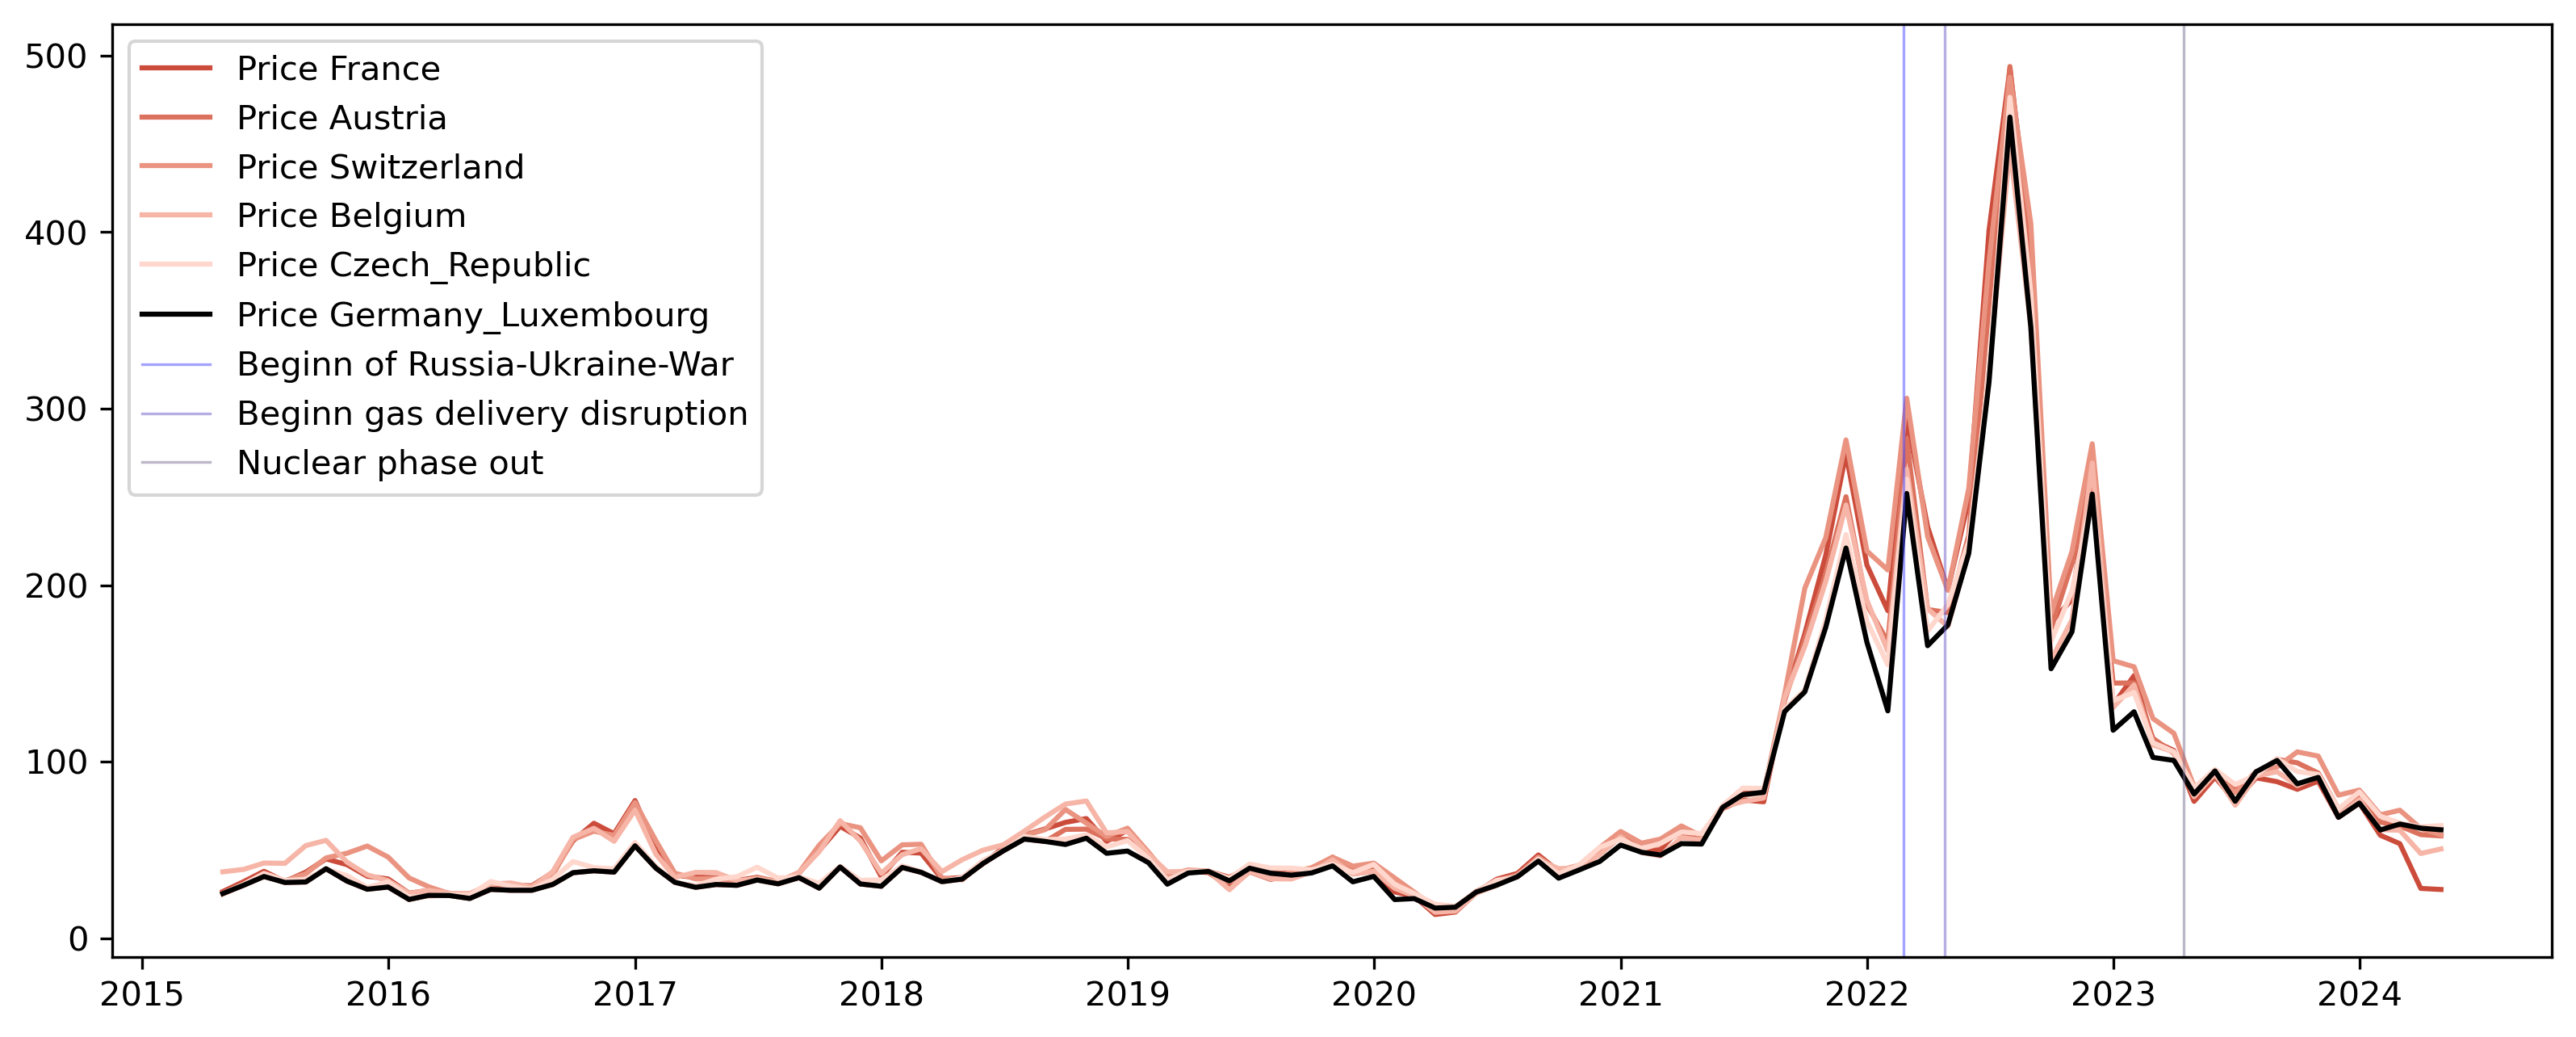

In [18]:
plt.figure(figsize= (13,5), dpi = 300)


plt.plot(Prices_FRA_monthly['France'], label = 'Price France',color='#cc4c3c')
plt.plot(Prices_Austria_monthly['Austria'], label = 'Price Austria', color='#dc715d')
plt.plot(Prices_Switzerland_monthly['Switzerland'], label = 'Price Switzerland', color='#ea9380')
plt.plot(Prices_Belgium_monthly['Belgium'], label = 'Price Belgium', color='#f6b5a6')
plt.plot(Prices_Czech_Republic_monthly['Czech_Republic'], label = 'Price Czech_Republic', color='#ffd7cd')
plt.plot(Prices_GER_monthly['Germany_Luxembourg'], label = 'Price Germany_Luxembourg',color='#000000')

plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,4,26),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()


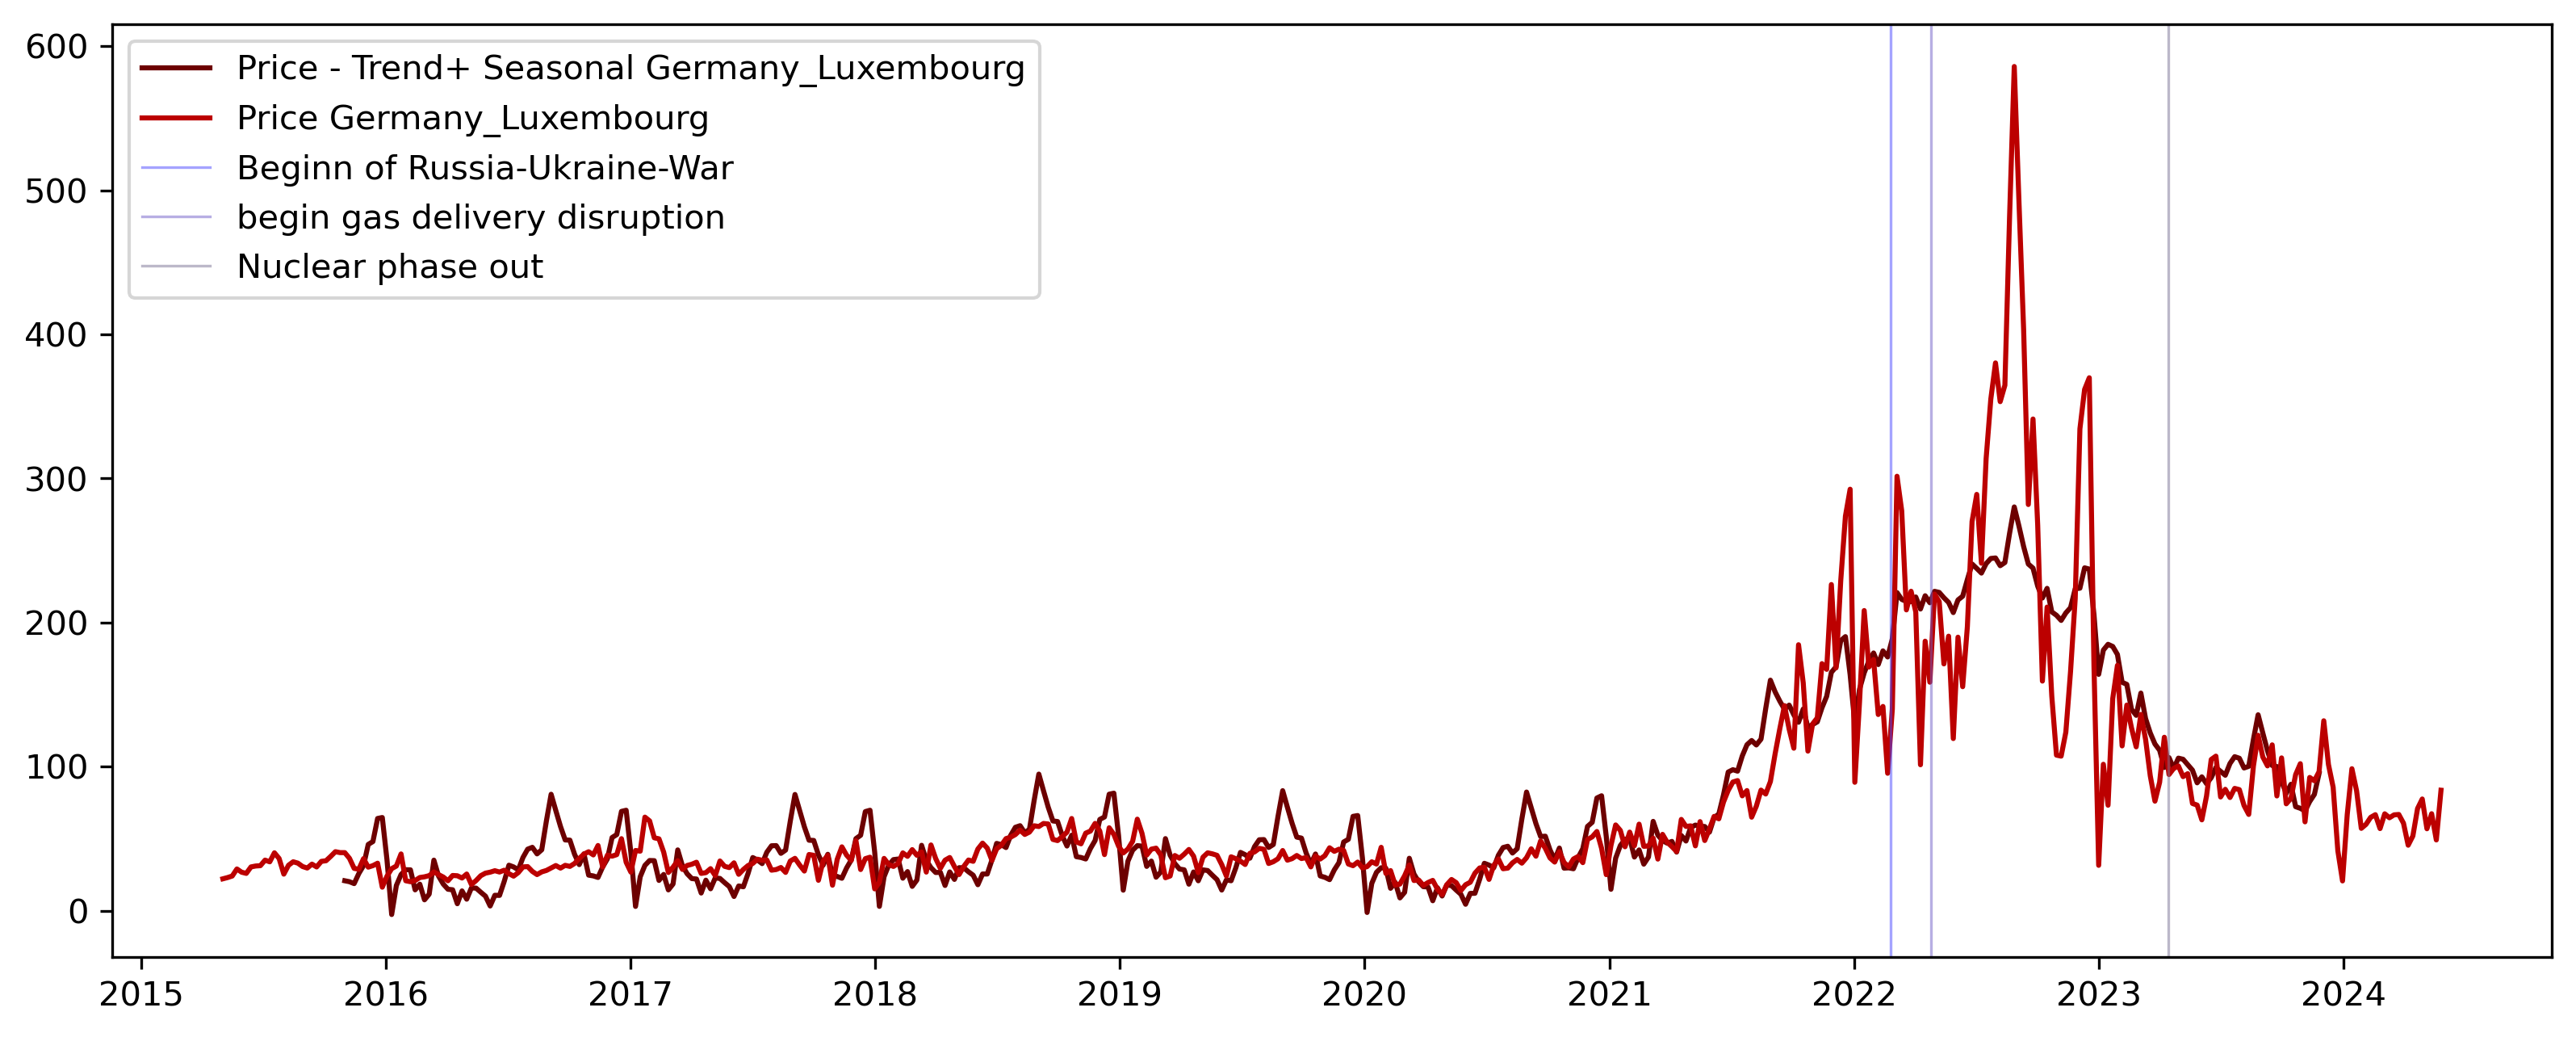

In [19]:
plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Prices_GER_weekly['Trend+Seasonal'], label = 'Price - Trend+ Seasonal Germany_Luxembourg', color = '#6d0000')
plt.plot(Prices_GER_weekly['Germany_Luxembourg'], label = 'Price Germany_Luxembourg',color='#bc0000')



plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,4,26),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'begin gas delivery disruption')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()

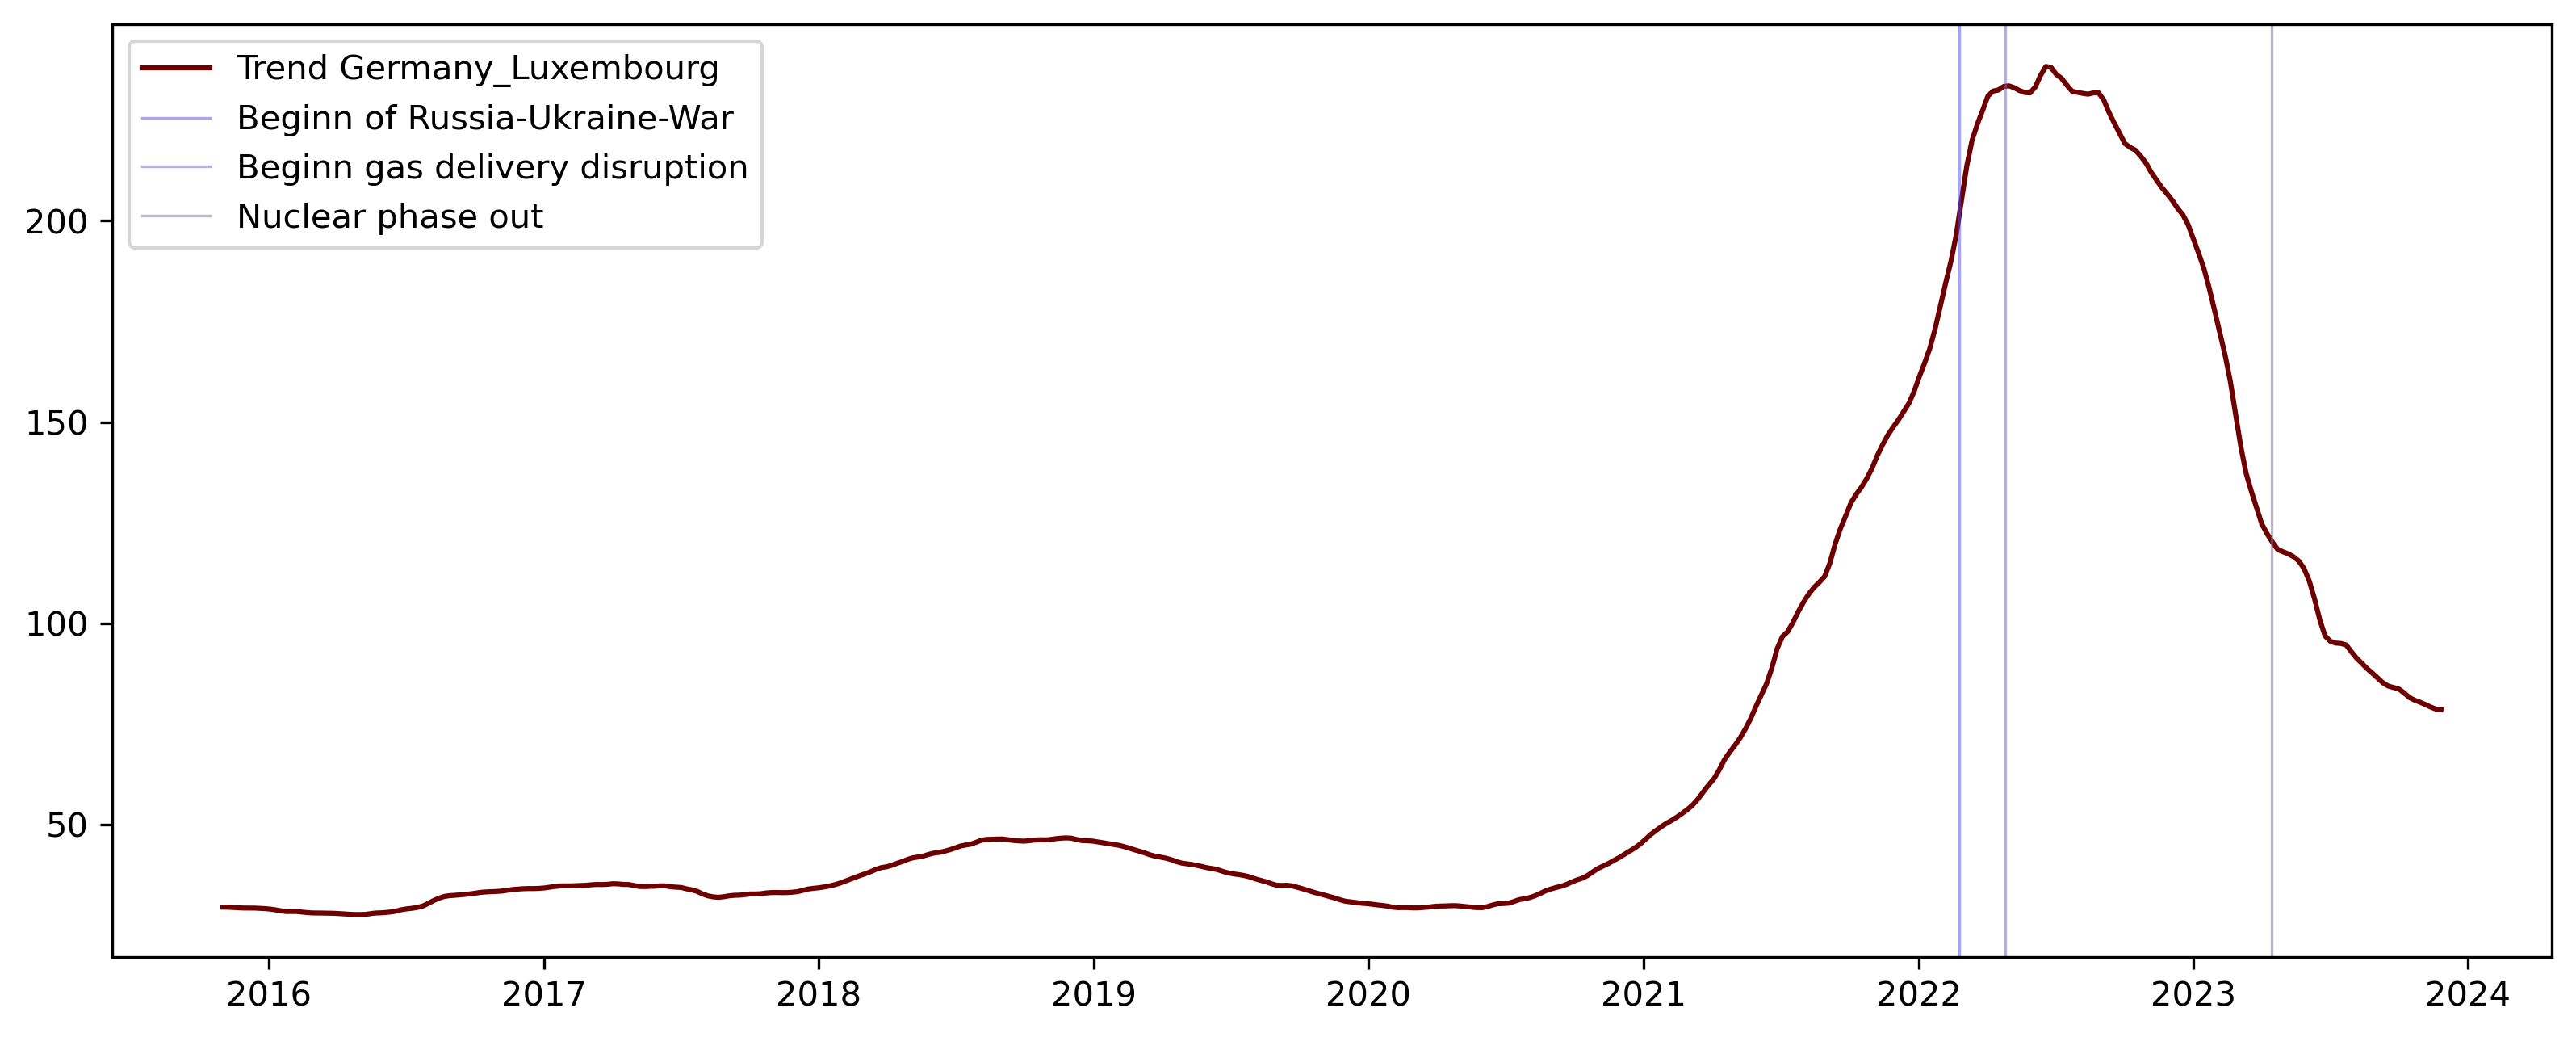

In [20]:
plt.figure(figsize= (13,5), dpi = 300)


plt.plot(Prices_GER_weekly['Trend'], label = 'Trend Germany_Luxembourg', color = '#6d0000')





plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,4,26),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()

wir sehen eine eindeutige Veränderung

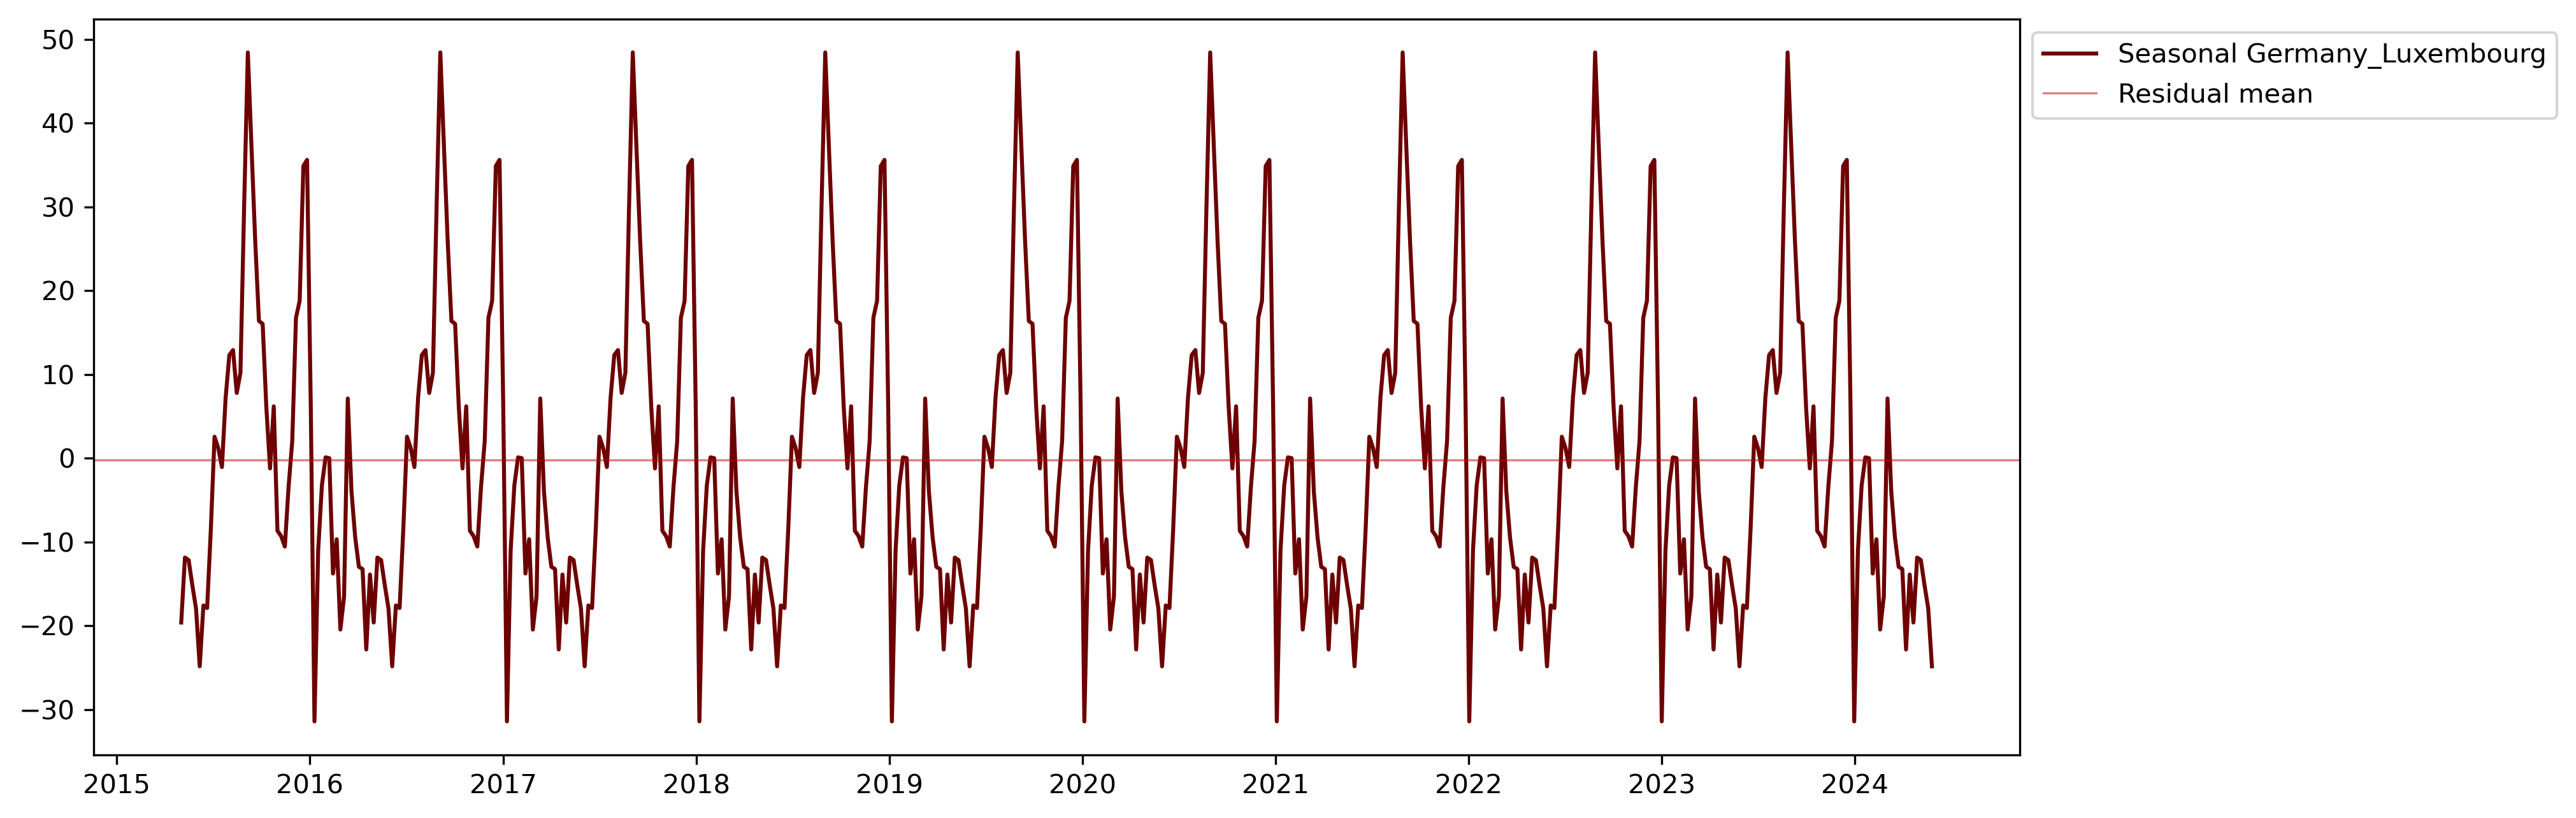

mean_Prices_GER_weekly_seasonal: -0.21420610128621356


In [21]:
mean_Prices_GER_weekly_seasonal = np.mean(Prices_GER_weekly['Seasonal'])


plt.figure(figsize= (13,5), dpi = 300)


plt.plot(Prices_GER_weekly['Seasonal'], label = 'Seasonal Germany_Luxembourg', color = '#6d0000')



plt.axhline(y=mean_Prices_GER_weekly_seasonal,color = '#bc0000', alpha = .5, linewidth = .8,  label = 'Residual mean')


plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

print(f'mean_Prices_GER_weekly_seasonal: {mean_Prices_GER_weekly_seasonal}')

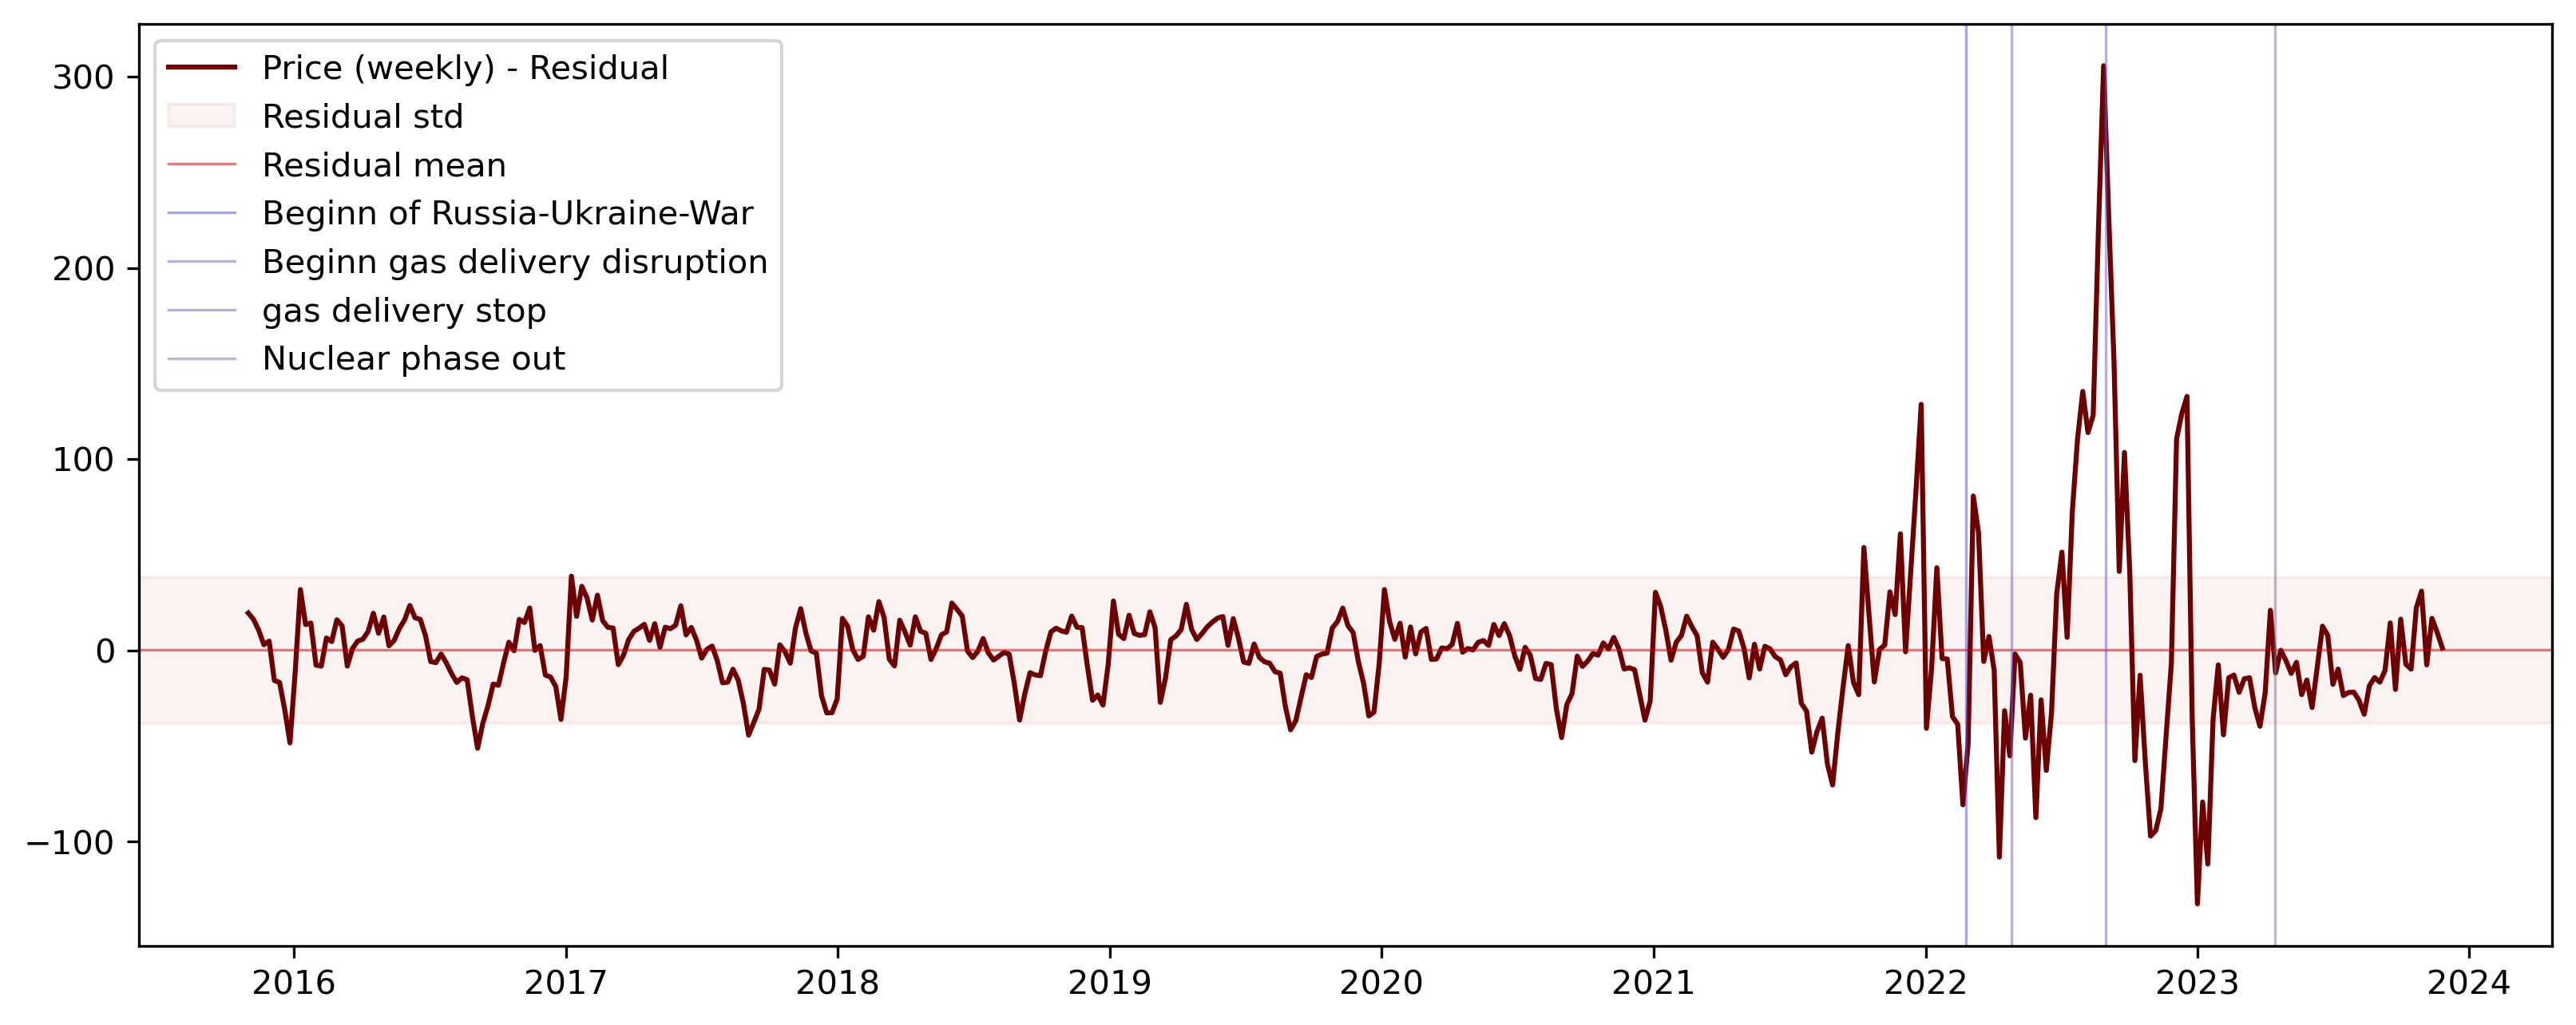

mean_Prices_GER_weekly_residual: 0.2591304829905208
std_Prices_GER_weekly_residual: 38.29386235821014


In [22]:
mean_Prices_GER_weekly_residual = np.mean(Prices_GER_weekly['Residual'])
std_Prices_GER_weekly_residual = np.std(Prices_GER_weekly['Residual'])


plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Prices_GER_weekly['Residual'], label = 'Price (weekly) - Residual', color = '#6d0000')
plt.axhspan(ymin=-std_Prices_GER_weekly_residual,ymax=std_Prices_GER_weekly_residual, alpha = 0.05, label = 'Residual std',color = '#bc0000')
plt.axhline(y=mean_Prices_GER_weekly_residual,color = '#bc0000', alpha = .5, linewidth = .8,  label = 'Residual mean')



plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,4,26),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2022,8,31),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'gas delivery stop')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()

print(f'mean_Prices_GER_weekly_residual: {mean_Prices_GER_weekly_residual}')
print(f'std_Prices_GER_weekly_residual: {std_Prices_GER_weekly_residual}')

### Generation + Import & Consumption + Export

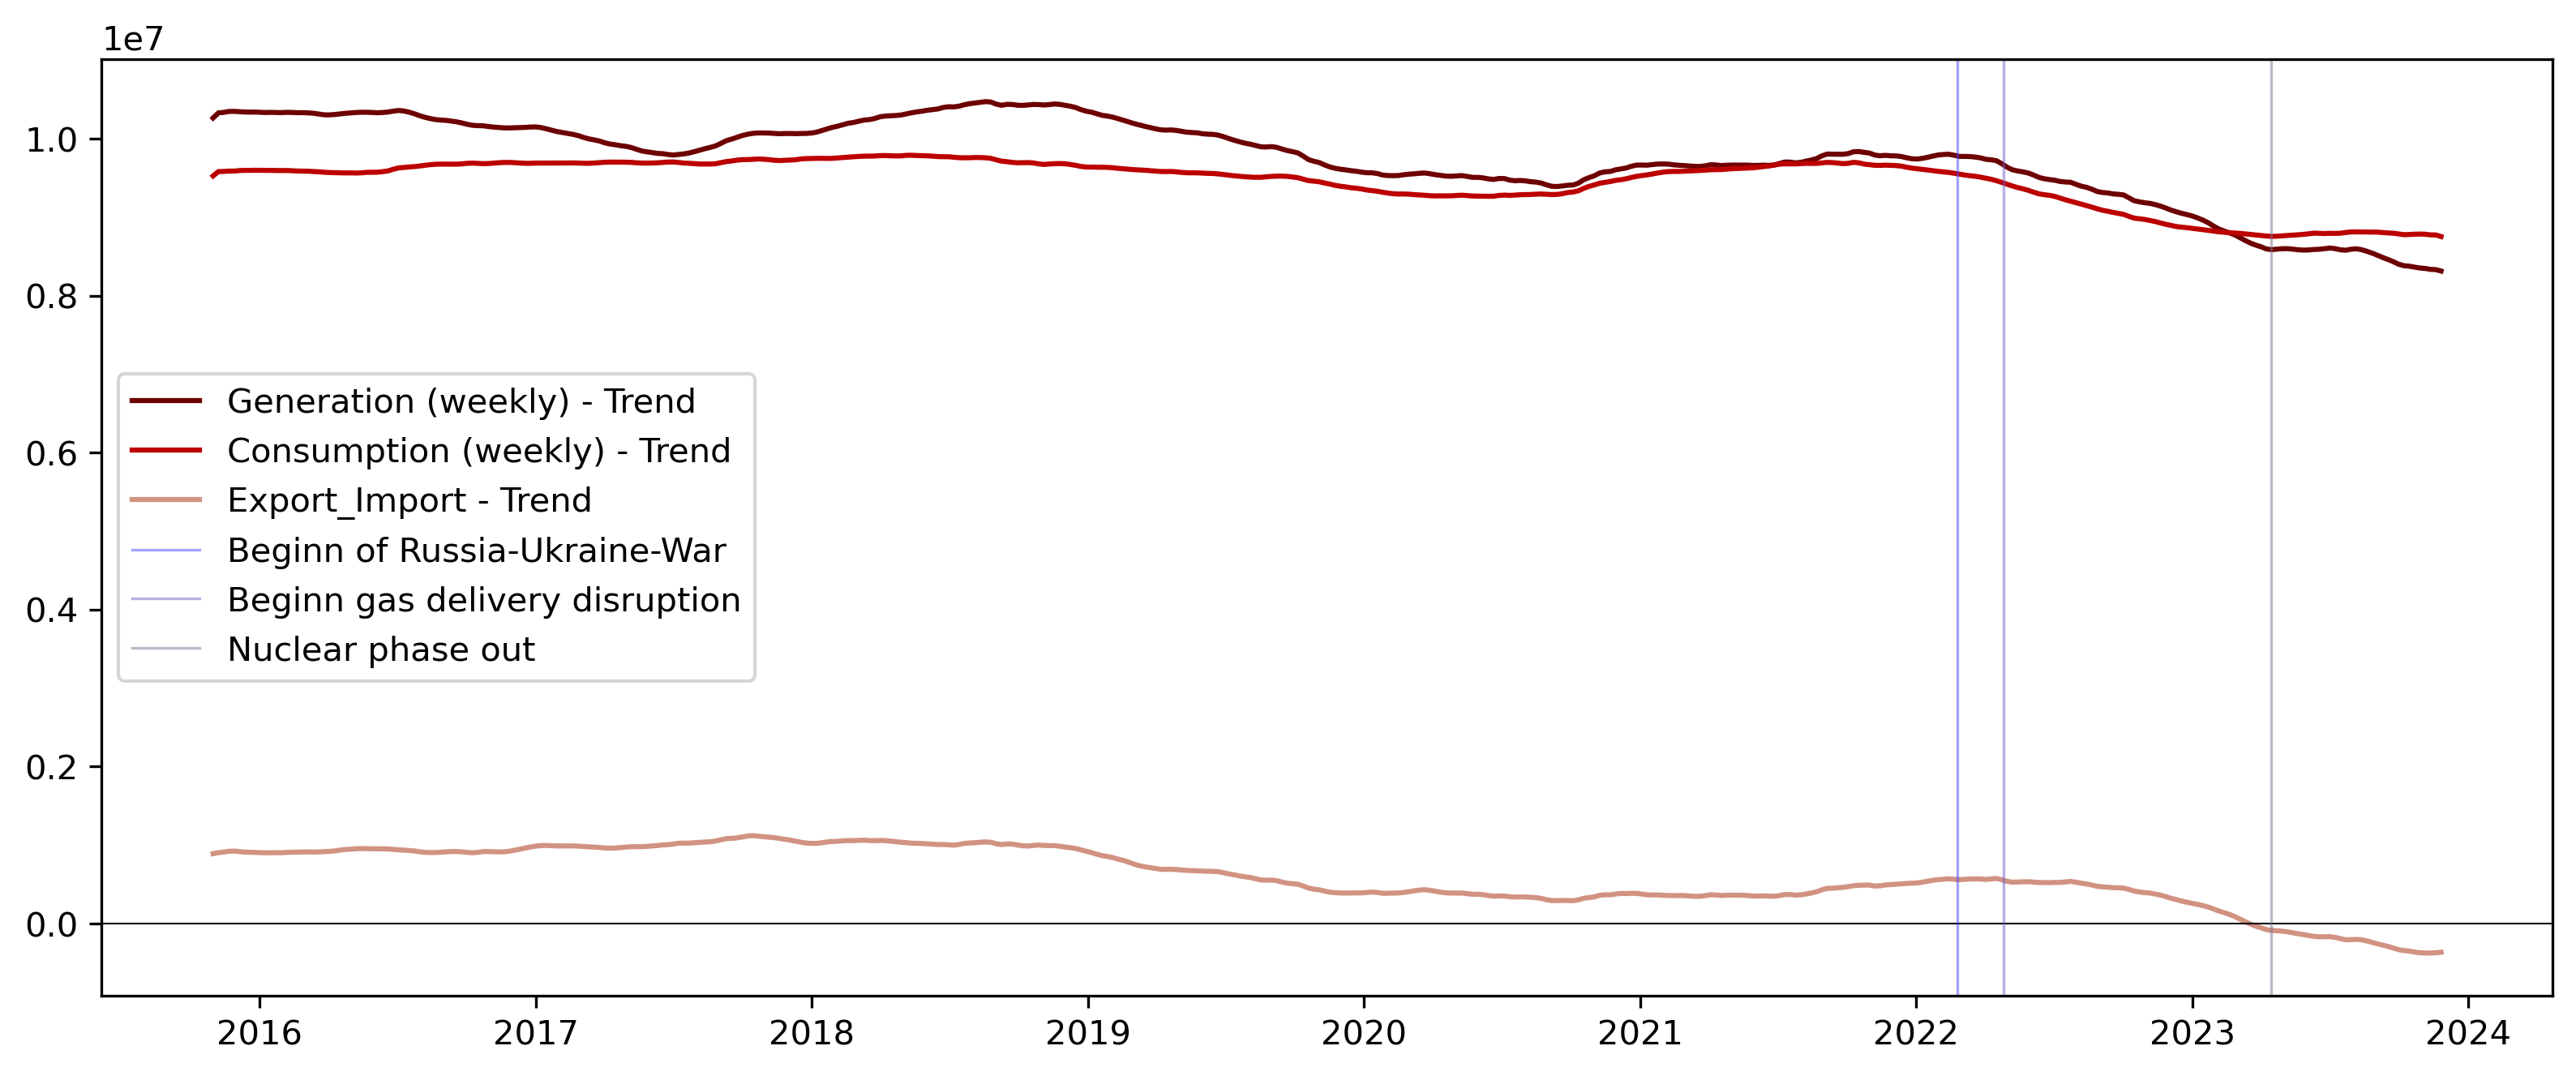

In [23]:
plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Generation_weekly['Trend'], label = 'Generation (weekly) - Trend ', color = '#6d0000')
plt.plot(Consumption_weekly['Trend'], label = 'Consumption (weekly) - Trend',color='#bc0000')
plt.plot(Export_Import_weekly['Trend'], label = 'Export_Import - Trend', color = '#d29282')
plt.axhline(y=0,color = '#000000', linewidth = 0.5)

plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,4,26),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()


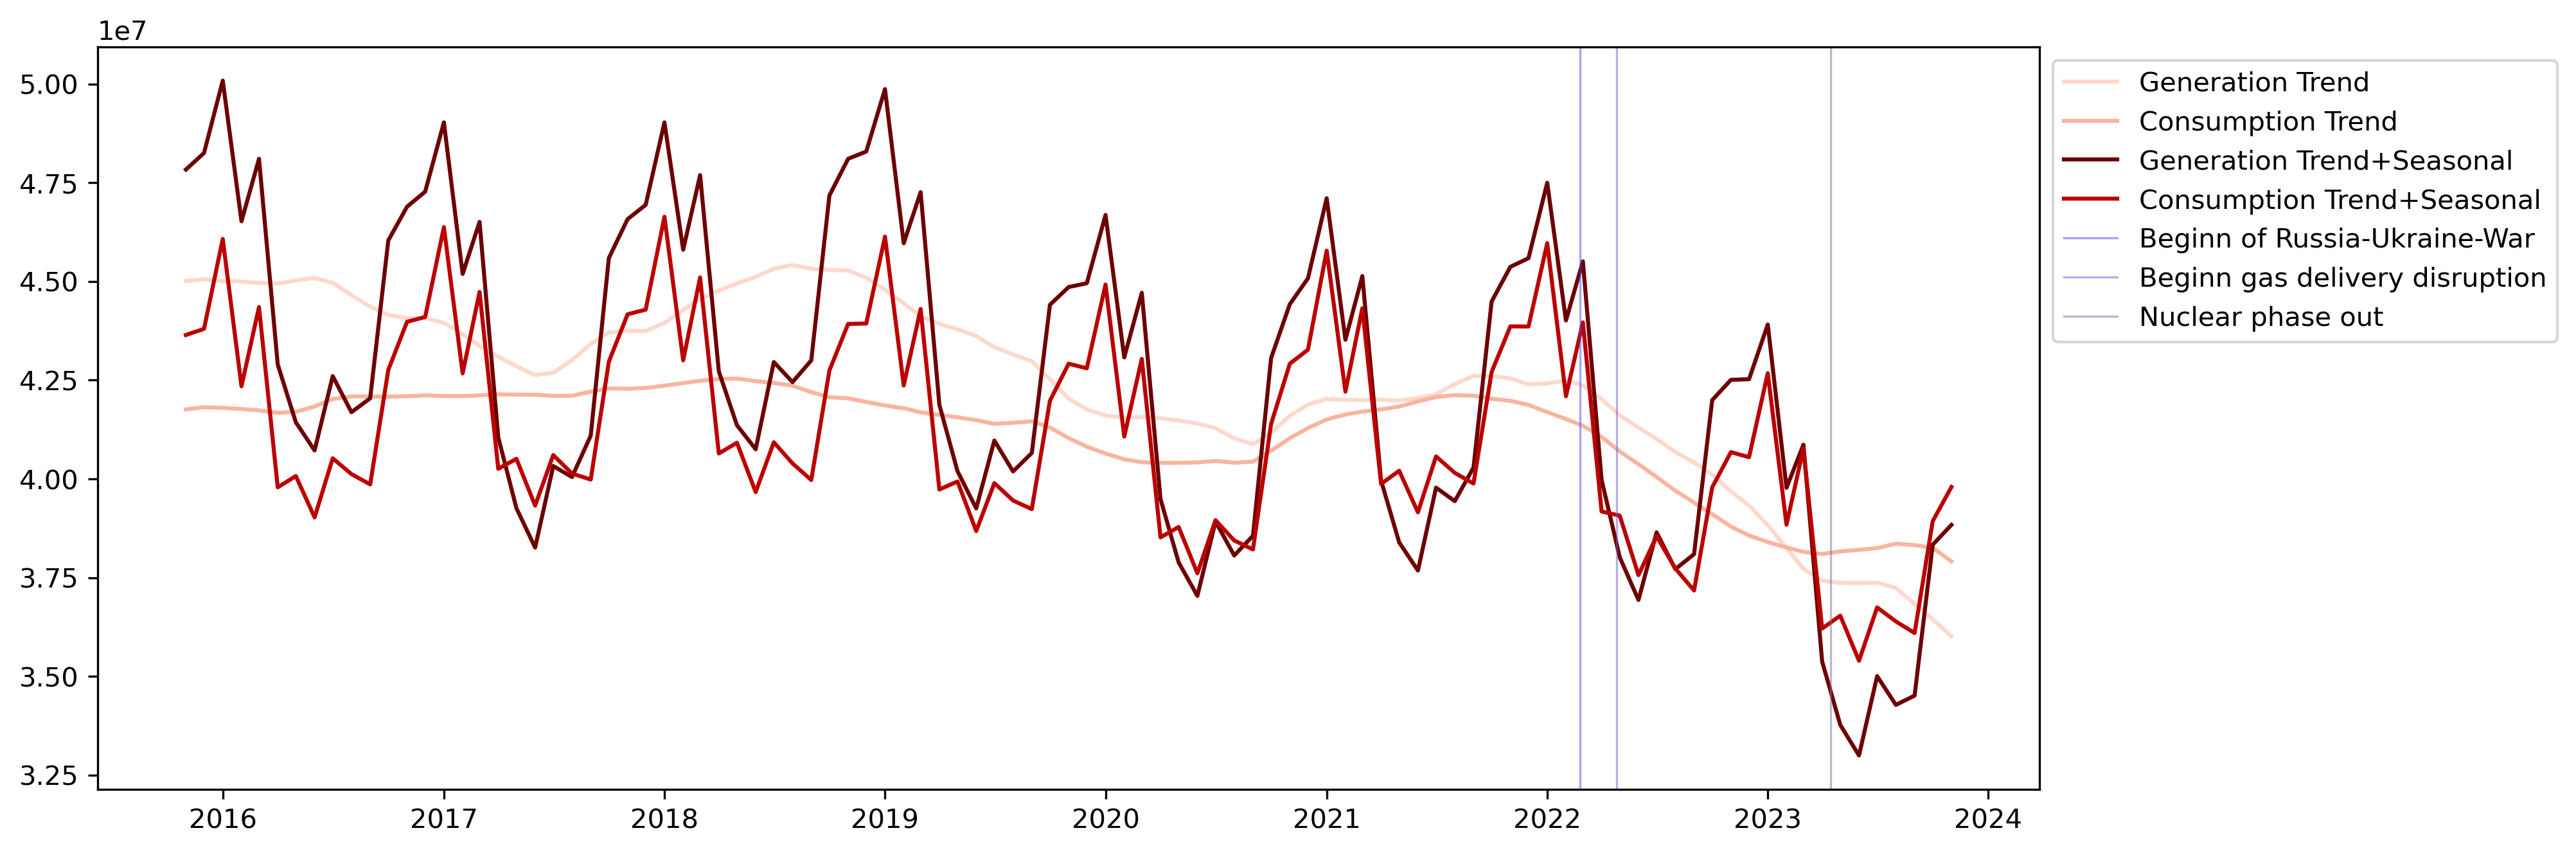

In [24]:
plt.figure(figsize=(13,5), dpi = 300)
plt.plot(Generation_monthly['Trend'], color= '#ffd8cb', label='Generation Trend')
plt.plot(Consumption_monthly['Trend'], color= '#f7b59f', label='Consumption Trend')
plt.plot(Generation_monthly['Trend+Seasonal'],color='#6d0000', label='Generation Trend+Seasonal')
plt.plot(Consumption_monthly['Trend+Seasonal'],color='#bc0000', label='Consumption Trend+Seasonal')


plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,4,26),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

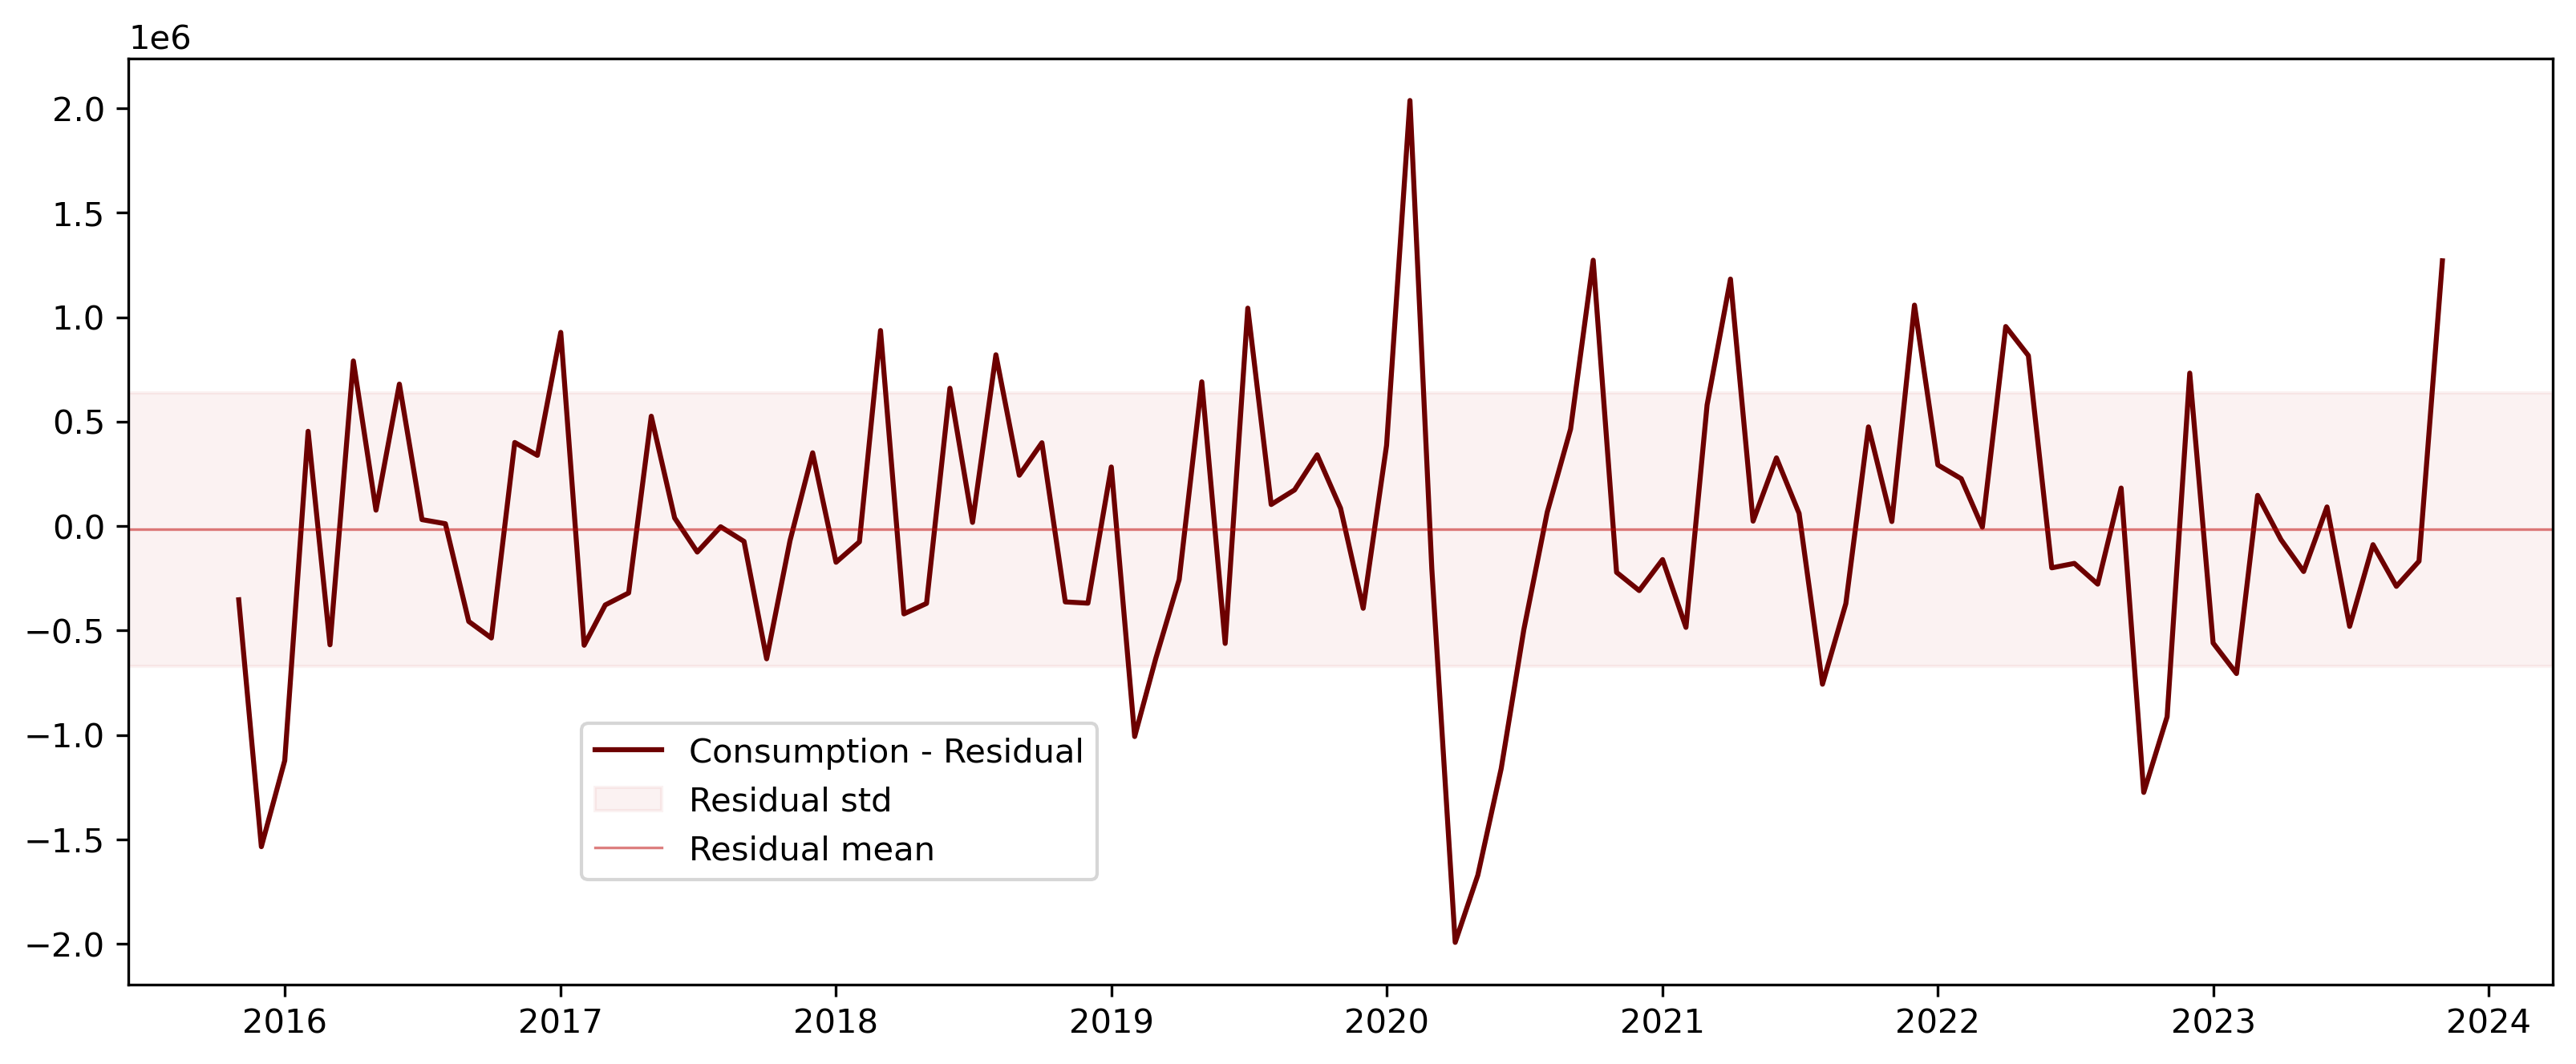

In [25]:
mean_Consumption_monthly_residual = np.mean(Consumption_monthly['Residual'])
std_Consumption_monthly_residual = np.std(Consumption_monthly['Residual'])


plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Consumption_monthly['Residual'], label = 'Consumption - Residual', color = '#6d0000')
plt.axhspan(ymin=mean_Consumption_monthly_residual-std_Consumption_monthly_residual,ymax=mean_Consumption_monthly_residual+std_Consumption_monthly_residual, alpha = 0.05, label = 'Residual std',color = '#bc0000')
plt.axhline(y=mean_Consumption_monthly_residual,color = '#bc0000', alpha = .5, linewidth = .8,  label = 'Residual mean')




plt.legend(bbox_to_anchor=(0.18,0.3))
plt.show()

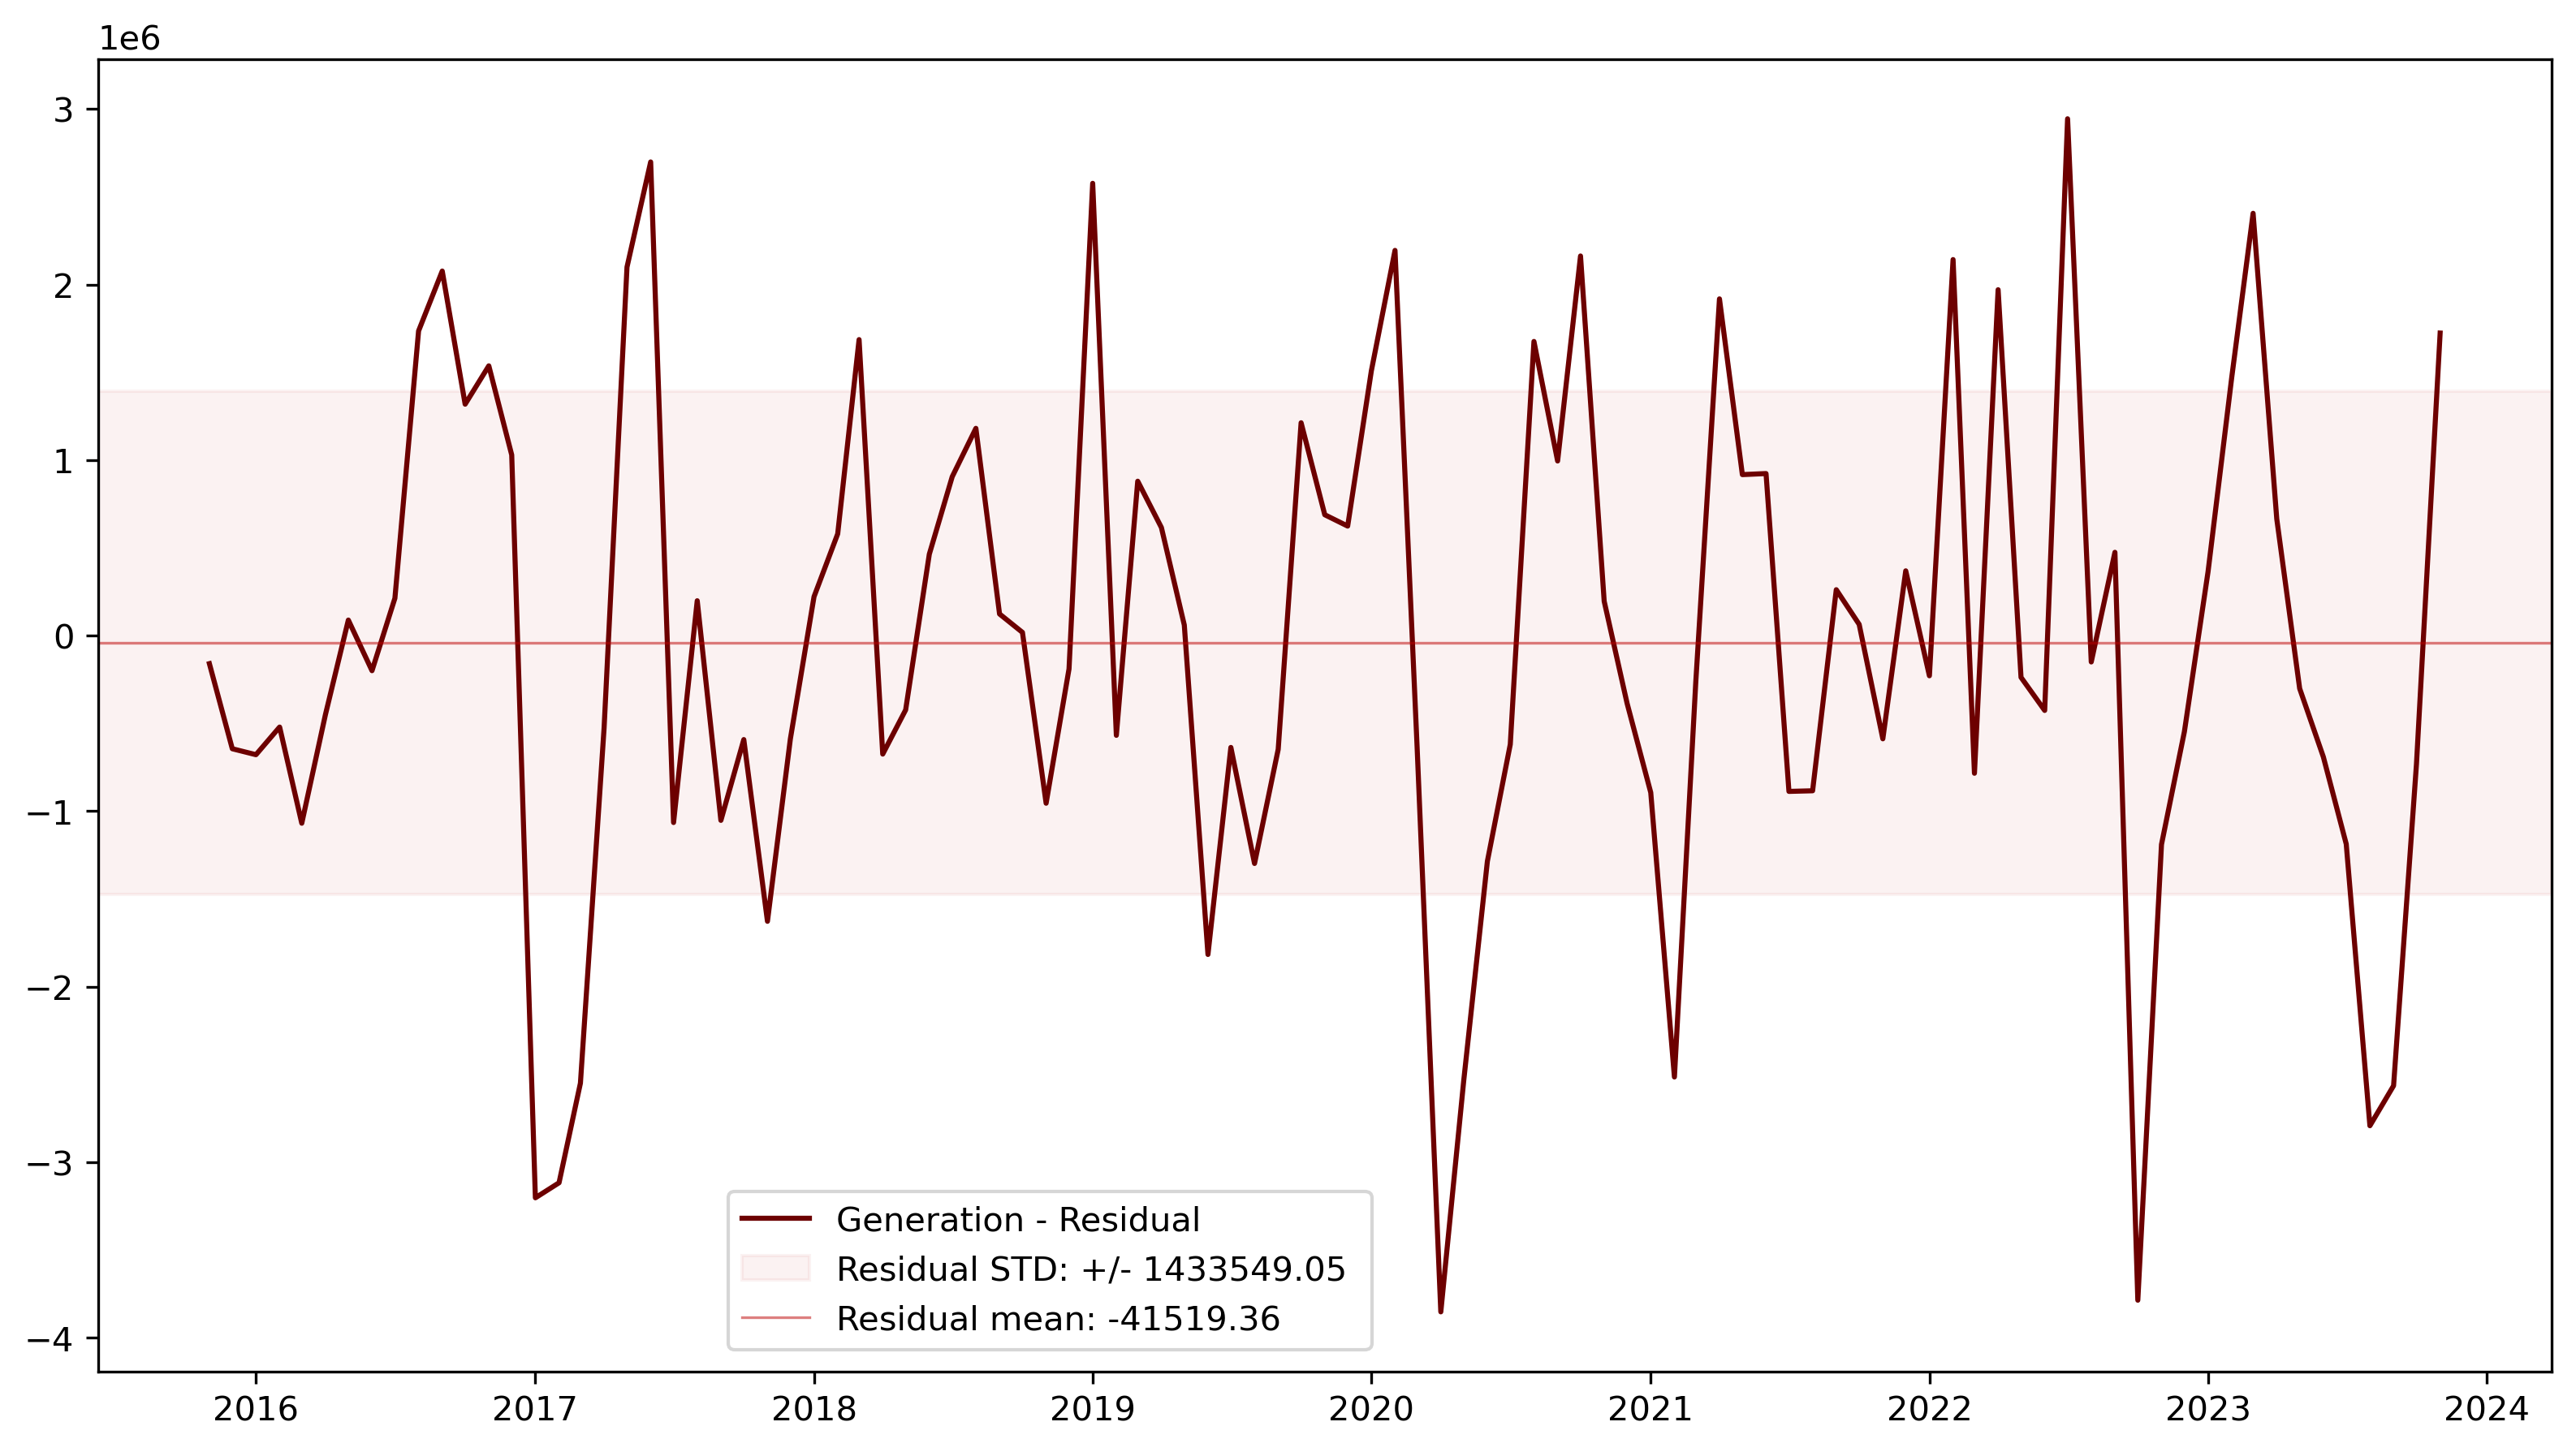

In [174]:
mean_Generation_monthly_residual = np.mean(Generation_monthly['Residual'])
std_Generation_monthly_residual = np.std(Generation_monthly['Residual'])


plt.figure(figsize= (13,7), dpi = 300)

plt.plot(Generation_monthly['Residual'], label = 'Generation - Residual', color = '#6d0000')
plt.axhspan(ymin=mean_Generation_monthly_residual-std_Generation_monthly_residual,ymax=mean_Generation_monthly_residual+std_Generation_monthly_residual, alpha = 0.05, label = f'Residual STD: +/- {(std_Generation_monthly_residual).round(2)} ',color = '#bc0000')
plt.axhline(y=mean_Generation_monthly_residual,color = '#bc0000', alpha = .5, linewidth = .8,  label = f'Residual mean: {(mean_Generation_monthly_residual).round(2)}')





plt.legend(bbox_to_anchor=(0.25, 0.15))
plt.show()

In [27]:
Import_reversed = Export_Import
Import_reversed['Import_sum'] = Import_reversed['Import_sum']* (-1) 

In [28]:
Export_monthly = decomposition_df(Export_Import, 'Export_sum')
Import_monthly = decomposition_df(Import_reversed, 'Import_sum')
Export_weekly = decomposition_df(Export_Import, 'Export_sum','W')
Import_weekly = decomposition_df(Import_reversed, 'Import_sum','W')


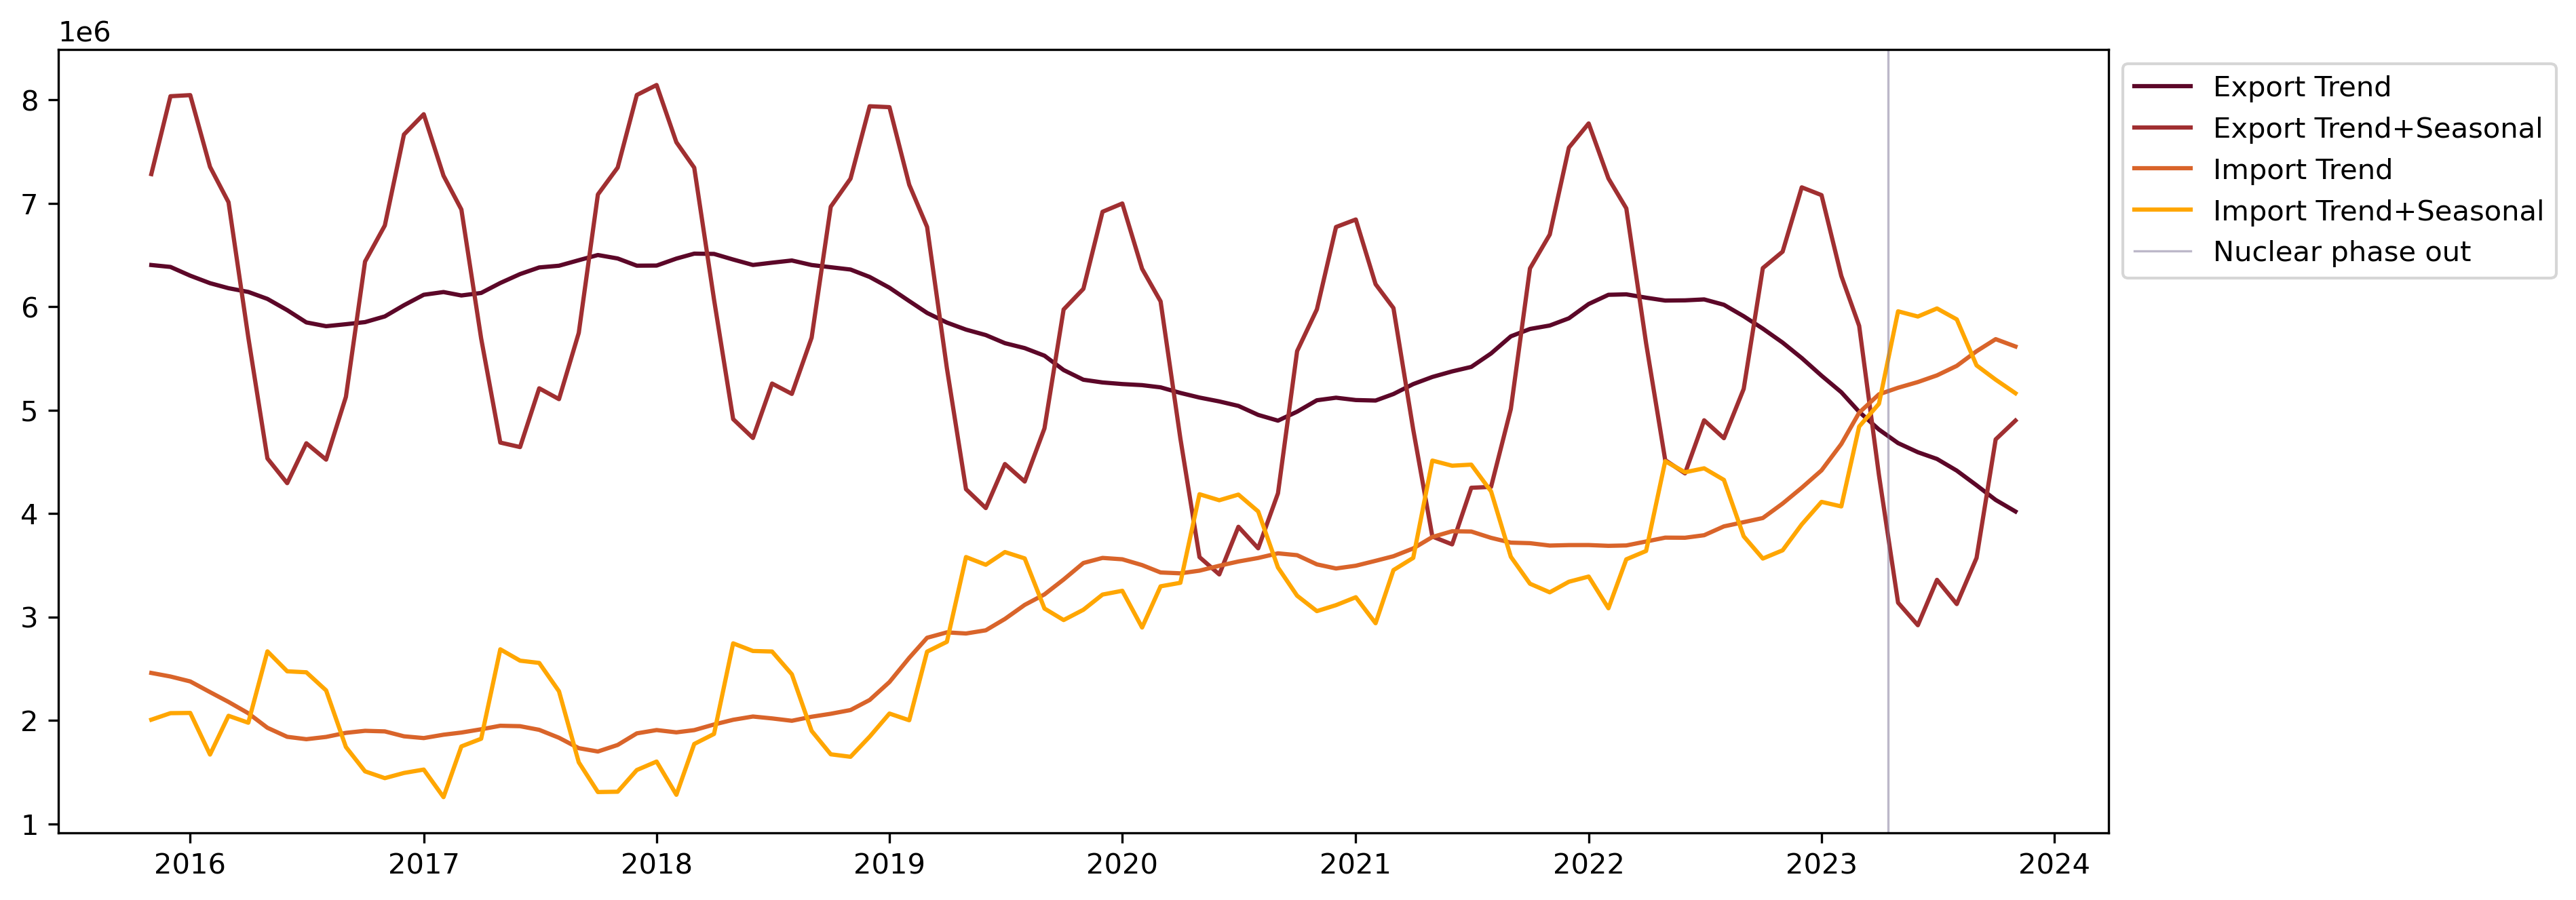

In [29]:
plt.figure(figsize=(13,5), dpi = 300)
plt.plot(Export_monthly['Trend'], color= '#5c0728', label='Export Trend')
plt.plot(Export_monthly['Trend+Seasonal'],color='#a02f31', label='Export Trend+Seasonal')
plt.plot(Import_monthly['Trend'], color= '#d9642a', label='Import Trend')
plt.plot(Import_monthly['Trend+Seasonal'],color='#ffa600', label='Import Trend+Seasonal')




plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

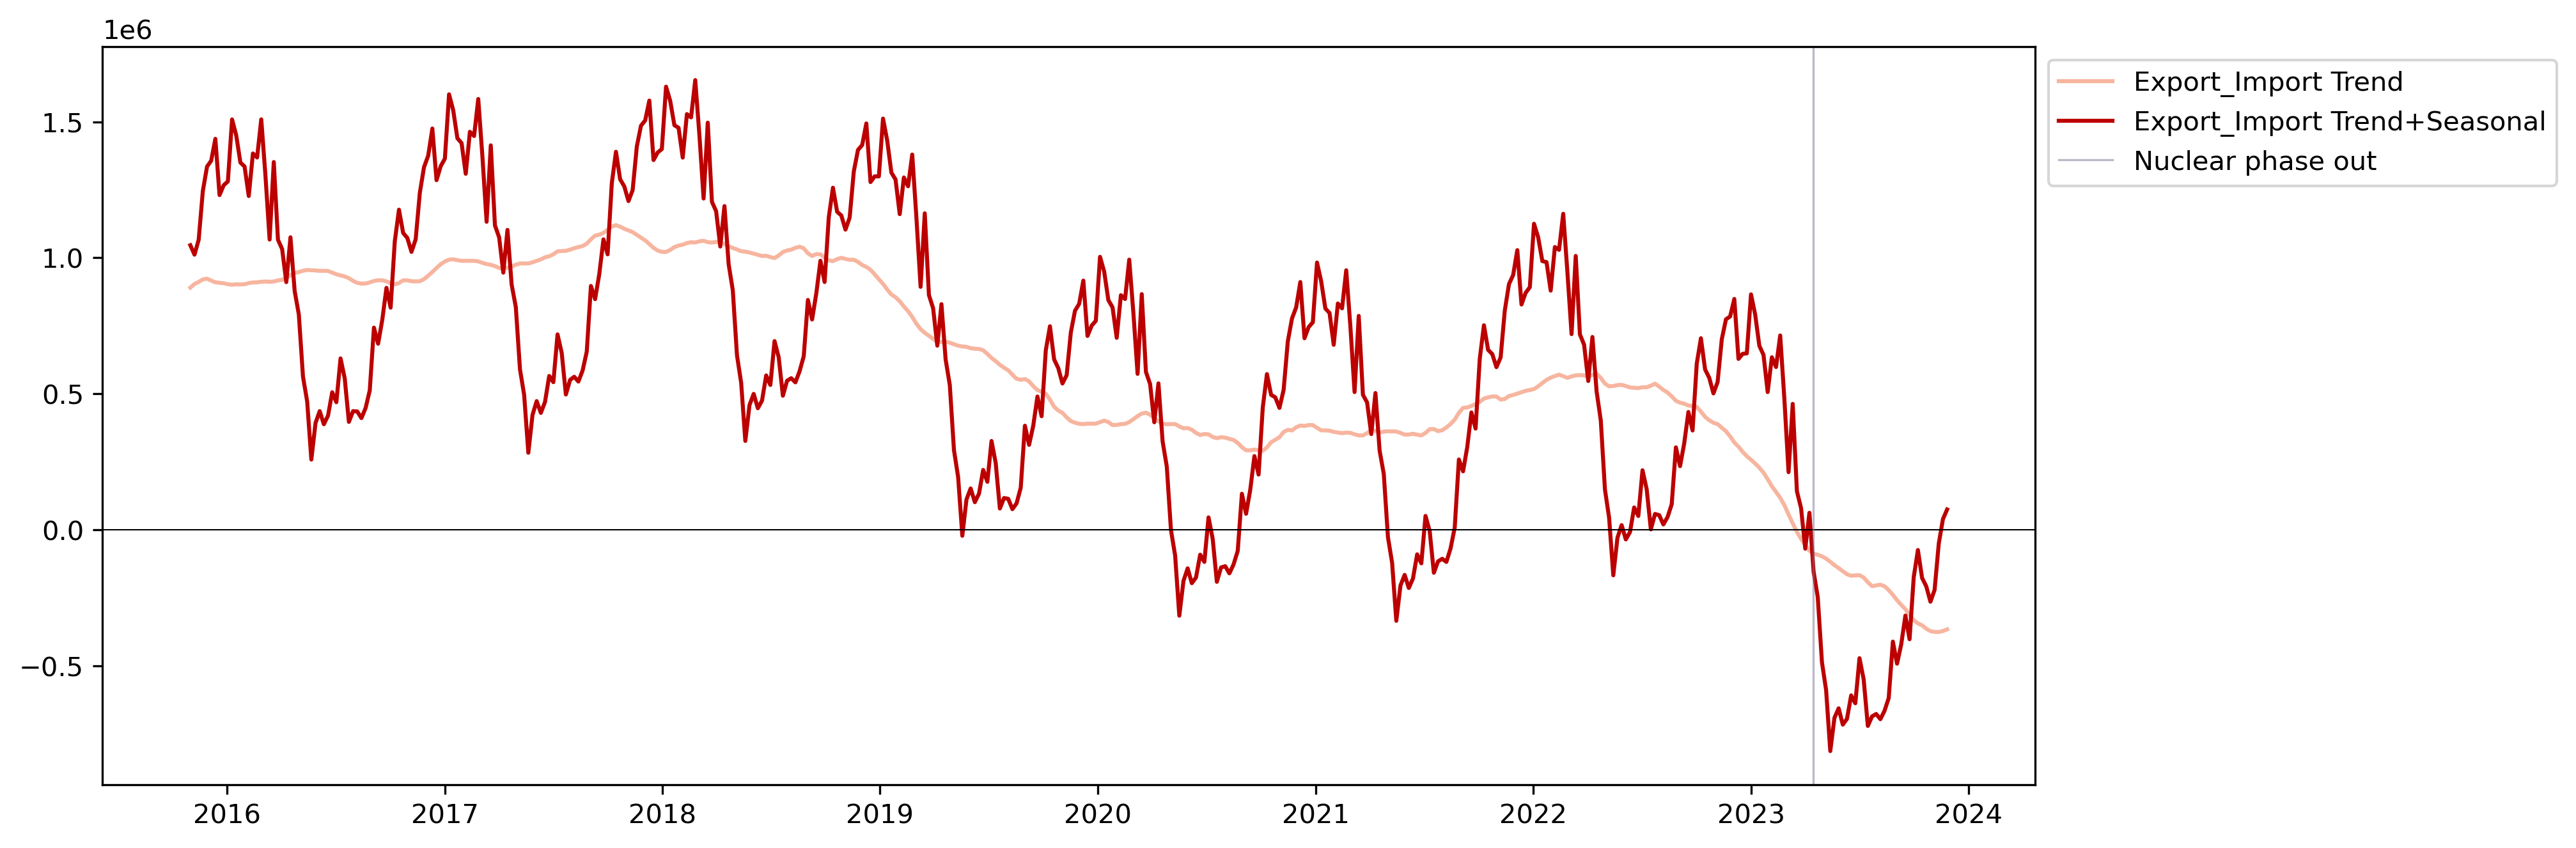

In [30]:
plt.figure(figsize=(13,5), dpi = 300)
plt.plot(Export_Import_weekly['Trend'], color= '#f7b59f', label='Export_Import Trend')
plt.plot(Export_Import_weekly['Trend+Seasonal'],color='#bc0000', label='Export_Import Trend+Seasonal')

plt.axhline(y=0,color = '#000000', linewidth = 0.5)


plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

## Splitting of the data


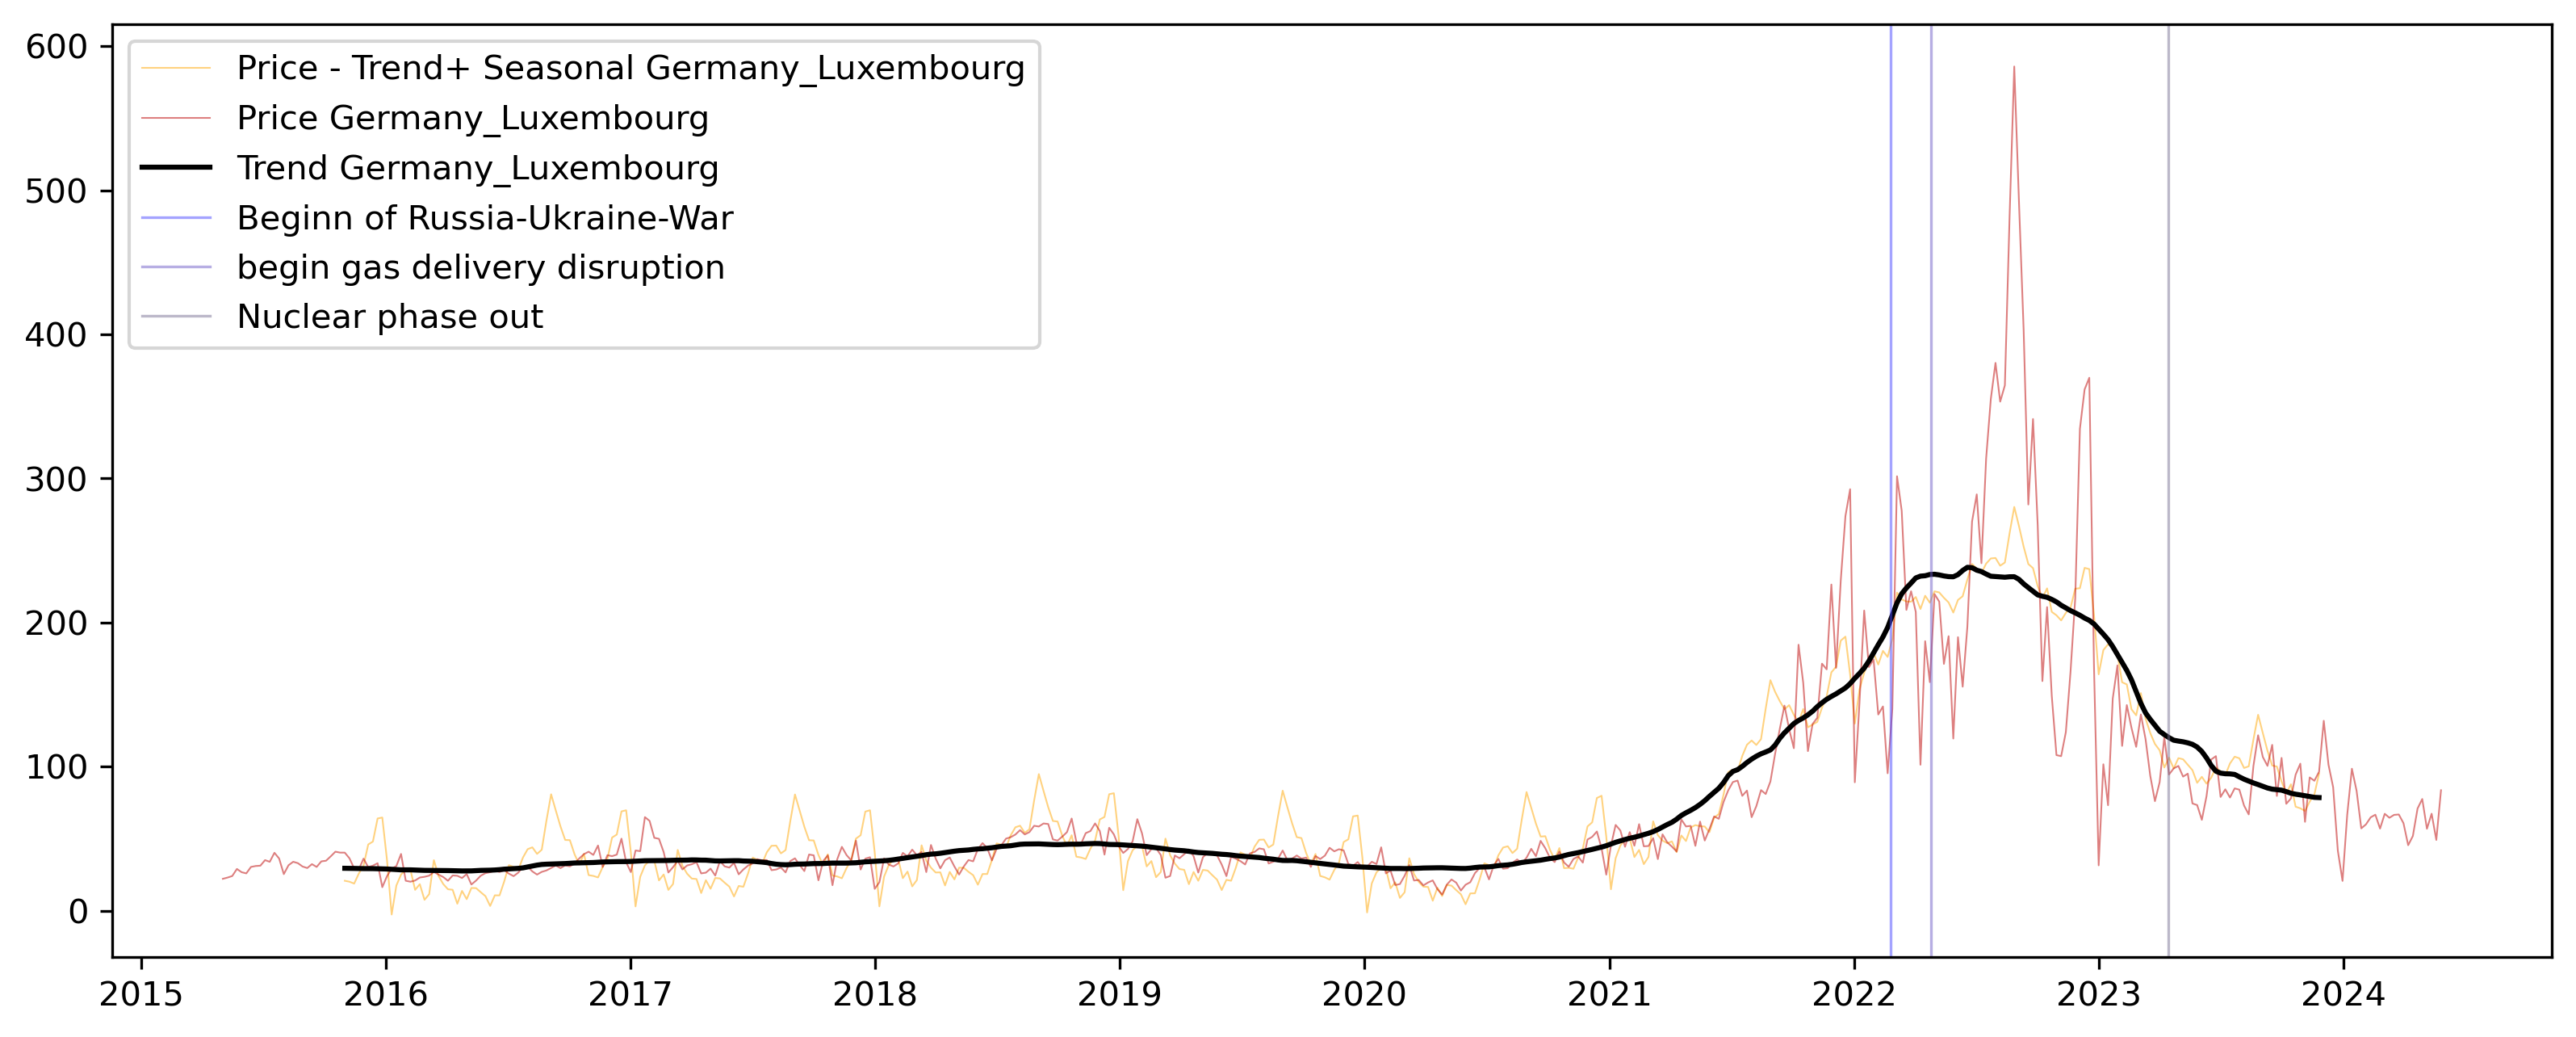

In [161]:
plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Prices_GER_weekly['Trend+Seasonal'], label = 'Price - Trend+ Seasonal Germany_Luxembourg', color = '#ffa600',alpha = .5, linewidth = 0.5 )
plt.plot(Prices_GER_weekly['Germany_Luxembourg'], label = 'Price Germany_Luxembourg',color='#bc0000', alpha = .5, linewidth = 0.5 )
plt.plot(Prices_GER_weekly['Trend'], label = 'Trend Germany_Luxembourg',color='#000000')# ,alpha = .2, linewidth = 0.5 )


# plt.axvspan(xmin = Prices_GER_weekly.index.min() ,xmax=dt.datetime(2021,5,1,0,0,0),color = '#000000', alpha = 0.05, linewidth = .8,  label = 'normal')
# plt.axvspan(xmin= dt.datetime(2021,5,1,0,0,0),xmax= Prices_GER_weekly.index.max(), alpha = 0.1, label = 'anomaly',color = '#000000')
plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,4,26),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'begin gas delivery disruption')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()

In [128]:
Prices_GER_weekly['Trend_Slope'] = Prices_GER_weekly['Trend'].diff()

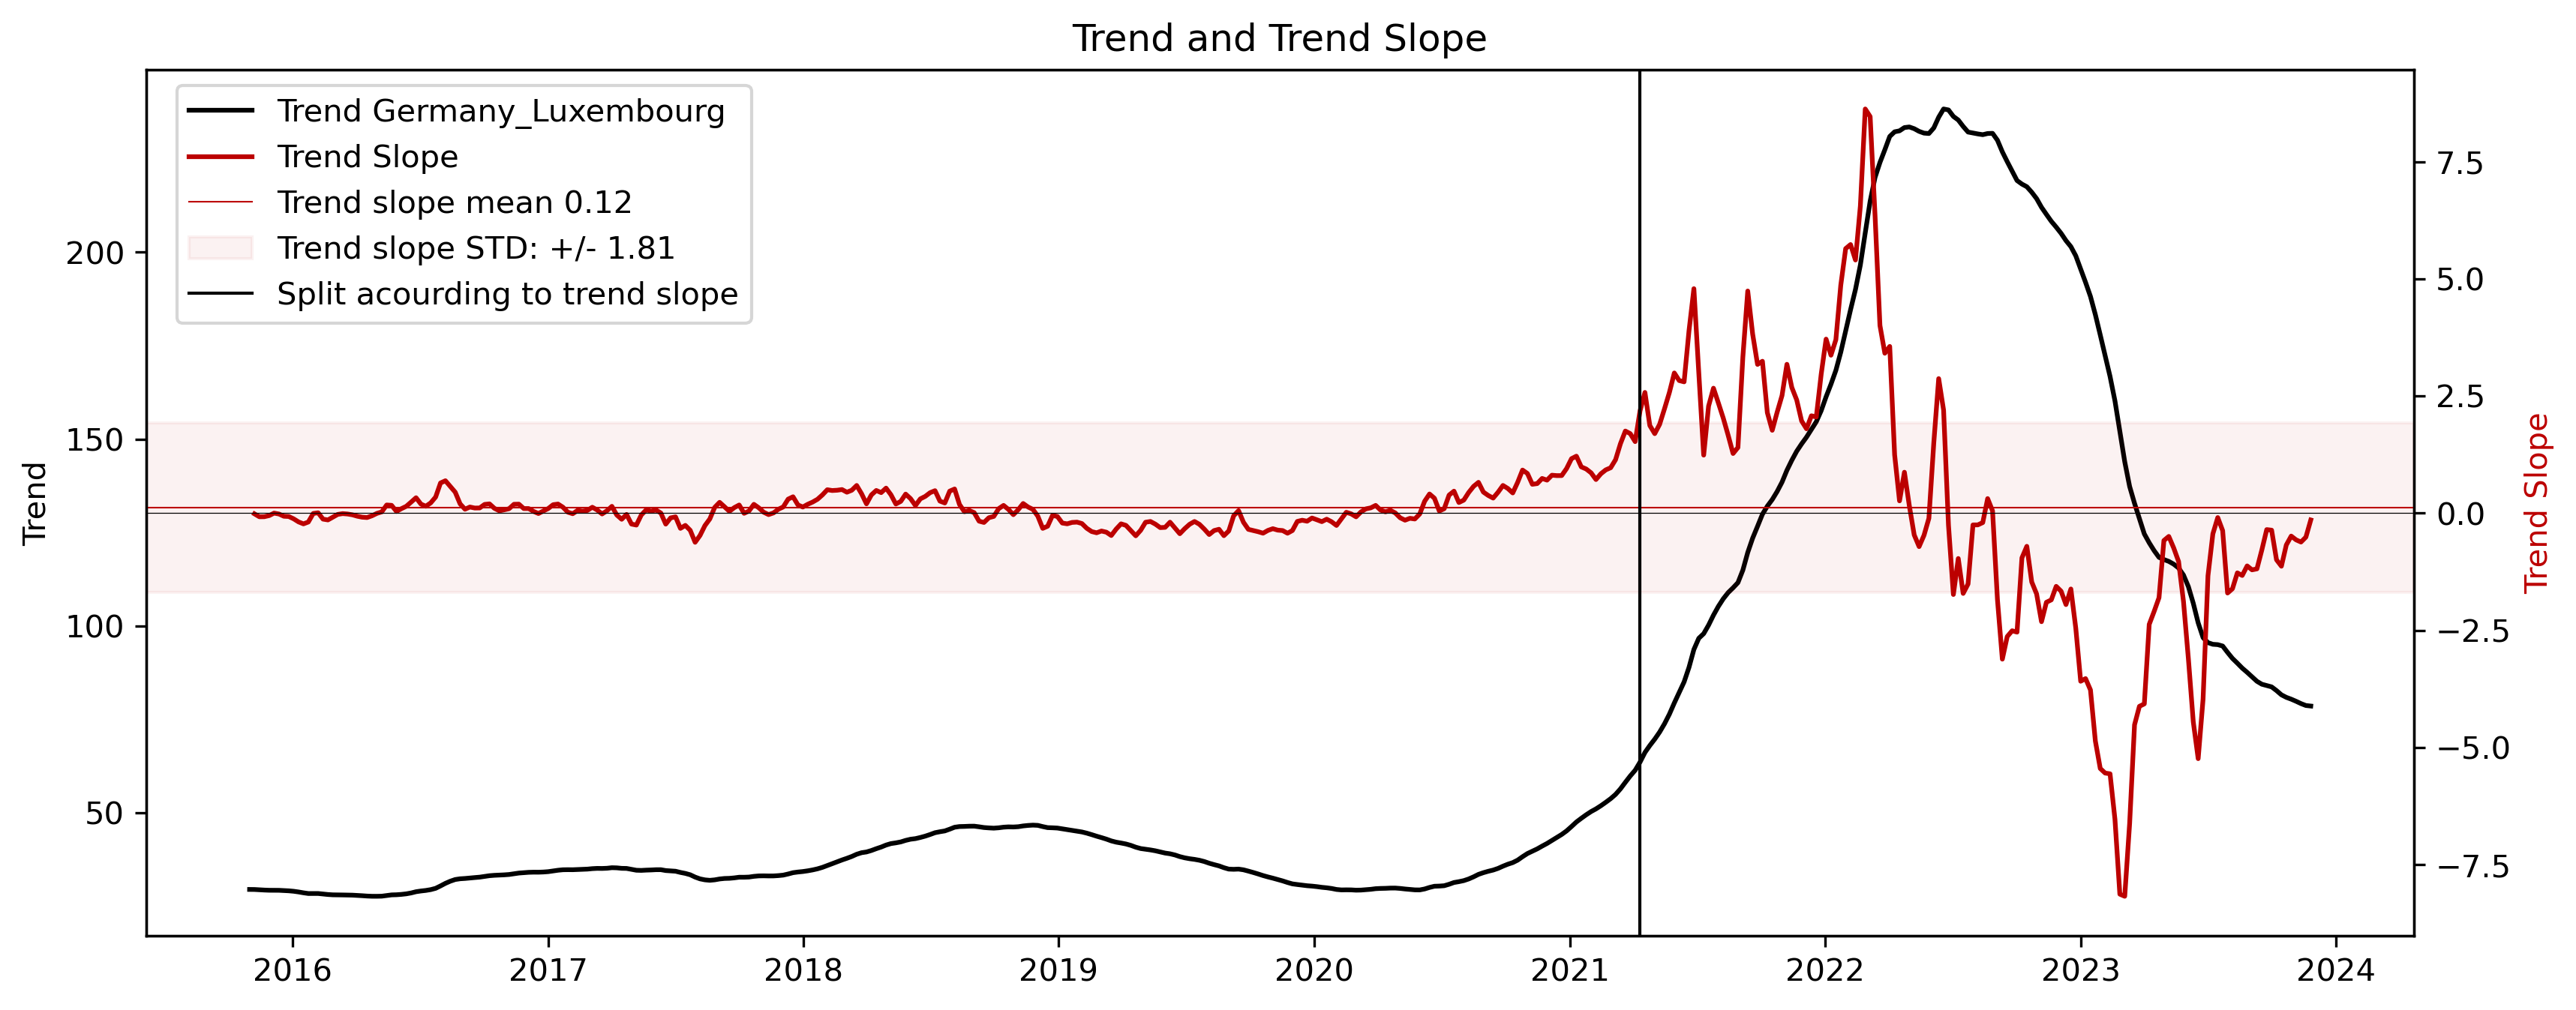

In [192]:
Trend_slope_std = Prices_GER_weekly['Trend_Slope'].std()
Trend_slope_mean = Prices_GER_weekly['Trend_Slope'].mean()


fig, ax1 = plt.subplots(figsize=(13, 5), dpi=300)


ax1.plot(Prices_GER_weekly.index, Prices_GER_weekly['Trend'], label='Trend Germany_Luxembourg', color='#000000')
ax1.set_ylabel('Trend', color='#000000')


ax2 = ax1.twinx()
ax2.plot(Prices_GER_weekly.index, Prices_GER_weekly['Trend_Slope'], label='Trend Slope', color='#bc0000')

ax2.axhline(y=Trend_slope_mean, color = '#bc0000', linewidth = 0.5, label = f'Trend slope mean {(Trend_slope_mean).round(2)}')
ax2.axhspan(ymin=Trend_slope_mean-Trend_slope_std,ymax=Trend_slope_mean+Trend_slope_std, alpha = 0.05, label = f'Trend slope STD: +/- {(Trend_slope_std).round(2)}',color = '#bc0000')

ax2.axhline(y=0, color = '#000000', linewidth = 0.3)
ax2.set_ylabel('Trend Slope', color='#bc0000')

plt.axvline(x=dt.datetime(2021,4,11),color = '#000000', alpha = 1, linewidth = 1,  label = 'Split acourding to trend slope')

fig.legend(loc = 'upper left', bbox_to_anchor=(0.13, 0.88))
plt.title('Trend and Trend Slope')
plt.show()

In [184]:
Prices_GER_weekly[['Trend_Slope']].loc[Prices_GER_weekly['Trend_Slope']>=(Trend_slope_mean+Trend_slope_std)].sort_index().head(1)

Trend_Slope
Start                  
2021-04-11     2.182671

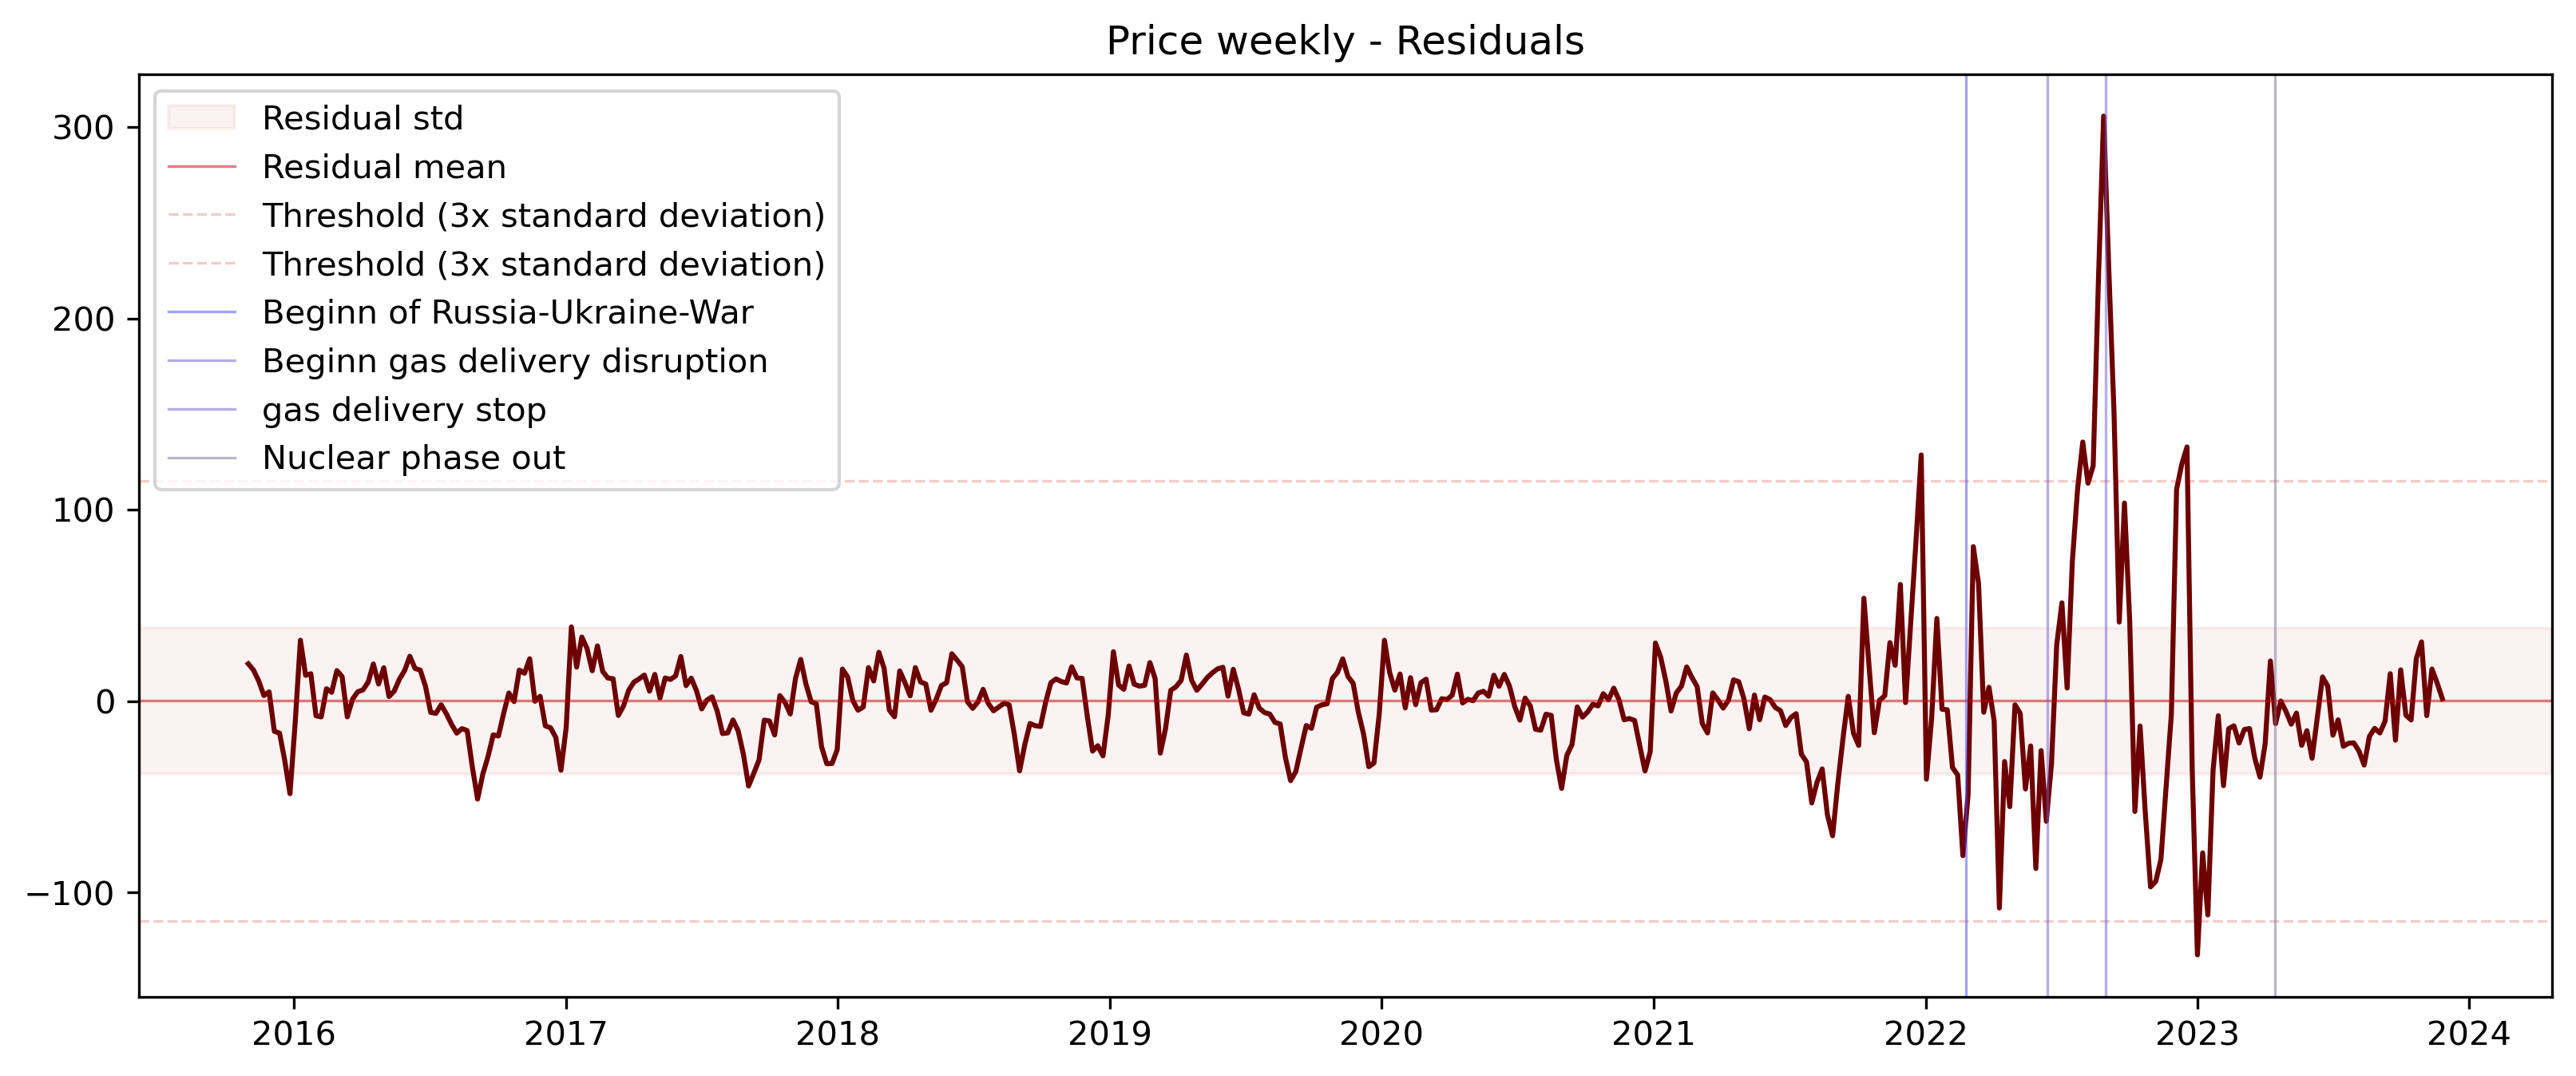

mean_Prices_GER_weekly_residual: 0.2591304829905208
std_Prices_GER_weekly_residual: 38.29386235821014


In [102]:
mean_Prices_GER_weekly_residual = np.mean(Prices_GER_weekly['Residual'])
std_Prices_GER_weekly_residual = np.std(Prices_GER_weekly['Residual'])
threshold = std_Prices_GER_weekly_residual*3

plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Prices_GER_weekly['Residual'], color = '#6d0000')
plt.axhspan(ymin=-std_Prices_GER_weekly_residual,ymax=std_Prices_GER_weekly_residual, alpha = 0.05, label = 'Residual std',color = '#bc0000')
plt.axhline(y=mean_Prices_GER_weekly_residual,color = '#bc0000', alpha = .5, linewidth = .8,  label = 'Residual mean')

plt.axhline(y=threshold,color = '#bc0000', alpha = .2, linewidth = .8,  label = 'Threshold (3x standard deviation)', linestyle = '--')
plt.axhline(y=-threshold,color = '#bc0000', alpha = .2, linewidth = .8,  label = 'Threshold (3x standard deviation)', linestyle = '--')


plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,6,14),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2022,8,31),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'gas delivery stop')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.title('Price weekly - Residuals')
plt.show()

print(f'mean_Prices_GER_weekly_residual: {mean_Prices_GER_weekly_residual}')
print(f'std_Prices_GER_weekly_residual: {std_Prices_GER_weekly_residual}')

A look at the residuals provides a clearer picture of our outliers. Several extreme points stand out. 

In [105]:
marker = Prices_GER_weekly[['Residual']].loc[(Prices_GER_weekly['Residual'] >=3*std_Prices_GER_weekly_residual)|(Prices_GER_weekly['Residual'] <=-3*std_Prices_GER_weekly_residual)].sort_values('Residual', ascending = False)


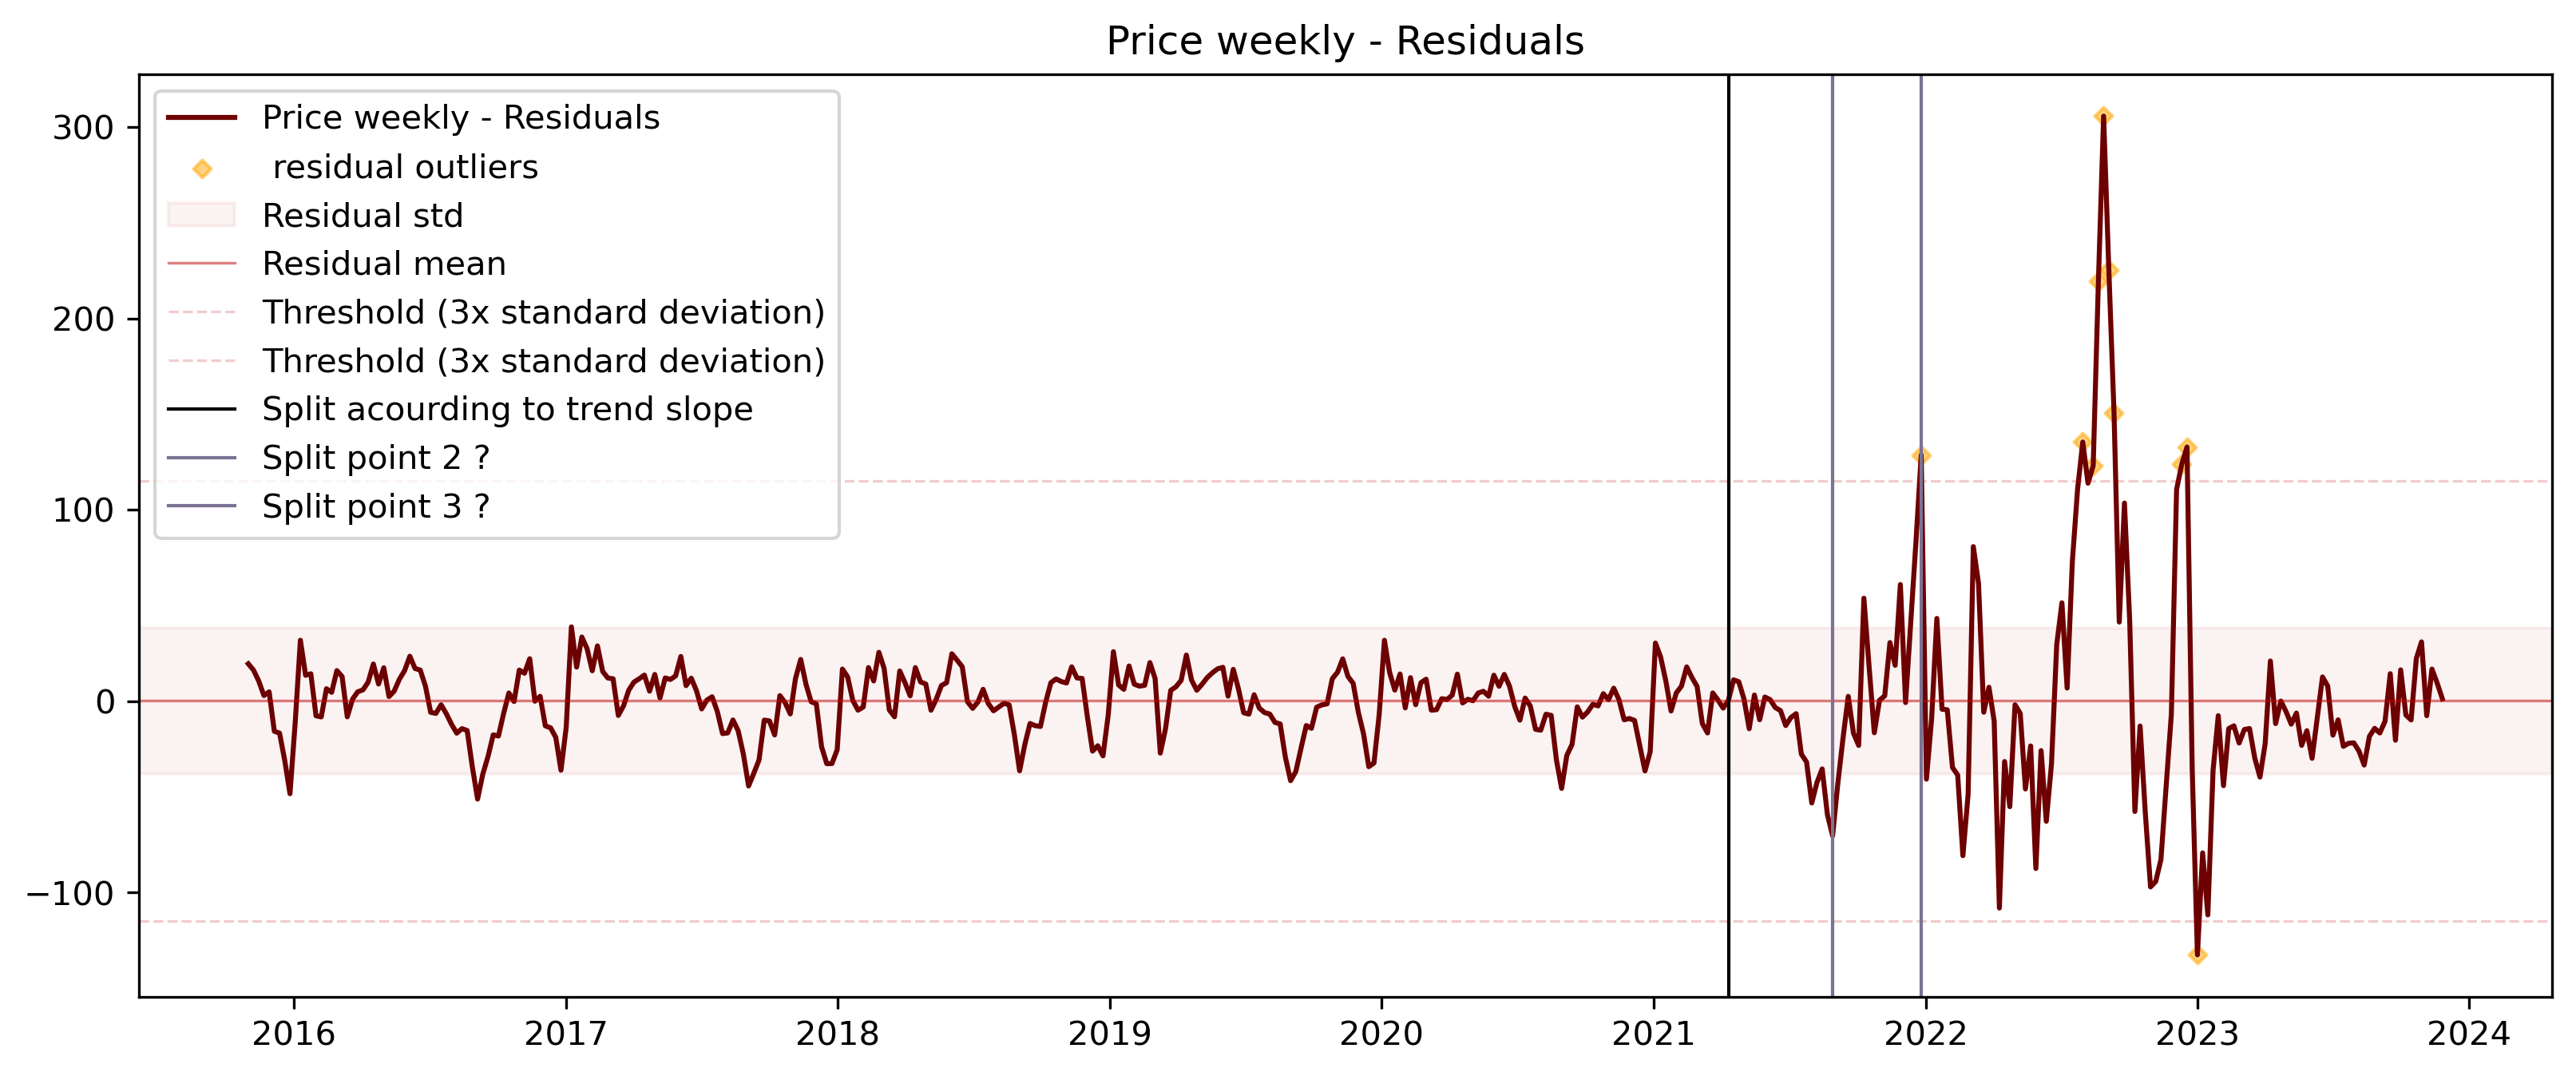

mean_Prices_GER_weekly_residual: 0.2591304829905208
std_Prices_GER_weekly_residual: 38.29386235821014


In [194]:
mean_Prices_GER_weekly_residual = np.mean(Prices_GER_weekly['Residual'])
std_Prices_GER_weekly_residual = np.std(Prices_GER_weekly['Residual'])
threshold = std_Prices_GER_weekly_residual*3

plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Prices_GER_weekly['Residual'], color = '#6d0000', label = 'Price weekly - Residuals')
plt.scatter(x=marker.index, y= marker['Residual'], color = '#ffa600',alpha = 0.5, s=14,  marker ='D' , label = ' residual outliers')
plt.axhspan(ymin=-std_Prices_GER_weekly_residual,ymax=std_Prices_GER_weekly_residual, alpha = 0.05, label = 'Residual std',color = '#bc0000')
plt.axhline(y=mean_Prices_GER_weekly_residual,color = '#bc0000', alpha = .5, linewidth = .8,  label = 'Residual mean')

plt.axhline(y=threshold,color = '#bc0000', alpha = .2, linewidth = .8,  label = 'Threshold (3x standard deviation)', linestyle = '--')
plt.axhline(y=-threshold,color = '#bc0000', alpha = .2, linewidth = .8,  label = 'Threshold (3x standard deviation)', linestyle = '--')


#Question for Miranda:
plt.axvline(x=dt.datetime(2021,4,11),color = '#000000', alpha = 1, linewidth = 1,  label = 'Split acourding to trend slope')
#plt.axvline(x=dt.datetime(2021,8,1),color = '#7b7294', alpha = 1, linewidth = 1,  label = 'Split point 1 ? ')
plt.axvline(x=dt.datetime(2021,8,29),color = '#7b7294', alpha = 1, linewidth = 1,  label = 'Split point 2 ? ')
plt.axvline(x=dt.datetime(2021,12,26),color = '#7b7294', alpha = 1, linewidth = 1,  label = 'Split point 3 ? ')

plt.legend()
plt.title('Price weekly - Residuals')
plt.show()

print(f'mean_Prices_GER_weekly_residual: {mean_Prices_GER_weekly_residual}')
print(f'std_Prices_GER_weekly_residual: {std_Prices_GER_weekly_residual}')

In [191]:
marker.sort_index()

Residual
Start                 
2021-12-26  128.633969
2022-07-31  135.372769
2022-08-14  123.007985
2022-08-21  219.553950
2022-08-28  305.664850
2022-09-04  225.451710
2022-09-11  150.459645
2022-12-11  123.815193
2022-12-18  132.798945
2023-01-01 -132.547263

Options and Question for Miranda

- Split acourding to trend slope threshold (std trend slope): **11-4-21**
- Split acourding to residuals threshold and put into account, that there are outliers before that point in 2015 & 2016 (std residuals): **29-8-21**
- Split acourding to residuals threshold 3 times std: **26-12-21**


In [195]:
date_range_change = '2021-04-11 00:00:00'
date_range_change_dt = dt.datetime.strptime(date_range_change, '%Y-%m-%d %H:%M:%S')

In [196]:
Prices_range_1 = Prices.loc[Prices.index <= date_range_change]
Prices_range_2 = Prices.loc[Prices.index > date_range_change]

Definition of the time range (monthly, weekly, daily, hourly)

In [197]:
Prices_GER_weekly_date_range_1 = decomposition_df(Prices_range_1, 'Germany_Luxembourg', 'W', 'mean')
Prices_GER_weekly_date_range_2 = decomposition_df(Prices_range_2, 'Germany_Luxembourg', 'W', 'mean')
Prices_GER_monthly_date_range_1 = decomposition_df(Prices_range_1, 'Germany_Luxembourg', 'MS', 'mean')
Prices_GER_monthly_date_range_2 = decomposition_df(Prices_range_2, 'Germany_Luxembourg', 'MS', 'mean')

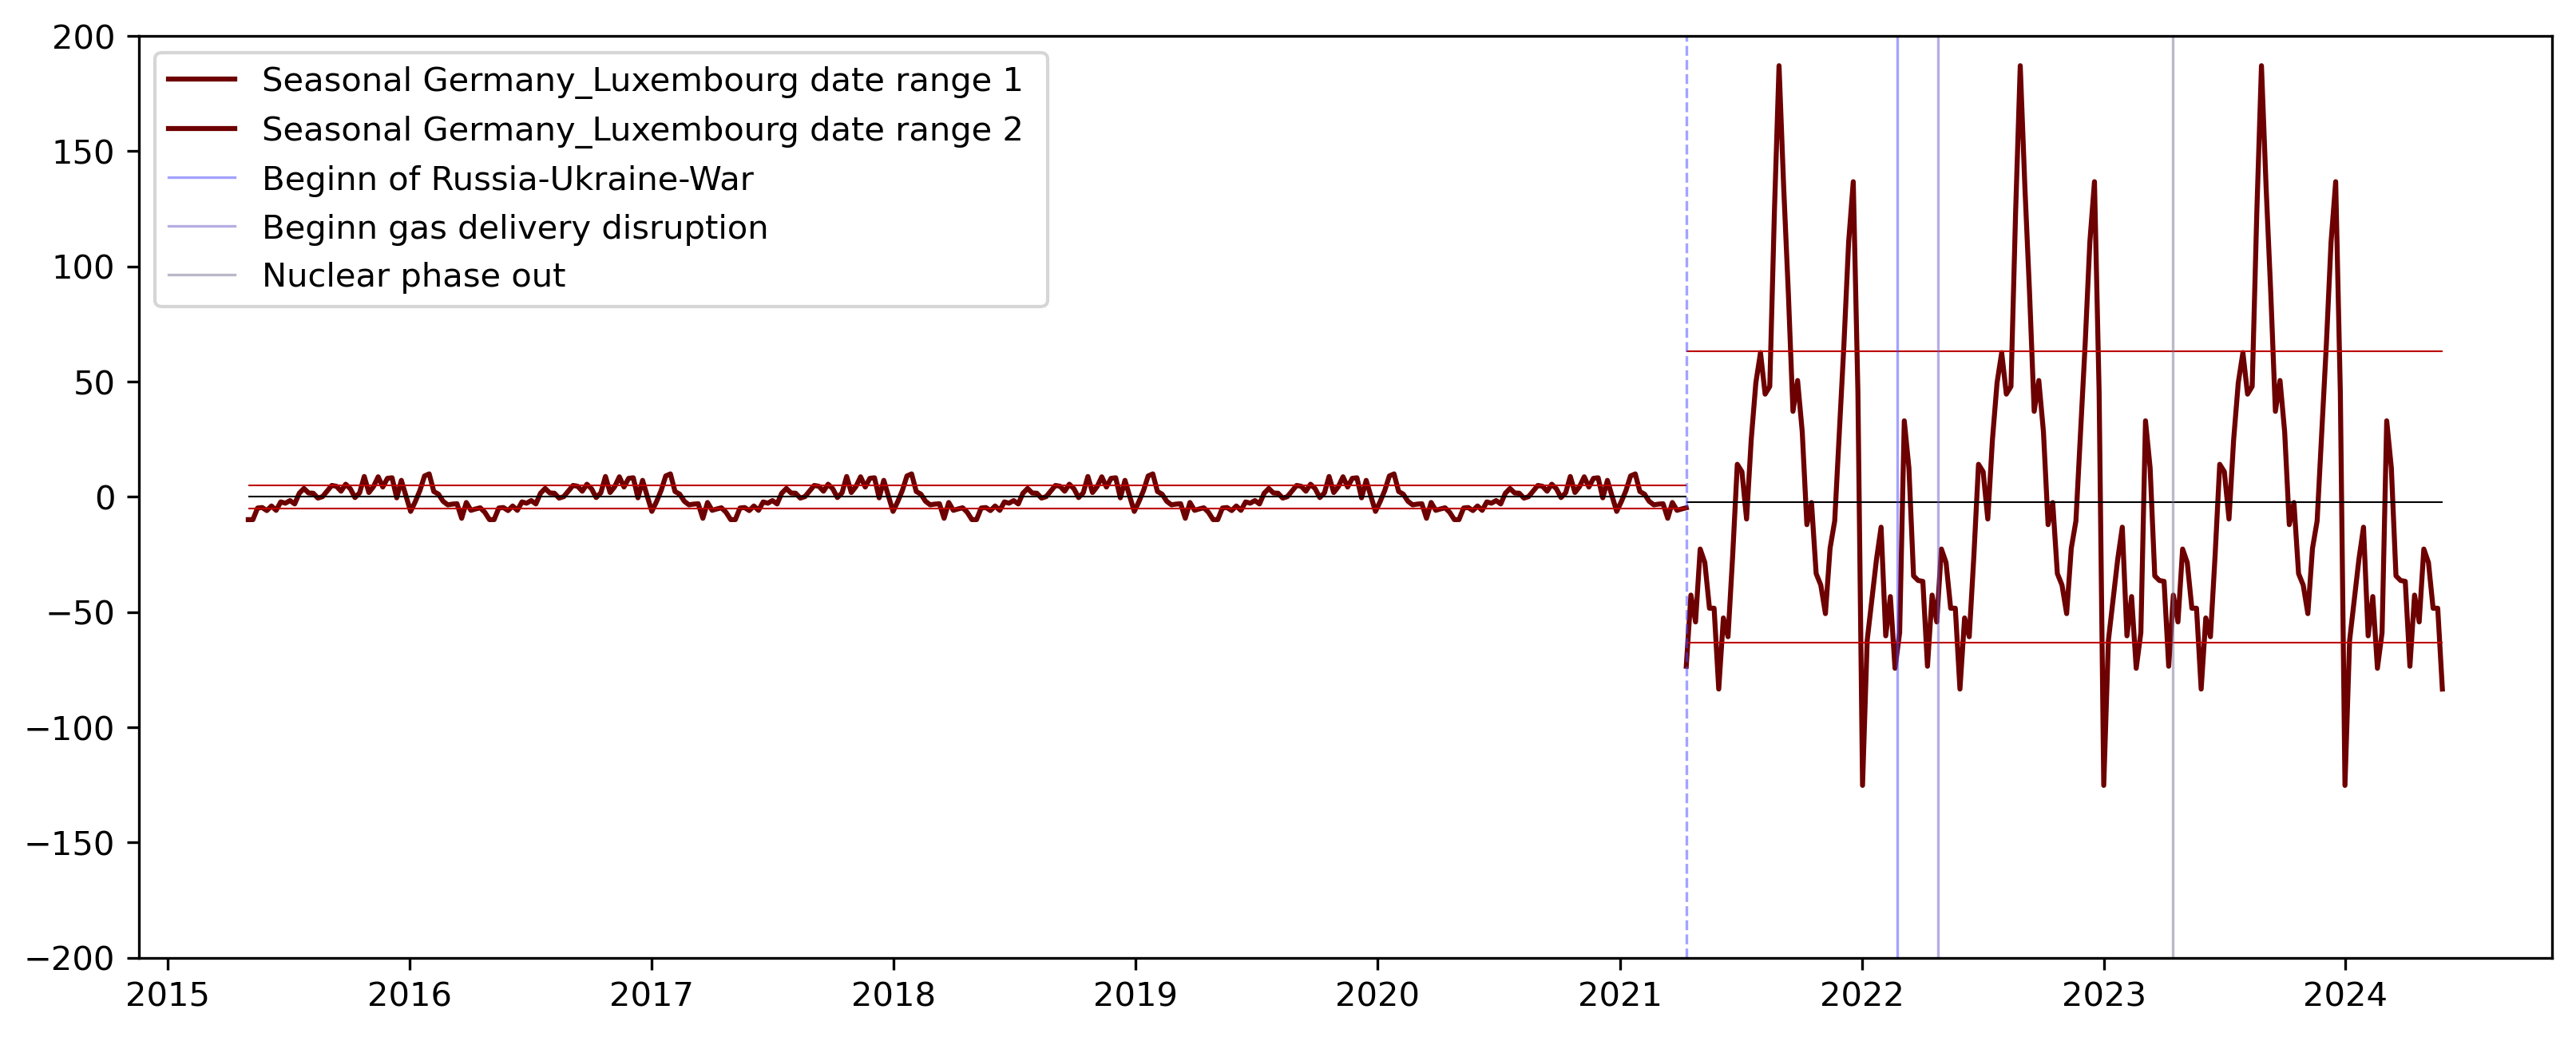

phase 1 mean: 0.02
phase 2 STD: +/- 5.0986 around 0.02
phase 2 mean: -2.45
phase 2 STD: +/- 63.0979 around -2.45


In [319]:


## hier stimme

range1_mean = Prices_GER_weekly_date_range_1['Seasonal'].mean()
range1_std = Prices_GER_weekly_date_range_1['Seasonal'].std()

range2_mean = Prices_GER_weekly_date_range_2['Seasonal'].mean()
range2_std = Prices_GER_weekly_date_range_2['Seasonal'].std()

plt.figure(figsize= (13,5), dpi = 300)

# plt.plot(Prices_GER_monthly['Seasonal'], label = 'Seasonal Germany_Luxembourg date range 1 ', color = '#000000', linewidth = 0.2)
plt.plot(Prices_GER_weekly_date_range_1['Seasonal'], label = 'Seasonal Germany_Luxembourg date range 1 ', color = '#6d0000')
plt.plot(Prices_GER_weekly_date_range_2['Seasonal'], label = 'Seasonal Germany_Luxembourg date range 2 ', color = '#6d0000')





plt.hlines(y=range1_mean,xmin=Prices_GER_weekly_date_range_1.index.min() ,xmax=Prices_GER_weekly_date_range_1.index.max(), linewidth = 0.5, color = '#000000')
plt.hlines(y=range2_mean,xmax=Prices_GER_weekly_date_range_2.index.max(),xmin=Prices_GER_weekly_date_range_2.index.min(), linewidth = 0.5, color = '#000000')


plt.hlines(y=range1_std,xmin=Prices_GER_weekly_date_range_1.index.min() ,xmax=Prices_GER_weekly_date_range_1.index.max(), linewidth = 0.5, color = '#bc0000')
plt.hlines(y=-range1_std,xmin=Prices_GER_weekly_date_range_1.index.min() ,xmax=Prices_GER_weekly_date_range_1.index.max(), linewidth = 0.5, color = '#bc0000')
plt.hlines(y=range2_std,xmax=Prices_GER_weekly_date_range_2.index.max(),xmin=Prices_GER_weekly_date_range_2.index.min(), linewidth = 0.5, color = '#bc0000')
plt.hlines(y=-range2_std,xmax=Prices_GER_weekly_date_range_2.index.max(),xmin=Prices_GER_weekly_date_range_2.index.min(), linewidth = 0.5, color = '#bc0000')

plt.vlines(x=date_range_change_dt, ymin=-200,ymax=200,color = '#4a48ff', alpha = .5, linewidth = .8, linestyles='--')



plt.ylim(-200,200)
plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,4,26),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()



print(f'phase 1 mean: {(range1_mean).round(2)}')
print(f'phase 2 STD: +/- {(range1_std).round(4)} around {(range1_mean).round(2)}')
print(f'phase 2 mean: {(range2_mean).round(2)}')
print(f'phase 2 STD: +/- {(range2_std).round(4)} around {(range2_mean).round(2)}')

Question for Miranda: Sanity check - does it make sense to split the data on this point 

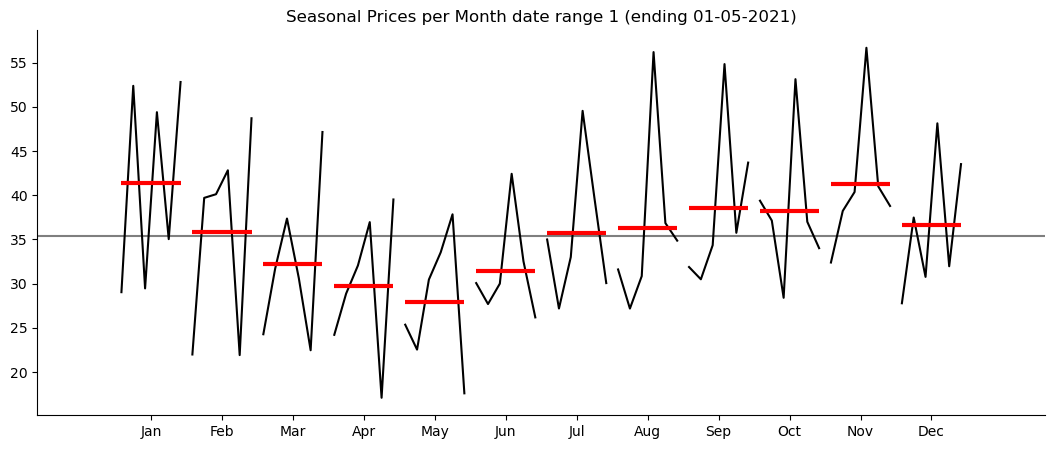

In [199]:
plt.figure(figsize=(13, 5))

month_plot(Prices_GER_monthly_date_range_1['Germany_Luxembourg'], ax=plt.gca())
plt.title("Seasonal Prices per Month date range 1 (ending 01-05-2021)")
plt.axhline(y=Prices_GER_monthly_date_range_1['Germany_Luxembourg'].mean(), color='#000000', alpha = .5)

sns.despine()
plt.show()

Question for Miranda: why did my Seasonality goes up in Jan-Apr (depends on the point), does it makes sense?

- Outlier detection
- 3 x Standard Deviation 
- less x standard deviation? 



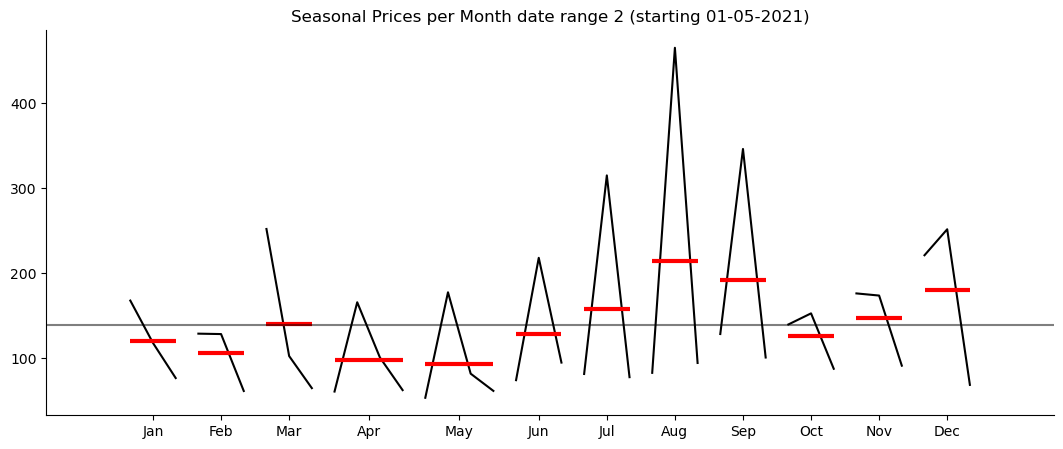

In [200]:
plt.figure(figsize=(13, 5))

month_plot(Prices_GER_monthly_date_range_2['Germany_Luxembourg'], ax=plt.gca())
plt.title("Seasonal Prices per Month date range 2 (starting 01-05-2021)")
plt.axhline(y=Prices_GER_monthly_date_range_2['Germany_Luxembourg'].mean(), color='#000000', alpha = .5)

sns.despine()
plt.show()

## Forecasting

Forecasting of the price with historical price data 

Question for Miranda: month or week or even day or hour

In [390]:
Prices_GER_weekly_date_range_1['Seasonal_difference'] = Prices_GER_weekly_date_range_1['Germany_Luxembourg'].diff(52)
Prices_GER_monthly_date_range_1['Seasonal_difference'] = Prices_GER_monthly_date_range_1['Germany_Luxembourg'].diff(12)

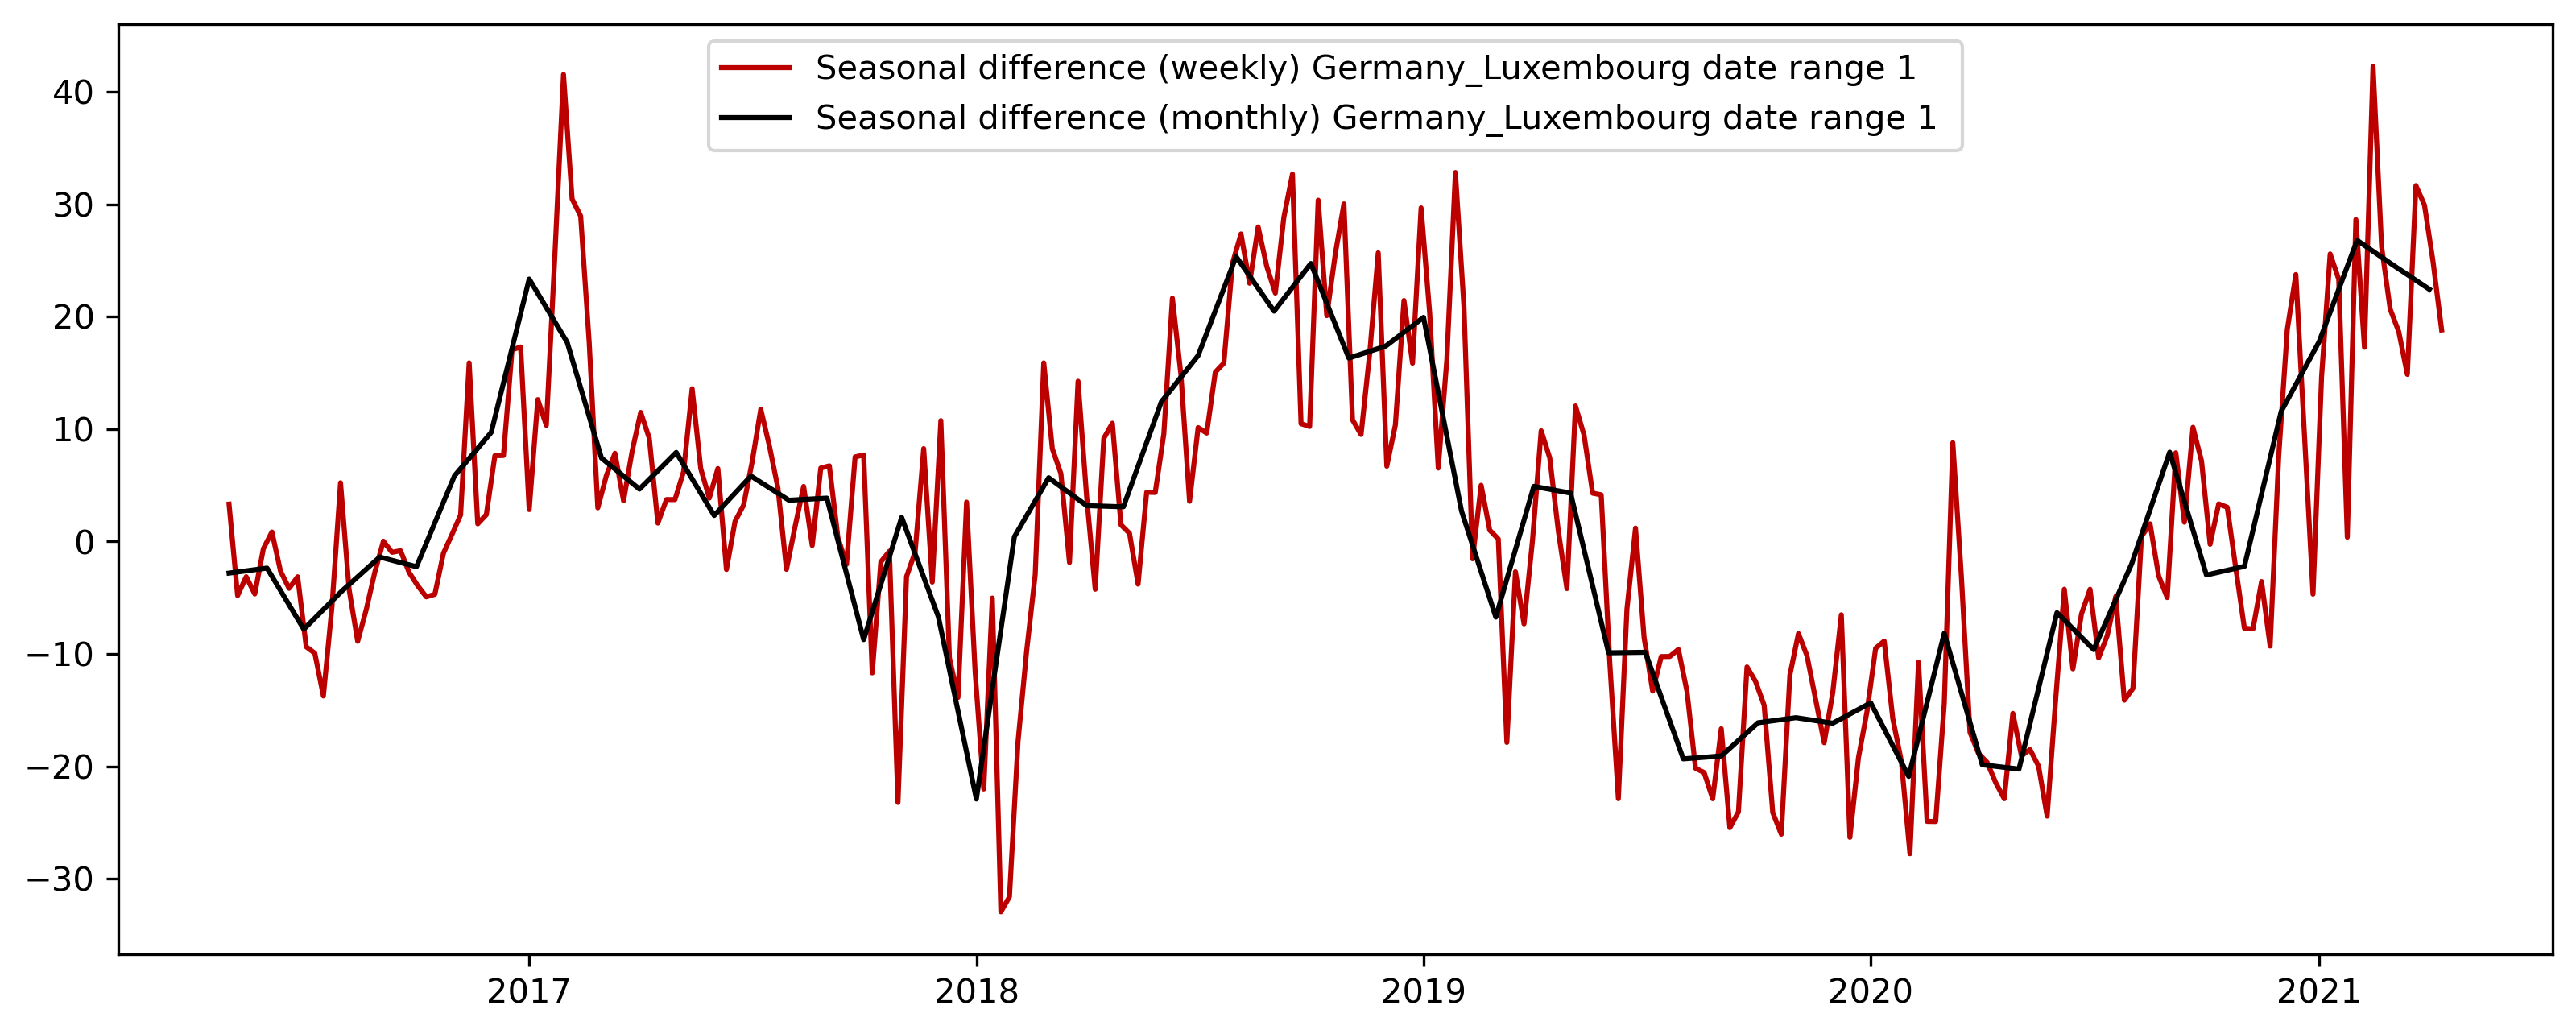

In [391]:
plt.figure(figsize= (13,5), dpi = 300)


plt.plot(Prices_GER_weekly_date_range_1['Seasonal_difference'], label = 'Seasonal difference (weekly) Germany_Luxembourg date range 1 ', color = '#bc0000')
plt.plot(Prices_GER_monthly_date_range_1['Seasonal_difference'], label = 'Seasonal difference (monthly) Germany_Luxembourg date range 1 ', color = '#000000')


plt.legend()
plt.show()

In [392]:
Prices_GER_monthly_date_range_1.sort_index(ascending=False).head(1)

Germany_Luxembourg  Trend  Seasonal  Residual  Trend+Seasonal  \
Start                                                                       
2021-04-01            39.51974    NaN -6.599026       NaN             NaN   

            Seasonal_difference  
Start                            
2021-04-01            22.426615

In [393]:
Prices_GER_weekly_date_range_1

Germany_Luxembourg  Trend  Seasonal  Residual  Trend+Seasonal  \
Start                                                                       
2015-05-03           22.145694    NaN -9.895958       NaN             NaN   
2015-05-10           23.005893    NaN -9.883914       NaN             NaN   
2015-05-17           24.078571    NaN -4.864497       NaN             NaN   
2015-05-24           28.988155    NaN -4.653524       NaN             NaN   
2015-05-31           26.735714    NaN -5.967037       NaN             NaN   
...                        ...    ...       ...       ...             ...   
2021-03-14           35.820357    NaN -9.324114       NaN             NaN   
2021-03-21           53.000476    NaN -2.465010       NaN             NaN   
2021-03-28           47.471935    NaN -5.868104       NaN             NaN   
2021-04-04           44.470238    NaN -5.268937       NaN             NaN   
2021-04-11           39.859185    NaN -4.765289       NaN             NaN   

            seasonal_difference  Seasonal_difference  
Start                                                 
2015-05-03                  NaN                  NaN  
2015-05-10                  NaN                  NaN  
2015-05-17                  NaN                  NaN  
2015-05-24                  NaN                  NaN  
2015-05-31                  NaN                  NaN  
...                         ...                  ...  
2021-03-14            14.857560            14.857560  
2021-03-21            31.656429            31.656429  
2021-03-28            29.910595            29.910595  
2021-04-04            24.875595            24.875595  
2021-04-11            18.810316            18.810316  

[311 rows x 7 columns]

Question for Miranda: optimal train and test split?

In [394]:
train = Prices_GER_weekly_date_range_1[['Seasonal_difference']].loc[Prices_GER_weekly_date_range_1.index <= "2020-04-01"].dropna()
test = Prices_GER_weekly_date_range_1[['Seasonal_difference']].loc[Prices_GER_weekly_date_range_1.index > "2020-04-01"]

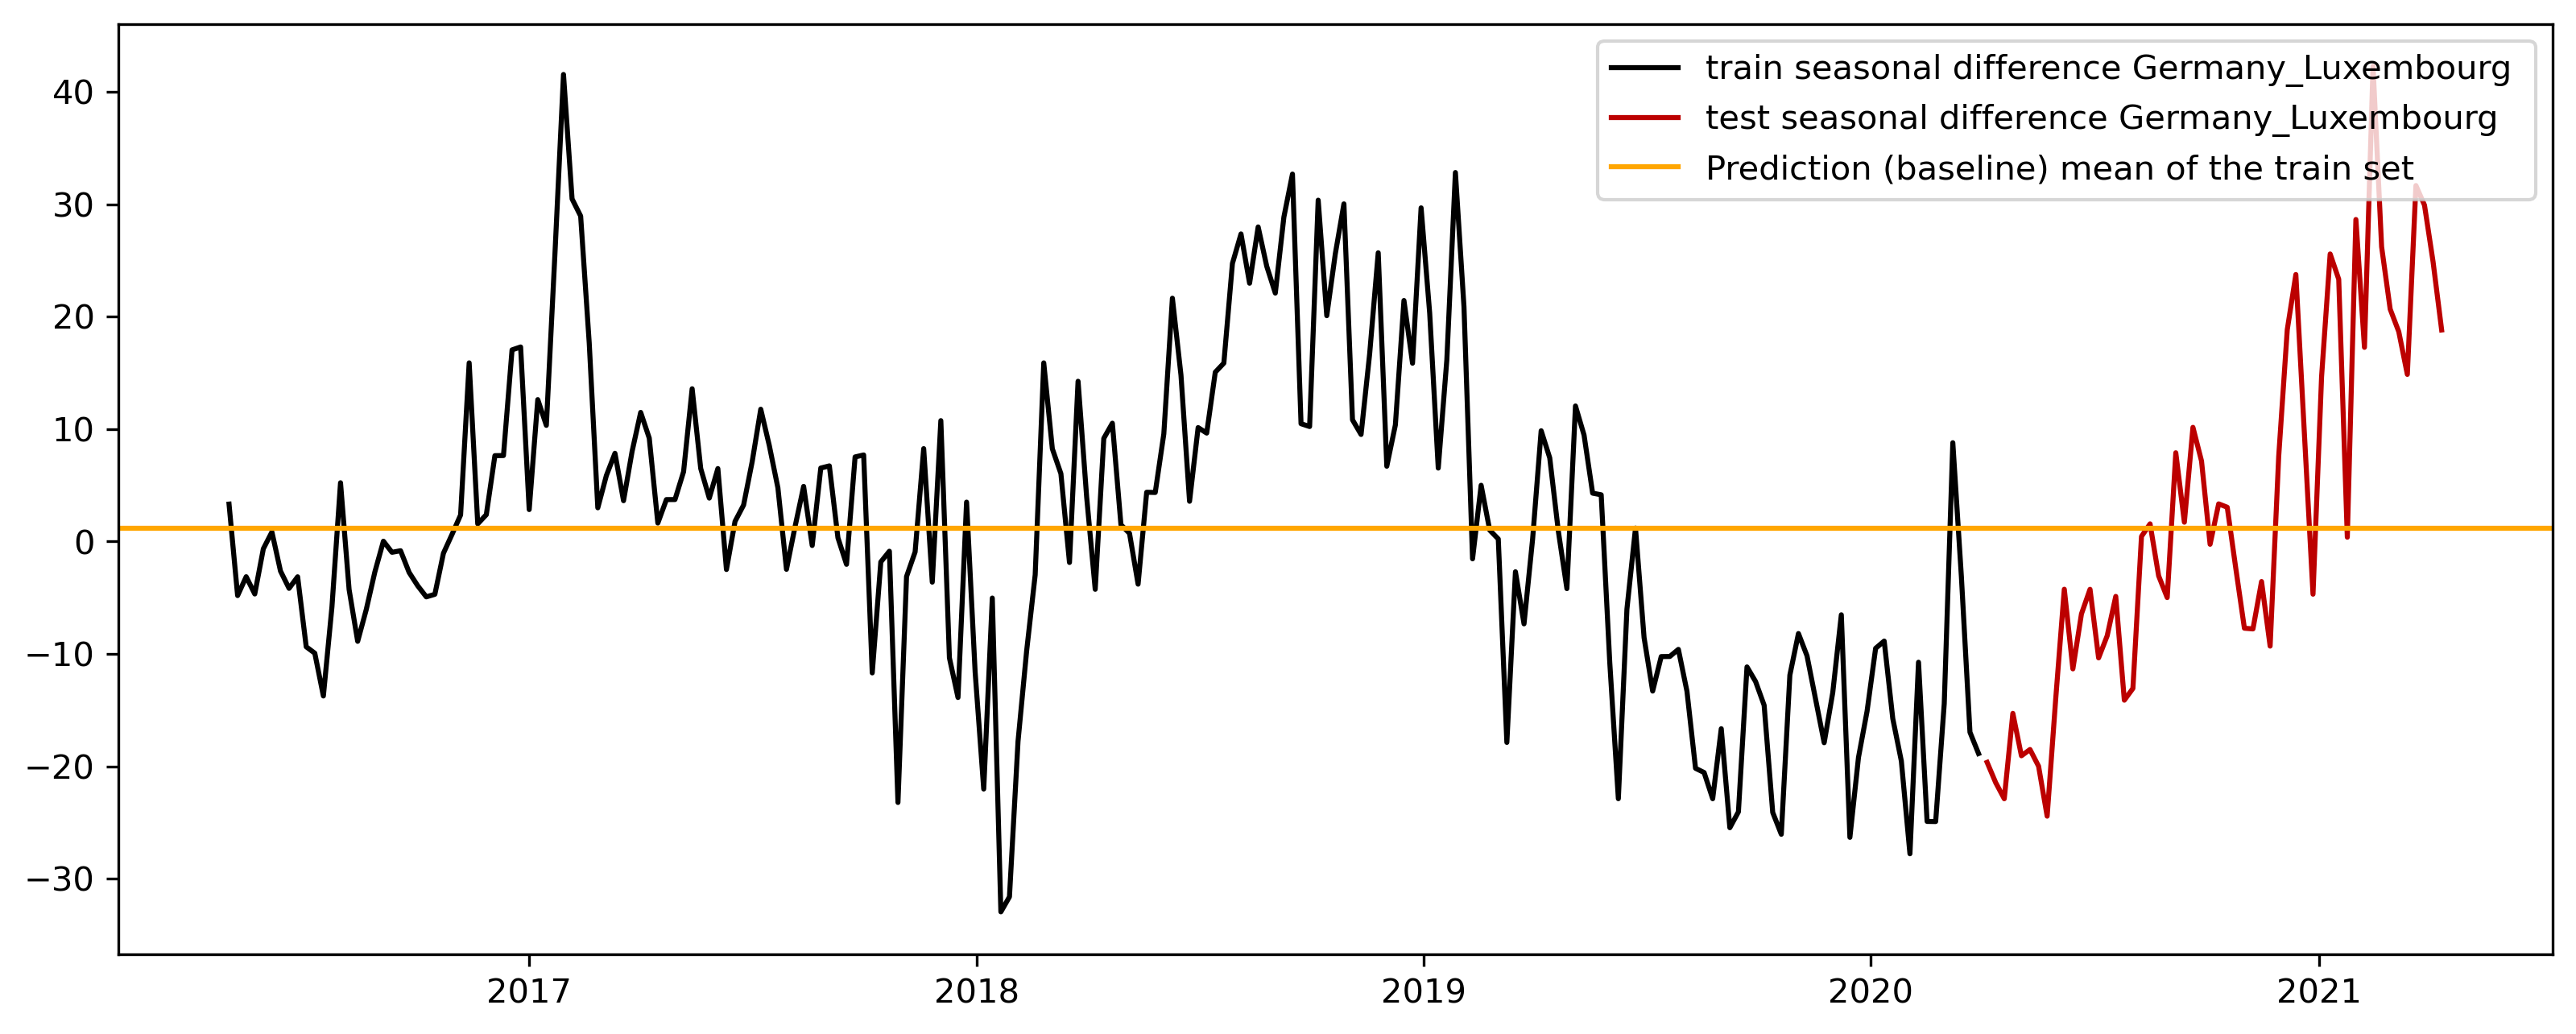

In [395]:
plt.figure(figsize= (13,5), dpi = 300)


plt.plot(train['Seasonal_difference'], label = 'train seasonal difference Germany_Luxembourg ', color = '#000000')
plt.plot(test['Seasonal_difference'], label = 'test seasonal difference Germany_Luxembourg', color = '#bc0000')
plt.axhline(y= train['Seasonal_difference'].mean(),xmax=0, xmin=100, label = 'Prediction (baseline) mean of the train set', color= '#ffa600')

plt.legend()
plt.show()

In [396]:
train_series = pd.Series(train['Seasonal_difference'].values, index=train.index, name='Seasonal_difference')
test_series =  pd.Series(test['Seasonal_difference'].values, index=test.index, name='Seasonal_difference')

full_index = full_index = pd.concat([train_series, test_series]).index
base_line = np.full(full_index.shape, np.mean(train_series))

predictions = pd.Series(data=base_line, index=full_index)

In [397]:
predictions[train_series.index]

Start
2016-05-01    1.206655
2016-05-08    1.206655
2016-05-15    1.206655
2016-05-22    1.206655
2016-05-29    1.206655
                ...   
2020-03-01    1.206655
2020-03-08    1.206655
2020-03-15    1.206655
2020-03-22    1.206655
2020-03-29    1.206655
Freq: W-SUN, Length: 205, dtype: float64

In [518]:
def mean_absolute_percentage_error(true_values, predicted_values):
    """
    Calculate the mean absolute percentage error. 
    Find the prediction error and devide by the true value, then average.
    """
    
    error = true_values - predicted_values
    error.dropna()
    absolute_percentage_error = np.abs(error/true_values)
    mape = absolute_percentage_error.mean() * 100
    
    return mape



In [519]:
train_mape = mean_absolute_percentage_error(train_series, predictions[train_series.index])
test_mape = mean_absolute_percentage_error(test_series, predictions[test_series.index])

print(f"Train MAPE on the difference: {round(train_mape, 2)}%")
print(f"Test MAPE on the difference: {round(test_mape, 2)}%")

Train MAPE on the difference: 132.28%
Test MAPE on the difference: 113.22%


Autocorrelation

Question for Miranda: Timeframe for Autocorrelation (motnhly, weekly, daily, hourly)

In [400]:
Prices_GER_daily_date_range_1 = decomposition_df(Prices_range_1, 'Germany_Luxembourg','h', 'mean')
Prices_GER_daily_date_range_2 = decomposition_df(Prices_range_2, 'Germany_Luxembourg', 'h', 'mean')

In [401]:
Prices_GER_daily_date_range_1['Seasonal_difference'] = Prices_GER_daily_date_range_1['Germany_Luxembourg'].diff(365)

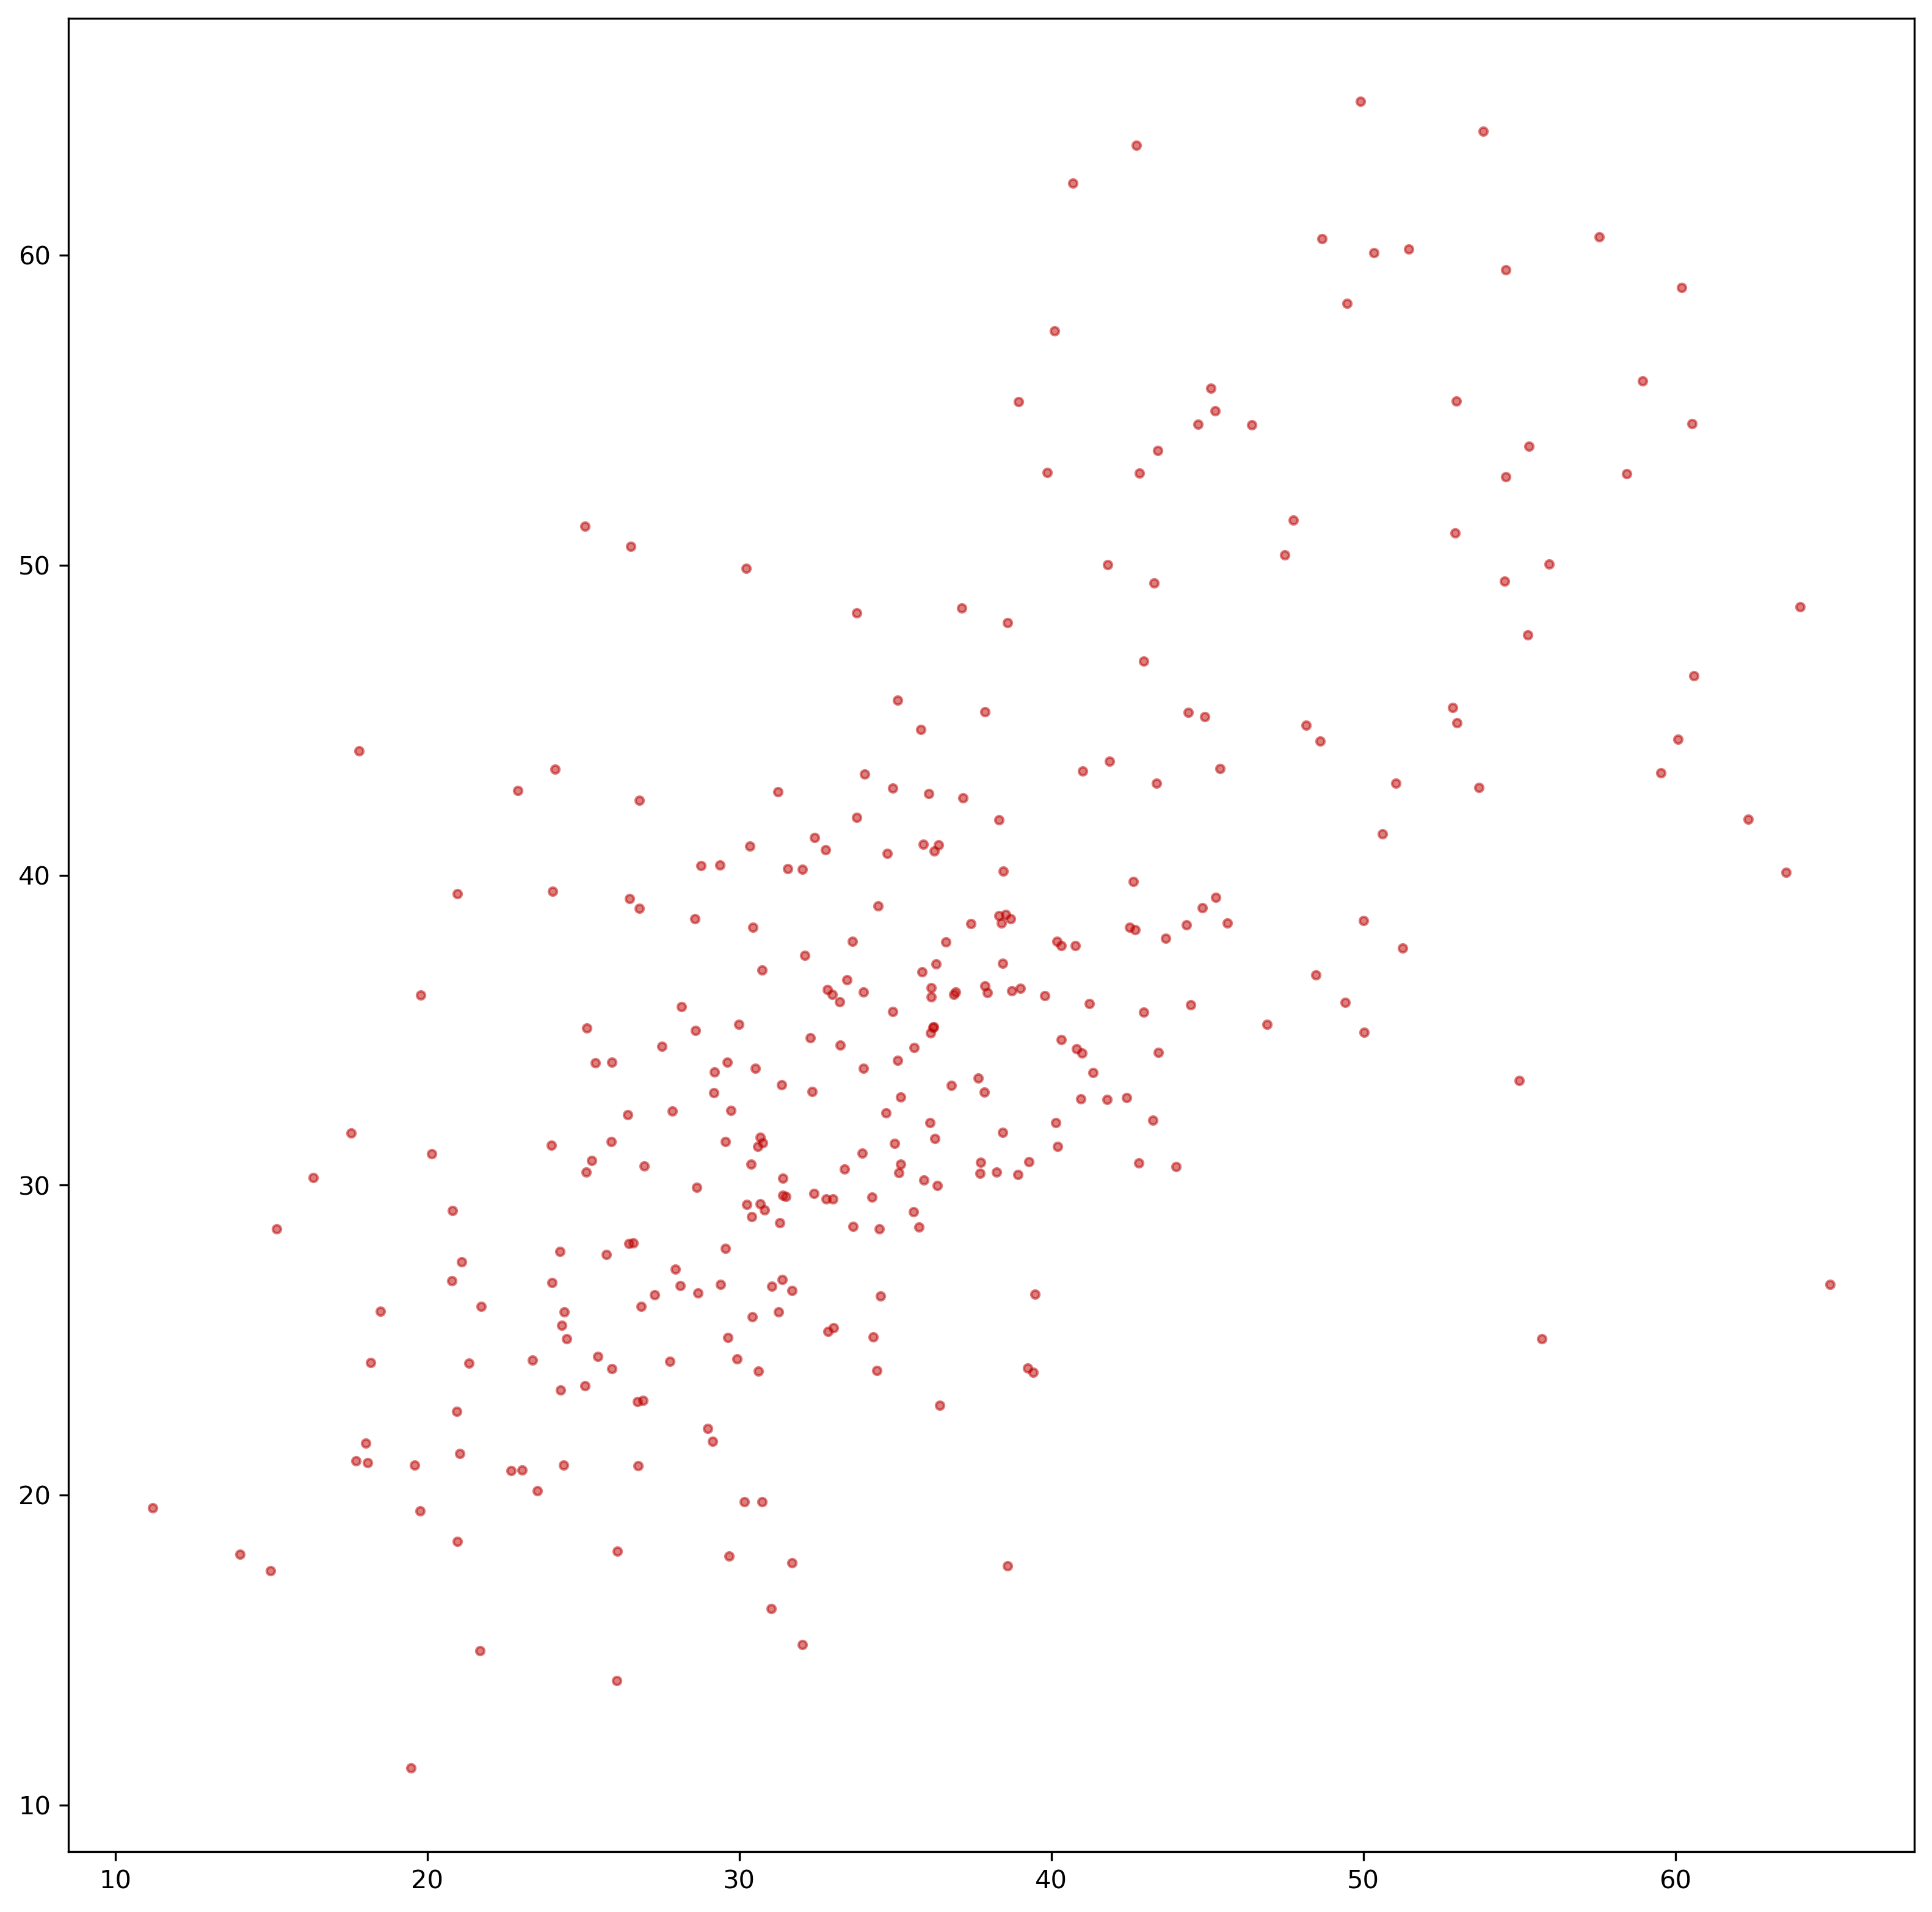

In [402]:
plt.figure(figsize=(13,13), dpi =300)

plt.scatter(x=Prices_GER_weekly_date_range_1['Germany_Luxembourg'],y=Prices_GER_weekly_date_range_1['Germany_Luxembourg'].shift(3), color='#bc0000', s= 10, alpha=0.5)

plt.show()

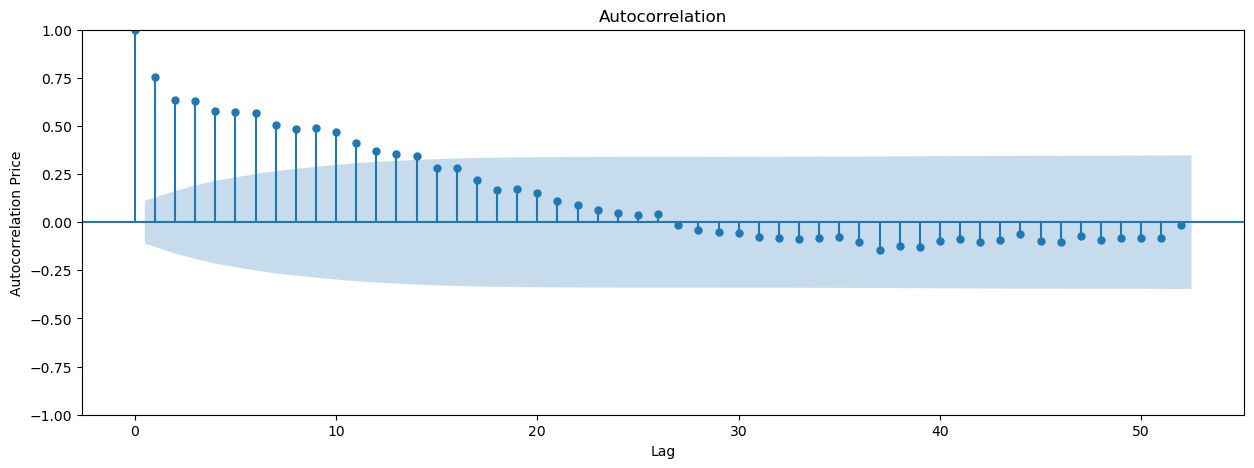

In [498]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15, 5))

# put the acf plot on the current axis
plot_acf(Prices_GER_weekly_date_range_1['Germany_Luxembourg'], lags=52, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation Price')
plt.show()

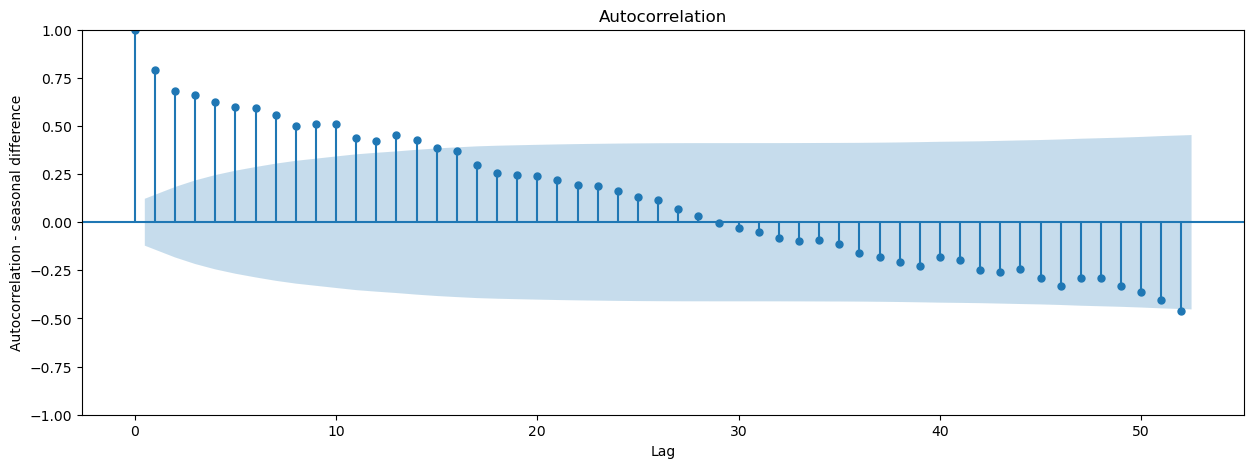

In [497]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15, 5))

# put the acf plot on the current axis
plot_acf(Prices_GER_weekly_date_range_1['Seasonal_difference'].dropna(), lags=52, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation - seasonal difference')
plt.show()

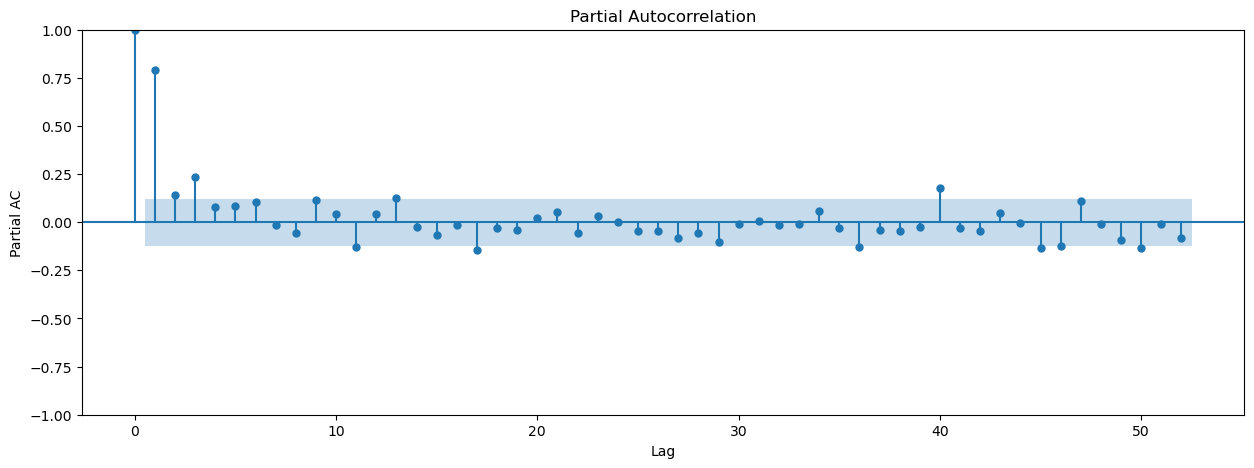

In [500]:
plt.figure(figsize=(15, 5))
plot_pacf(Prices_GER_weekly_date_range_1['Seasonal_difference'].dropna(), lags=52, ax=plt.gca(), method='ywm')
plt.xlabel('Lag')
plt.ylabel('Partial AC')
plt.show()

In [488]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p_param = 4

model = SARIMAX(train, order=(p_param, 0, 0), trend="c")
model_fit = model.fit(disp=0)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Seasonal_difference   No. Observations:                  205
Model:                SARIMAX(4, 0, 0)   Log Likelihood                -726.251
Date:                 Tue, 18 Jun 2024   AIC                           1464.502
Time:                         23:39:51   BIC                           1484.440
Sample:                     05-01-2016   HQIC                          1472.567
                          - 03-29-2020                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0578      0.599      0.097      0.923      -1.116       1.231
ar.L1          0.6476      0.072      9.031      0.000       0.507       0.788
ar.L2         -0.0743      0.076     -0.981      0.327      -0.223       0.074
ar.L3          0.2739      0.079      3.459      0.001       0.119       0.429
ar.L4          0.0191      0.060      0.317      0.751      -0.099       0.137
sigma2        69.5101      6.252     11.119      0.000      57.257      81.763
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.25
Prob(Q):                              0.99   Prob(JB):                         0.20
Heteroskedasticity (H):               1.94   Skew:                            -0.07
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [489]:
predictions_SARIMAX = model_fit.predict(start=0, end=len(train)+len(test)-1)

In [490]:
train.index.max()

Timestamp('2020-03-29 00:00:00')

In [494]:
model_fit.forecast(steps=10)

2020-04-05   -11.591978
2020-04-12   -10.755526
2020-04-19   -11.538368
2020-04-26   -10.150990
2020-05-03    -8.826299
2020-05-10    -8.269901
2020-05-17    -7.642927
2020-05-24    -6.888898
2020-05-31    -6.269455
2020-06-07    -5.741954
Freq: W-SUN, Name: predicted_mean, dtype: float64

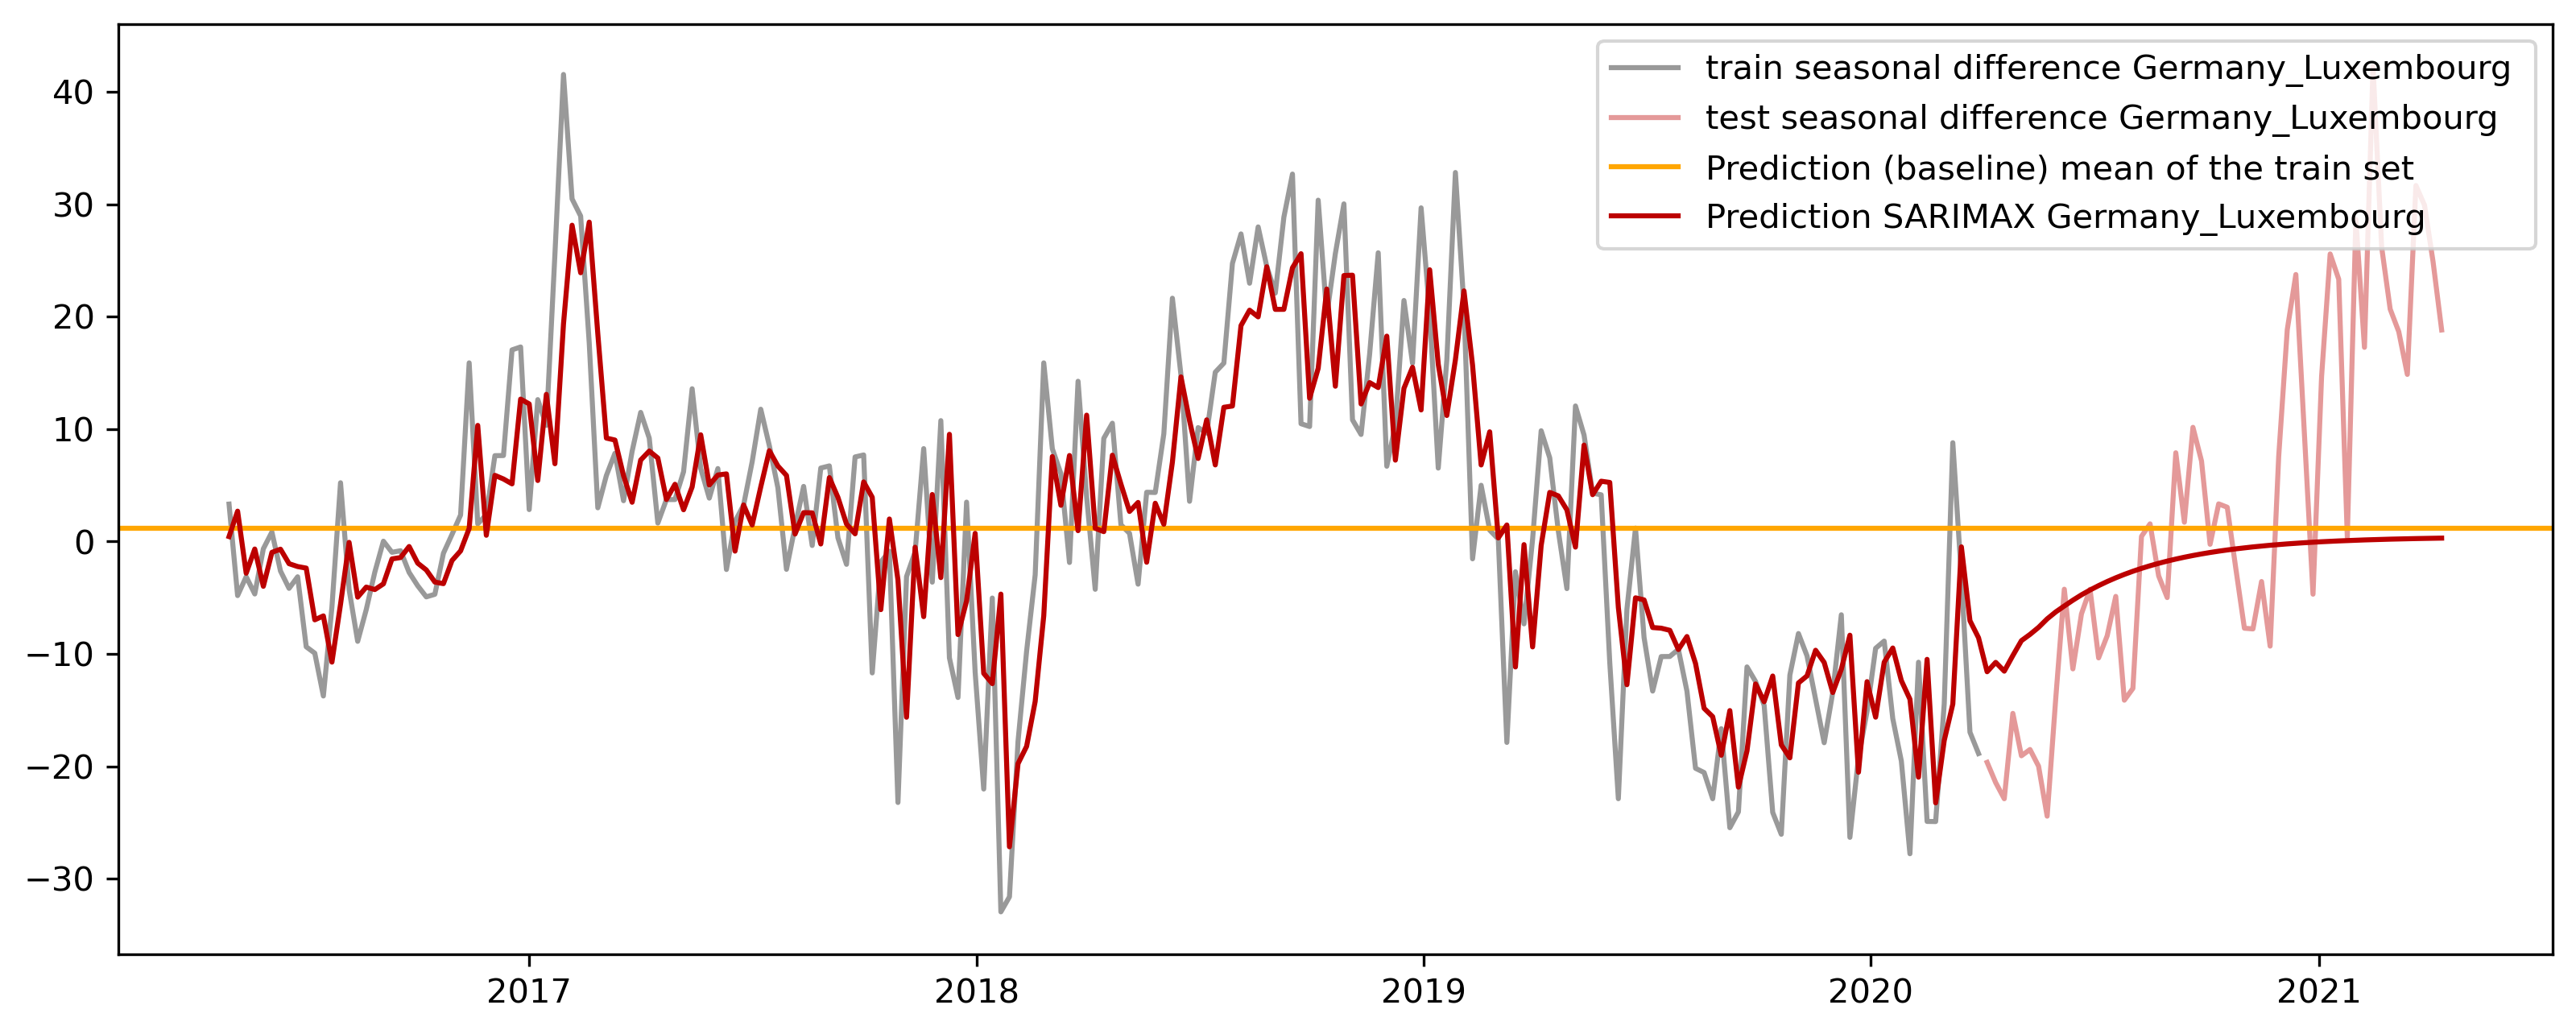

In [495]:
plt.figure(figsize= (13,5), dpi = 300)


plt.plot(train['Seasonal_difference'], label = 'train seasonal difference Germany_Luxembourg ', color = '#000000', alpha = 0.4)
plt.plot(test['Seasonal_difference'], label = 'test seasonal difference Germany_Luxembourg', color = '#bc0000', alpha =.4)
plt.axhline(y= train['Seasonal_difference'].mean(),xmax=0, xmin=100, label = 'Prediction (baseline) mean of the train set', color= '#ffa600')
plt.plot(predictions_SARIMAX, label = 'Prediction SARIMAX Germany_Luxembourg ', color = '#bc0000')

plt.legend()
plt.show()

213.70304478596202

In [520]:
train_mape_SARIMAX = mean_absolute_percentage_error(train_series, predictions_SARIMAX[train_series.index])
test_mape_SARIMAX = mean_absolute_percentage_error(test_series, predictions_SARIMAX[test_series.index])


print(f"Train MAPE on the difference: {round(train_mape, 2)}%")
print(f"Test MAPE on the difference: {round(test_mape, 2)}%")
print(f"Train MAPE SARIMAX on the difference: {round(train_mape_SARIMAX, 2)}%")
print(f"Test MAPE SARIMAX on the difference: {round(test_mape_SARIMAX, 2)}%")

Train MAPE on the difference: 132.28%
Test MAPE on the difference: 113.22%
Train MAPE SARIMAX on the difference: 213.7%
Test MAPE SARIMAX on the difference: 99.31%


Question for Miranda: how could the baseline be better than the SARIMAX in the train data? 


![alt text](image.png)


"where At is the actual value and Ft is the forecast value. Their difference is divided by the actual value At. The absolute value of this ratio is summed for every forecasted point in time and divided by the number of fitted points n." 

Source: https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

Systematical approach

In [576]:
np.abs(((train_series-predictions_SARIMAX).dropna()))


2016-05-01     2.889807
2016-05-08     7.510529
2016-05-15     0.310260
2016-05-22     3.999209
2016-05-29     3.337142
                ...    
2020-03-01     3.269507
2020-03-08    23.244802
2020-03-15     2.653753
2020-03-22     9.914785
2020-03-29    10.298732
Freq: W-SUN, Length: 205, dtype: float64

In [574]:
np.abs((train_series-1.5)/train_series).sum()

292.4336536900829

In [544]:
SARIMAX_wnan = (np.abs((train_series-predictions_SARIMAX)/train_series))
(np.abs((train_series-predictions_SARIMAX)/train_series))

2016-05-01    0.869810
2016-05-08    1.559434
2016-05-15    0.098893
2016-05-22    0.855795
2016-05-29    5.103222
                ...   
2021-03-14         NaN
2021-03-21         NaN
2021-03-28         NaN
2021-04-04         NaN
2021-04-11         NaN
Freq: W-SUN, Length: 259, dtype: float64

In [545]:
(np.abs((train_series-1.5)/train_series))

Start
2016-05-01    0.548511
2016-05-08    1.311449
2016-05-15    1.478115
2016-05-22    1.320986
2016-05-29    3.293829
                ...   
2020-03-01    1.103942
2020-03-08    0.829186
2020-03-15    1.478133
2020-03-22    1.088395
2020-03-29    1.079501
Freq: W-SUN, Name: Seasonal_difference, Length: 205, dtype: float64

In [546]:
(np.abs((train_series-predictions_SARIMAX)/train_series)).sum()

438.0912418112222

In [547]:
(np.abs((train_series-1.5)/train_series)).sum()

292.4336536900829

In [513]:
np.abs((train_series-predictions_SARIMAX)/train_series).sum()/len(train_series)*100

np.abs((train_series-1.5)/train_series).sum()/len(train_series)*100

142.6505627756502

In [532]:
(np.abs((train_series-predictions_SARIMAX)/len(train_series))).sum()


6.33021247145556

In [533]:
(np.abs((train_series-1.5)/len(train_series))).sum()

11.095866676345334